# **Milestone 2**

# Link Model Deployment
Klik link [berikut](https://huggingface.co/spaces/AldaTalenta/holiday-package-batch-018-rmt) untuk langsung menuju ke webapps project ini.

# i. Perkenalan

>Bab pengenalan ini berisi identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

## Identitas

### Alda Nesti Talenta Pakpahan <br>
### FTDS-018-RMT

## Identifikasi Masalah

### Topik permasalahan

Topik permasalahan yang akan dibahas dalam notebook ini adalah **tingginya biaya pemasaran paket perjalanan (travel package)**.

### Problem statement

Problem statement: <br>
Perusahaan `Trips & Travel.Com` ingin membuat biaya pemasaran yang lebih efisien untuk memperkenalkan paket perjalanan yang baru yaitu `Wellness Tourism Package`. Mengingat pada tahun lalu, biaya pemasarannya cukup tinggi untuk 5 paket terdahulu dan hanya sekitar 18% pelanggan yang membeli paket tersebut.

### Latar belakang

Perusahaan `Trips & Travel.Com` ingin mengaktifkan dan membangun model bisnis yang layak untuk memperluas basis pelanggan. Salah satu cara untuk memperluas basis pelanggan adalah dengan memperkenalkan penawaran paket baru. <br>
Saat ini, ada 5 jenis paket yang ditawarkan perusahaan yaitu `Basic, Standard, Deluxe, Super Deluxe, dan King`. Berdasarkan data tahun lalu, kami mengamati bahwa sekitar 18% pelanggan membeli paket tersebut. Namun, biaya pemasarannya cukup tinggi karena pelanggan dihubungi secara acak tanpa melihat informasi yang tersedia.<br>
Perusahaan kini berencana untuk meluncurkan produk baru yaitu `Wellness Tourism Package`. Wellness Tourism didefinisikan sebagai perjalanan yang memungkinkan wisatawan untuk mempertahankan, meningkatkan atau memulai gaya hidup sehat, dan mendukung atau meningkatkan rasa kesejahteraan seseorang. Namun, kali ini perusahaan ingin memanfaatkan data yang tersedia dari pelanggan yang ada dan pelanggan potensial untuk membuat biaya pemasaran lebih efisien.<br>
Sehingga, isi dari notebook ini akan membantu mewujudkan tujuan yang ingin dicapai oleh perusahaan. Saya akan menganalisis data dan informasi pelanggan untuk memberikan rekomendasi kepada tim pemasaran serta membangun model untuk memprediksi calon pelanggan yang akan membeli paket perjalanan yang baru diperkenalkan.

### Penjabaran masalah

1) Pelanggan yang seperti apa yang lebih cenderung untuk membeli paket perjalanan yang baru diperkenalkan?<br>
2) Variabel mana yang paling signifikan?<br>
3) Segmen pelanggan yang mana yang harus lebih dibidik?

### Objective

Project ini bertujuan untuk menganalisis data dan informasi pelanggan serta membuat model Classification dengan tujuan:
1. Memprediksi calon pelanggan mana yang lebih cenderung untuk membeli paket perjalanan yang baru diperkenalkan.
2. Mengetahui variabel mana yang paling signifikan.
3. Mengetahui segmen pelanggan mana yang harus lebih dibidik.

## Deskripsi dataset "Travel Package"

* Pada Milestone 2 ini, dataset diakses menggunakan `Kaggle` yang berjudul `Travel Package`.
* Klik link [berikut](https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction) untuk langsung menuju ke dataset.<br>
* Overview:<br>
Dataset ini berisi informasi tentang pelanggan yang berminat membeli paket perjalanan. Data ini digunakan untuk memprediksi pelanggan mana yang lebih cenderung membeli paket perjalanan yang baru diperkenalkan, mengetahui faktor apa yang mempengaruhi pembelian paket perjalanan, dan mengetahui segmen pelanggan mana yang lebih menjadi sasaran pemasaran.

* Field Description: <br>

Feature | Description
---|---
`CustomerID`| Unique customer ID
`Age`|  Age of customer
`TypeofContact`| How customer was contacted (Company Invited or Self Inquiry)
`CityTier`| City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
`Occupation`| Occupation of customer
`Gender`| Gender of customer
`NumberOfPersonVisiting`| Total number of persons planning to take the trip with the customer
`PreferredPropertyStar`| Preferred hotel property rating by customer
`MaritalStatus`| Marital status of customer
`NumberOfTrips`| Average number of trips in a year by customer
`Passport`| The customer has a passport or not (0: No, 1: Yes)
`OwnCar`| Whether the customers own a car or not (0: No, 1: Yes)
`NumberOfChildrenVisiting`| Total number of children with age less than 5 planning to take the trip with the customer
`Designation`| Designation of the customer in the current organization
`MonthlyIncome`| Gross monthly income of the customer
`PitchSatisfactionScore`| Sales pitch satisfaction score
`ProductPitched`| Product pitched by the salesperson
`NumberOfFollowups`| Total number of follow-ups has been done by the salesperson after the sales pitch
`DurationOfPitch`| Duration of the pitch by a salesperson to the customer
`ProdTaken`| Whether the customer has purchased a package or not (0: No, 1: Yes)
> Target Column: `ProdTaken`.

Dataset source: `Kaggle`.

# ii. Import Libraries

>Bagian ini hanya berisi semua library yang digunakan dalam project.

In [1]:
## REQUIRED LIBRARIES
%%capture
!pip install phik

# For data wrangling
import numpy as np  # linear algebra
import pandas as pd  # data processing

# For visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm
%matplotlib inline
import seaborn as sns

# set the background for the graphs
plt.style.use('ggplot')

# Printing style
!pip install tabulate
from tabulate import tabulate

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# For Train-Test Split
from sklearn.model_selection import train_test_split

# For correlation matrix
import phik
from phik.report import plot_correlation_matrix
from phik import report

# For missing value imputation
from sklearn.impute import SimpleImputer

# For standardization of dataset
from sklearn.preprocessing import MinMaxScaler

# For encode dataset
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# For bundle preprocessing for numerical and categorical data
from sklearn.compose import ColumnTransformer

# For build pipelines
from sklearn.pipeline import Pipeline

# For machine learning model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# For model evaluation
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay, roc_curve, roc_auc_score

# # For model selection (cross validation and hyperparameter tuning)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# For save the files of model
import pickle

# iii. Data Loading

>Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut.

Proses Data Loading yang dilakukan adalah:
- Mengakses file dataset
- Menampilkan 10 data pertama dan 10 data terakhir dari dataset
- Menduplikat dataset
- Mengecek ukuran dataset
- Melihat informasi yang ada dalam dataset, seperti:
  1. Variabel apa saja yang ada di dataset
  2. Tipe data dari setiap variabel
  3. Jumlah *missing value* dari setiap variabel
  4. Apakah ada data yang duplikat dalam dataset
  5. Distribusi data dari setiap variabel
  6. Informasi statistik deskriptif
- Membersihkan data *(Data Cleaning)*, seperti:
  1. Menghapus kolom yang tidak digunakan seperti `CustomerID`
  2. Memperbaiki nilai `Female` pada kolom `Gender`
  3. Mengubah tipe data variabel kategorikal dari objek/float ke kategori
  4. Standarisasi nama kolom
  5. Proses binning pada kolom `age` dan `monthlyincome`
  6. Mengatur kembali posisi dari semua kolom pada dataFrame

## Mounting Google Drive

In [2]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import os and copy the directory path containing the file to be imported
import os
myDirFiles = "/content/drive/MyDrive/RMT - 018/MILESTONE 2 PHASE 1"
os.chdir(myDirFiles)

In [4]:
# Double-check whether the drive folder is properly mounted to colab.
!ls

 logreg_best_estimator.pkl  'MILESTONE 2 PHASE 1.csv'   Travel.csv


## Getting to know the dataset

Setelah pandas di install, sekarang saatnya untuk melihat dataset tersebut. Saya menggunakan `.read_csv()` untuk menampilkan dataset ini dan menyimpannya dalam dataFrame.

In [5]:
# Load the data
df = pd.read_csv('/content/drive/MyDrive/RMT - 018/MILESTONE 2 PHASE 1/Travel.csv')
df

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0         200000          1  41.0     Self Enquiry         3              6.0   
1         200001          0  49.0  Company Invited         1             14.0   
2         200002          1  37.0     Self Enquiry         1              8.0   
3         200003          0  33.0  Company Invited         1              9.0   
4         200004          0   NaN     Self Enquiry         1              8.0   
...          ...        ...   ...              ...       ...              ...   
4883      204883          1  49.0     Self Enquiry         3              9.0   
4884      204884          1  28.0  Company Invited         1             31.0   
4885      204885          1  52.0     Self Enquiry         3             17.0   
4886      204886          1  19.0     Self Enquiry         3             16.0   
4887      204887          1  36.0     Self Enquiry         1             14.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0           Salaried  Female                       3                3.0   
1           Salaried    Male                       3                4.0   
2        Free Lancer    Male                       3                4.0   
3           Salaried  Female                       2                3.0   
4     Small Business    Male                       2                3.0   
...              ...     ...                     ...                ...   
4883  Small Business    Male                       3                5.0   
4884        Salaried    Male                       4                5.0   
4885        Salaried  Female                       4                4.0   
4886  Small Business    Male                       3                4.0   
4887        Salaried    Male                       4                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0            Deluxe                    3.0        Single            1.0   
1            Deluxe                    4.0      Divorced            2.0   
2             Basic                    3.0        Single            7.0   
3             Basic                    3.0      Divorced            2.0   
4             Basic                    4.0      Divorced            1.0   
...             ...                    ...           ...            ...   
4883         Deluxe                    4.0     Unmarried            2.0   
4884          Basic                    3.0        Single            3.0   
4885       Standard                    4.0       Married            7.0   
4886          Basic                    3.0        Single            3.0   
4887          Basic                    4.0     Unmarried            3.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0            1                       2       1                       0.0   
1            0                       3       1                       2.0   
2            1                       3       0                       0.0   
3            1                       5       1                       1.0   
4            0                       5       1                       0.0   
...        ...                     ...     ...                       ...   
4883         1                       1       1                       1.0   
4884         1                       3       1                       2.0   
4885         0                       1       1                       3.0   
4886         0                       5       0                       2.0   
4887         1                       3       1                       2.0   

         Designation  MonthlyIncome  
0            Manager        20993.0  
1            Manager        20130.0  
2          Executive        17090.0  
3          Executive        17909.0  
4          Executive        18468.0  
...              ...            ...  
4883         Manager        26576.0  
4884       Exe

Selanjutnya, Saya ingin melihat 10 baris pertama dengan `.head()`dan 10 baris terakhir dengan `.tail()`:

In [6]:
# Check out first 10 data
df.head(10)

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0     Self Enquiry         3              6.0   
1      200001          0  49.0  Company Invited         1             14.0   
2      200002          1  37.0     Self Enquiry         1              8.0   
3      200003          0  33.0  Company Invited         1              9.0   
4      200004          0   NaN     Self Enquiry         1              8.0   
5      200005          0  32.0  Company Invited         1              8.0   
6      200006          0  59.0     Self Enquiry         1              9.0   
7      200007          0  30.0     Self Enquiry         1             30.0   
8      200008          0  38.0  Company Invited         1             29.0   
9      200009          0  36.0     Self Enquiry         1             33.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3                3.0   
1        Salaried    Male                       3                4.0   
2     Free Lancer    Male                       3                4.0   
3        Salaried  Female                       2                3.0   
4  Small Business    Male                       2                3.0   
5        Salaried    Male                       3                3.0   
6  Small Business  Female                       2                2.0   
7        Salaried    Male                       3                3.0   
8        Salaried    Male                       2                4.0   
9  Small Business    Male                       3                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   
5          Basic                    3.0        Single            1.0   
6          Basic                    5.0      Divorced            5.0   
7          Basic                    3.0       Married            2.0   
8       Standard                    3.0     Unmarried            1.0   
9         Deluxe                    3.0      Divorced            7.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                       0.0   
1         0                       3       1                       2.0   
2         1                       3       0                       0.0   
3         1                       5       1                       1.0   
4         0                       5       1                       0.0   
5         0                       5       1                       1.0   
6         1                       2       1                       1.0   
7         0                       2       0                       1.0   
8         0                       3       0                       0.0   
9         0                       3       1                       0.0   

      Designation  MonthlyIncome  
0         Manager        20993.0  
1         Manager        20130.0  
2       Executive        17090.0  
3       Executive        17909.0  
4       Executive        18468.0  
5       Executive        18068.0  
6       Executive        17670.0  
7       Executive        17693.0  
8  Senior Manager        24526.0  
9         Manager        20237.0

In [7]:
# Check out last 10 data
df.tail(10)

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
4878      204878          1  35.0     Self Enquiry         1             17.0   
4879      204879          1  26.0     Self Enquiry         2             27.0   
4880      204880          1  59.0     Self Enquiry         1             28.0   
4881      204881          1  41.0     Self Enquiry         2             25.0   
4882      204882          1  37.0     Self Enquiry         2             20.0   
4883      204883          1  49.0     Self Enquiry         3              9.0   
4884      204884          1  28.0  Company Invited         1             31.0   
4885      204885          1  52.0     Self Enquiry         3             17.0   
4886      204886          1  19.0     Self Enquiry         3             16.0   
4887      204887          1  36.0     Self Enquiry         1             14.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
4878  Small Business    Male                       3                4.0   
4879  Small Business  Female                       4                4.0   
4880  Small Business  Female                       4                4.0   
4881        Salaried    Male                       3                2.0   
4882        Salaried    Male                       3                5.0   
4883  Small Business    Male                       3                5.0   
4884        Salaried    Male                       4                5.0   
4885        Salaried  Female                       4                4.0   
4886  Small Business    Male                       3                4.0   
4887        Salaried    Male                       4                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
4878         Deluxe                    5.0     Unmarried            3.0   
4879          Basic                    4.0       Married            2.0   
4880         Deluxe                    4.0       Married            6.0   
4881          Basic                    5.0       Married            2.0   
4882          Basic                    5.0       Married            6.0   
4883         Deluxe                    4.0     Unmarried            2.0   
4884          Basic                    3.0        Single            3.0   
4885       Standard                    4.0       Married            7.0   
4886          Basic                    3.0        Single            3.0   
4887          Basic                    4.0     Unmarried            3.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
4878         0                       4       0                       1.0   
4879         1                       3       0                       2.0   
4880         0                       3       1                       2.0   
4881         0                       1       1                       2.0   
4882         1                       5       1                       2.0   
4883         1                       1       1                       1.0   
4884         1                       3       1                       2.0   
4885         0                       1       1                       3.0   
4886         0                       5       0                       2.0   
4887         1                       3       1                       2.0   

         Designation  MonthlyIncome  
4878         Manager        24803.0  
4879       Executive        22347.0  
4880         Manager        28686.0  
4881       Executive        21065.0  
4882       Executive        23317.0  
4883         Manager        26576.0  
4884       Executive        21212.0  
4885  Senior Manager        31820.0  
4886       Executive        20289.0  
4887       Executive        24041.0

Setelah mengakses file datanya, Saya akan menduplikat datanya sebelum dilakukan proses *preprocessing data* dengan `.copy()`.Tujuannya adalah jika dipertengahan pengerjaan projek ini Saya ingin melihat dataset originalnya, Saya akan lebih mudah untuk mengaksesnya dengan memanggil variabel `df_duplicate`.

In [8]:
# Duplicate dataset
df_duplicate = df.copy()

Sekarang Saya ingin mengecek ukuran dataset dengan `len()` dan `.shape`:

In [9]:
# Check total data
len (df)

4888

In [10]:
# Check shape dataset
df.shape

(4888, 20)

In [11]:
# Alternatif way to check total data by shape
tot_data = df.shape[0]
tot_data

4888

Dari informasi di atas, kita dapat mengetahui bahwa ada 4.888 baris dan 20 kolom dalam dataFrame ini.

Selanjutnya, Saya akan mengecek ada variabel apa saja dan tipe data didalamnya dan apakah terdapat missing value dari setiap kolom yang ada didalam dataFrame tersebut dengan `.info()` dan `.isnull()`:

In [12]:
# Show basic info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [13]:
# Get Numerical Columns and Categorical Columns

num_col = df.columns[df.dtypes != 'object'].tolist()
cat_col = df.columns[df.dtypes == 'object'].tolist()

print('Num Columns : ', num_col)
print('Cat Columns : ', cat_col)

Num Columns :  ['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome']
Cat Columns :  ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


In [14]:
# Finding the total number of missing value for each column
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

Dari hasilnya, kita dapat melihat daftar semua kolom, jumlah value non-null dan tipe data dari setiap kolom. Sekarang, Saya akan jabarkan informasi apa saja yang bisa kita dapatkan dari sini:
1. Data kita terdapat data yang bertipe numerikal dan kategorikal.<br>
  - Num Columns :  `'CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome'`.<br>
  - Cat Columns : `'TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation'`.<br>
  - Namun, dari list data numerik, sebenarnya ada yang termasuk data kategorik yang sudah ditransformasi ke dalam data numerik, seperti `'ProdTaken', 'CityTier', 'Passport', 'OwnCar'`.<br>
2. Seperti yang kita lihat bahwa ada tipe data `int64`, `float64` dan `object` dalam dataset ini.<br>
Apakah ada tipe data yang ganjil? Coba kita lihat setiap tipe data pada masing-masing kolom. Kita tidak menemukan ada tipe data yang ganjil.
3. Selanjutnya fokuskan pada jumlah value Non-Null pada setiap kolom. Apakah ada missing value? <br>
Kita menemukan ada data yang missing value dalam dataFrame, yaitu pada variabel:<br>
  - `Age` sebanyak 226
  - `TypeofContact` sebanyak 25
  - `DurationOfPitch` sebanyak 251
  - `NumberOfFollowups` sebanyak 45
  - `PreferredPropertyStar` sebanyak 26
  - `NumberOfTrips` sebanyak 140
  - `NumberOfChildrenVisiting` sebanyak 66, tapi mungkin saja missing value disini berarti tidak ada anak-anak dengan usia kurang dari 5 tahun yang berencana melakukan perjalanan bersama pelanggan
  - `MonthlyIncome` sebanyak 233

Selanjutnya, Saya ingin mengecek apakah ada data duplikat dalam dataFrame dengan `.duplicated()`:

In [15]:
# Check for duplicate data 
df.duplicated().sum()

0

Berdasarkan informasi di atas menunjukkan bahwa tidak ada data yang duplikat di dataset.

Selanjutnya, disini Saya membuat fungsi untuk mengecek variabel yang mana saja yang datanya sudah terdistribusi normal atau yang tidak terdistribusi normal *(skew)*:

In [16]:
# Create a function to print the skewness
def print_skewness(data):
    print (f'\'{data.name}\' skewness: {data.skew()}')
    if data.skew() > 0.5:
        print ("right skewed")
    elif data.skew() < -0.5:
        print( "Left Skewed")
    else:
        print("Normal Distribution")

Kemudian Saya akan mengecek distribusi data dari setiap variabel.

In [17]:
# Check skew data
num_variable = df.select_dtypes([np.int64,np.float64]).columns
print('Terdapat', len (num_variable), 'variabel numerik.')
print(' ')

for col in num_variable:
  print(print_skewness(df[col]))
  print(' ')

Terdapat 14 variabel numerik.
 
'CustomerID' skewness: 0.0
Normal Distribution
None
 
'ProdTaken' skewness: 1.595763483620565
right skewed
None
 
'Age' skewness: 0.38298868373855377
Normal Distribution
None
 
'CityTier' skewness: 0.7365306801370617
right skewed
None
 
'DurationOfPitch' skewness: 1.7520370490349106
right skewed
None
 
'NumberOfPersonVisiting' skewness: 0.02981670373673057
Normal Distribution
None
 
'NumberOfFollowups' skewness: -0.37271939892913725
Normal Distribution
None
 
'PreferredPropertyStar' skewness: 0.8955450954235519
right skewed
None
 
'NumberOfTrips' skewness: 1.4538837843258117
right skewed
None
 
'Passport' skewness: 0.9209798312180442
right skewed
None
 
'PitchSatisfactionScore' skewness: -0.12772555980000866
Normal Distribution
None
 
'OwnCar' skewness: -0.4958919323352372
Normal Distribution
None
 
'NumberOfChildrenVisiting' skewness: 0.2721993315693236
Normal Distribution
None
 
'MonthlyIncome' skewness: 1.949159831766865
right skewed
None
 


Dari informasi diatas dapat kita ketahui bahwa dari 14 variabel numerik tersebut ada yang datanya sudah terdistribusi normal dan ada juga yang datanya tidak terdistribusi normal, dijabarkan seperti berikut:
>Normal Distribution:<br>
1. CustomerID
2. Age
3. NumberOfPersonVisiting
4. NumberOfFollowups
5. PitchSatisfactionScore
6. OwnCar
7. NumberOfChildrenVisiting

>Skewed Distribution:<br>
1. ProdTaken
2. CityTier
3. DurationOfPitch
4. PreferredPropertyStar
5. NumberOfTrips
6. Passport
7. MonthlyIncome

Setelah ini, Saya ingin menemukan informasi statistik deskriptif yang mengacu pada data numerik:

In [18]:
# Descriptive statistical information that refers to numerical data
df.describe()

CustomerID    ProdTaken          Age     CityTier  DurationOfPitch  \
count    4888.000000  4888.000000  4662.000000  4888.000000      4637.000000   
mean   202443.500000     0.188216    37.622265     1.654255        15.490835   
std      1411.188388     0.390925     9.316387     0.916583         8.519643   
min    200000.000000     0.000000    18.000000     1.000000         5.000000   
25%    201221.750000     0.000000    31.000000     1.000000         9.000000   
50%    202443.500000     0.000000    36.000000     1.000000        13.000000   
75%    203665.250000     0.000000    44.000000     3.000000        20.000000   
max    204887.000000     1.000000    61.000000     3.000000       127.000000   

       NumberOfPersonVisiting  NumberOfFollowups  PreferredPropertyStar  \
count             4888.000000        4843.000000            4862.000000   
mean                 2.905074           3.708445               3.581037   
std                  0.724891           1.002509               0.798009   
min                  1.000000           1.000000               3.000000   
25%                  2.000000           3.000000               3.000000   
50%                  3.000000           4.000000               3.000000   
75%                  3.000000           4.000000               4.000000   
max                  5.000000           6.000000               5.000000   

       NumberOfTrips     Passport  PitchSatisfactionScore       OwnCar  \
count    4748.000000  4888.000000             4888.000000  4888.000000   
mean        3.236521     0.290917                3.078151     0.620295   
std         1.849019     0.454232                1.365792     0.485363   
min         1.000000     0.000000                1.000000     0.000000   
25%         2.000000     0.000000                2.000000     0.000000   
50%         3.000000     0.000000                3.000000     1.000000   
75%         4.000000     1.000000                4.000000     1.000000   
max        22.000000     1.000000                5.000000     1.000000   

       NumberOfChildrenVisiting  MonthlyIncome  
count               4822.000000    4655.000000  
mean                   1.187267   23619.853491  
std                    0.857861    5380.698361  
min                    0.000000    1000.000000  
25%                    1.000000   20346.000000  
50%                    1.000000   22347.000000  
75%                    2.000000   25571.000000  
max                    3.000000   98678.000000

Ringkasan statistik deskriptif diatas menunjukkan informasi-informasi penting yang bisa kita dapatkan dari setiap kolom numerik.
Contohnya kita ingin melihat berapa nilai minimum, maksimum, rata-rata dan median dari Pendapatan kotor bulanan pelanggan *(MonthlyIncome)*. Kita dapat fokuskan pada kolom *MonthlyIncome*. Dari informasi di atas menunjukkan bahwa:<br>
- nilai minimum = 1.000.

- nilai rata-rata = 23.619.

- nilai median = 22.347.

- nilai maximum = 98.678.

Dari nilai rata-rata dan median data *MonthlyIncome* disini kita juga bisa melihat bahwa data ini tidak terdistribusi normal *(right skew)*, dibuktikan dengan nilai rata-rata yang lebih besar dari nilai median dan gap-nya signifikan.<br>

Dari sini sebenarnya kita dapat melihat bahwa *MonthlyIncome* customer bervariasi. Tentunya, masing-masing customer akan memiliki pendapatan kotor bulanan yang tidak sama tergantung dari beberapa faktor seperti pekerjaan-nya pelanggan tersebut *(occupation)* dan lain-lain. 

Setelah ini, Saya ingin menemukan informasi statistik yang mengacu pada data kategorik:

In [19]:
# Statistical information that refers to categorical data
for cat_cols in df.select_dtypes(exclude=[np.int64, np.float64]).columns.unique().to_list():
    print('Unique values and corresponding data counts for feature: '+cat_cols)
    print('-'*90)
    df_temp = pd.concat([df[cat_cols].value_counts(), df[cat_cols].value_counts(normalize=True)*100], axis=1)
    df_temp.columns = ['Count', 'Percentage']
    print(df_temp)
    print('-'*90)

Unique values and corresponding data counts for feature: TypeofContact
------------------------------------------------------------------------------------------
                 Count  Percentage
Self Enquiry      3444   70.820481
Company Invited   1419   29.179519
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Occupation
------------------------------------------------------------------------------------------
                Count  Percentage
Salaried         2368   48.445172
Small Business   2084   42.635025
Large Business    434    8.878887
Free Lancer         2    0.040917
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Gender
------------------------------------------------------------------------------------------
         Count  Percentage
Male      2916   59.656301
Female    181

Berdasarkan informasi di atas, kita dapat melihat bahwa:<br>
- Kebanyakan customer memiliki `TypeofContact` yaitu `Self Enquiry` artinya melakukan penyelidikan sendiri.<br>
- Kebanyakan customer memiliki `Occupation` yaitu `Salaried` artinya menerima gaji.<br>
- Kebanyakan customer memiliki `Gender` yaitu Laki-laki `Male`. Namun, perhatikan kolom ini untuk jenis kelamin wanita itu memiliki perbedaan nilai yang ditunjukkan oleh `(Female dan Fe male)`. Saya akan memperbaikinya dalam proses `data cleaning`.<br>
- Kebanyakan produk yang ditawarkan oleh penjual `ProductPitched` yaitu paket perjalanan `Basic`.<br>
- Kebanyakan customer yang memiliki status perkawinan `MaritalStatus` yaitu sudah menikah `Married`.<br>
- Kebanyakan posisi pelanggan saat ini `Designation` adalah sebagai `Executive`.<br>

Kita akan membuktikan kembali distribusi persentase dalam proses EDA kedepannya, dan mencatat hasil pengamatan setelah melihat visualisasi dari distribusinya.

## Data cleaning

Pada proses membersihkan data ini, Pertama Saya akan menghapus kolom yang tidak digunakan seperti `CustomerID`.

In [20]:
# Dropping ID column

df.drop(columns=['CustomerID'], inplace=True)

Kemudian, Saya akan memperbaiki nilai `Female` pada kolom `Gender`.

In [21]:
# Value counts of Gender
df['Gender'].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [22]:
# Replace space in value --> ' ' to ''  
df['Gender'] = df['Gender'].str.replace(' ', '').str.capitalize()

In [23]:
# Value counts of Gender
df['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

Setalah itu, Saya akan mengubah tipe data variabel kategorikal dari objek/float ke kategori.

In [24]:
# create list of category_columns
category_columns = ['ProdTaken', 'TypeofContact', 'CityTier', 'Occupation', 'Gender', 'ProductPitched' \
                   , 'MaritalStatus', 'Passport', 'OwnCar', 'Designation']

In [25]:
# Converting the data type of the category variables from object/float to category
df[category_columns] = df[category_columns].astype('category')

Disini, Saya akan menghapus spasi dari nama kolom, dan mengubah nama kolom menjadi huruf kecil semua.

In [26]:
# Removing the spaces from column names and standardizing the column names to lower case
df.columns = [i.replace(" ", "_").lower() for i in df.columns]

In [27]:
# Show basic info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   prodtaken                 4888 non-null   category
 1   age                       4662 non-null   float64 
 2   typeofcontact             4863 non-null   category
 3   citytier                  4888 non-null   category
 4   durationofpitch           4637 non-null   float64 
 5   occupation                4888 non-null   category
 6   gender                    4888 non-null   category
 7   numberofpersonvisiting    4888 non-null   int64   
 8   numberoffollowups         4843 non-null   float64 
 9   productpitched            4888 non-null   category
 10  preferredpropertystar     4862 non-null   float64 
 11  maritalstatus             4888 non-null   category
 12  numberoftrips             4748 non-null   float64 
 13  passport                  4888 non-null   catego

Untuk membantu proses EDA kedepannya, Saya akan melakukan proses binning pada kolom `age` dan `monthlyincome`.

In [28]:
# Descriptive statistical information that refers to `age` and `monthlyincome` column
df[['age', 'monthlyincome']].describe().T

count          mean          std     min      25%      50%  \
age            4662.0     37.622265     9.316387    18.0     31.0     36.0   
monthlyincome  4655.0  23619.853491  5380.698361  1000.0  20346.0  22347.0   

                   75%      max  
age               44.0     61.0  
monthlyincome  25571.0  98678.0

In [29]:
# Creating categories from `age` and `monthlyincome`

df['age_bin'] = pd.cut(
    x=df['age'],
    bins=[18, 30, 40, 50, 61],
    labels=["18-30", "31-40", "41-50", "50+"],
)

df['income_bin'] = pd.cut(
    x=df['monthlyincome'],
    bins=[1000, 10000, 25000, 50000, 80000, 100000],
    labels=["1K - 10K", "10K+ - 25K", "25K+ - 50K", "50K+ - 80K", "80K+"],
)

Disini Saya akan mengatur ulang kolom-kolom di dataFrame agar lebih mudah dipahami dan dianalisis karena posisi kolom-kolomnya lebih terstruktur.

In [30]:
# Rearrange the column of dataframe by column name in pandas python
 
df_travel = df[['age', 'age_bin', 'typeofcontact', 'citytier', 'durationofpitch',
                'occupation', 'gender', 'numberofpersonvisiting', 'numberoffollowups',
                'productpitched', 'preferredpropertystar', 'maritalstatus',
                'numberoftrips', 'passport', 'pitchsatisfactionscore', 'owncar',
                'numberofchildrenvisiting', 'designation', 'monthlyincome', 'income_bin', 'prodtaken']]
df_travel.head()

age age_bin    typeofcontact citytier  durationofpitch      occupation  \
0  41.0   41-50     Self Enquiry        3              6.0        Salaried   
1  49.0   41-50  Company Invited        1             14.0        Salaried   
2  37.0   31-40     Self Enquiry        1              8.0     Free Lancer   
3  33.0   31-40  Company Invited        1              9.0        Salaried   
4   NaN     NaN     Self Enquiry        1              8.0  Small Business   

   gender  numberofpersonvisiting  numberoffollowups productpitched  ...  \
0  Female                       3                3.0         Deluxe  ...   
1    Male                       3                4.0         Deluxe  ...   
2    Male                       3                4.0          Basic  ...   
3  Female                       2                3.0          Basic  ...   
4    Male                       2                3.0          Basic  ...   

   maritalstatus numberoftrips  passport pitchsatisfactionscore  owncar  \
0         Single           1.0         1                      2       1   
1       Divorced           2.0         0                      3       1   
2         Single           7.0         1                      3       0   
3       Divorced           2.0         1                      5       1   
4       Divorced           1.0         0                      5       1   

  numberofchildrenvisiting  designation monthlyincome  income_bin prodtaken  
0                      0.0      Manager       20993.0  10K+ - 25K         1  
1                      2.0      Manager       20130.0  10K+ - 25K         0  
2                      0.0    Executive       17090.0  10K+ - 25K         1  
3                      1.0    Executive       17909.0  10K+ - 25K         0  
4                      0.0    Executive       18468.0  10K+ - 25K         0  

[5 rows x 21 columns]

# iv. Exploratory Data Analysis (EDA)

>Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping dan visualisasi sederhana.

Proses EDA yang dilakukan adalah:
- EDA as a whole (EDA secara keseluruhan)
- Univariate analysis (all single variables)
- Bivariate analysis (relationship with `prodtaken` for all variables)
- Multivariate analysis
- Customer profiling for purchased products (Profil pelanggan untuk produk yang dibeli)
- Observations on Patterns
- Columns to be dropped (Menentukan kolom yang akan dihapus)

## EDA as a whole

Saya ingin melihat bagaimana distribusi dan persebaran data dari data numerikal:

In [31]:
# Descriptive statistical information that refers to numerical data
num_variable = df_travel.select_dtypes([np.int64,np.float64]).columns
df_travel[num_variable].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]).T

count          mean          std     min      25%  \
age                       4662.0     37.622265     9.316387    18.0     31.0   
durationofpitch           4637.0     15.490835     8.519643     5.0      9.0   
numberofpersonvisiting    4888.0      2.905074     0.724891     1.0      2.0   
numberoffollowups         4843.0      3.708445     1.002509     1.0      3.0   
preferredpropertystar     4862.0      3.581037     0.798009     3.0      3.0   
numberoftrips             4748.0      3.236521     1.849019     1.0      2.0   
pitchsatisfactionscore    4888.0      3.078151     1.365792     1.0      2.0   
numberofchildrenvisiting  4822.0      1.187267     0.857861     0.0      1.0   
monthlyincome             4655.0  23619.853491  5380.698361  1000.0  20346.0   

                              50%      75%       85%      90%     100%  \
age                          36.0     44.0     48.85     51.0     61.0   
durationofpitch              13.0     20.0     26.00     30.0    127.0   
numberofpersonvisiting        3.0      3.0      4.00      4.0      5.0   
numberoffollowups             4.0      4.0      5.00      5.0      6.0   
preferredpropertystar         3.0      4.0      5.00      5.0      5.0   
numberoftrips                 3.0      4.0      5.00      6.0     22.0   
pitchsatisfactionscore        3.0      4.0      5.00      5.0      5.0   
numberofchildrenvisiting      1.0      2.0      2.00      2.0      3.0   
monthlyincome             22347.0  25571.0  28999.00  32014.2  98678.0   

                              max  
age                          61.0  
durationofpitch             127.0  
numberofpersonvisiting        5.0  
numberoffollowups             6.0  
preferredpropertystar         5.0  
numberoftrips                22.0  
pitchsatisfactionscore        5.0  
numberofchildrenvisiting      3.0  
monthlyincome             98678.0

Inferences:<br>
- `age`<br>
  1. Nilai mean adalah `37,62` berarti rata-rata umur customer adalah dalam rentang `37-38 tahun`.
  2. Atribut umur memiliki standar deviasi `9,32` yang menunjukkan penyimpangan suatu pengamatan dari rata-rata cukup besar.
  3. Nilai atribut `age` bervariasi dari `18 tahun`hingga `61 tahun`.
  4. Kuartil ke-1 adalah `31 tahun` yaitu 25% dari pengamatan terletak di bawah `31 tahun`.
  5. Kuartil ke-3 adalah `44 tahun` yang menunjukkan bahwa pada 75% pengamatan nilai umur kurang dari `44 tahun`.
  6. Selisih antara kuartil ke-1 dan minimum lebih kecil dari selisih kuartil ke-3 dan maksimum yang menunjukkan bahwa data lebih tersebar setelah nilai `44 tahun`.
  7. Perbedaan mean & median tidak terlalu signifikan sehingga distribusi-nya tergolong distribusi normal.<br>
- `durationofpitch`<br>
  1. Nilai mean adalah `15,49` berarti rata-rata durasi poromosi oleh sales adalah dalam rentang `15-16 menit`.
  2. Atribut durasi promosi ini memiliki standar deviasi `8,52` yang menunjukkan penyimpangan suatu pengamatan dari rata-rata cukup besar.
  3. Nilai atribut `durationofpitch` bervariasi dari `5 menit`hingga `127 menit`.
  4. Kuartil ke-1 adalah `9 menit` yaitu 25% dari pengamatan terletak di bawah `9 menit`.
  5. Kuartil ke-3 adalah `20 menit` yang menunjukkan bahwa pada 75% pengamatan nilai durasi promosi kurang dari `20 menit`.
  6. Selisih antara kuartil ke-1 dan minimum lebih kecil dari selisih kuartil ke-3 dan maksimum yang menunjukkan bahwa data lebih tersebar setelah nilai `20 menit`.
  7. Perbedaan mean & median terlalu signifikan dan selisih antara kuartil ke-3 & maksimum membuat distribusi menjadi miring ke kanan *(right-skewed)*.<br>
- `numberofpersonvisiting`<br>
  1. Nilai mean adalah `2,9` berarti rata-rata jumlah total orang yang berencana melakukan perjalanan bersama pelanggan adalah dalam rentang `2-3 orang`.
  2. Atribut `numberofpersonvisiting` ini memiliki standar deviasi `0,72` yang menunjukkan penyimpangan suatu pengamatan dari rata-rata itu cukup kecil.
  3. Nilai atribut `numberofpersonvisiting` bervariasi dari `1 orang`hingga `5 orang`.
  4. Kuartil ke-1 adalah `2 orang` yaitu 25% dari pengamatan terletak di bawah `2 orang`.
  5. Kuartil ke-3 adalah `3 orang` yang menunjukkan bahwa pada 75% pengamatan nilai `numberofpersonvisiting` kurang dari `3 orang`.
  6. Selisih antara kuartil ke-1 dan minimum lebih kecil dari selisih kuartil ke-3 dan maksimum yang menunjukkan bahwa data lebih tersebar setelah nilai `3 tahun`.
  7. Perbedaan mean & median tidak terlalu signifikan sehingga distribusi-nya tergolong distribusi normal.<br>
- `numberoffollowups`<br>
  1. Nilai mean adalah `3,70` berarti rata-rata jumlah tindak lanjut yang telah dilakukan oleh sales setelah promosi penjualan adalah dalam rentang `3-4`.
  2. Atribut `numberoffollowups` ini memiliki standar deviasi `1,00` yang menunjukkan penyimpangan suatu pengamatan dari rata-rata cukup kecil.
  3. Nilai atribut `numberoffollowups` bervariasi dari `1`hingga `6`.
  4. Kuartil ke-1 adalah `3` yaitu 25% dari pengamatan terletak di bawah `3`.
  5. Kuartil ke-3 adalah `4` yang menunjukkan bahwa pada 75% pengamatan nilai `numberoffollowups` kurang dari `4`.
  6. Selisih antara kuartil ke-1 dan minimum sama dengan selisih kuartil ke-3 dan maksimum. Kemudian perbedaan mean & median tidak terlalu signifikan membuat distribusi-nya tergolong distribusi normal.<br>
- `preferredpropertystar`<br>
  1. Nilai mean adalah `3,58` berarti rating properti hotel yang disukai oleh pelanggan adalah dalam rentang `3-4`.
  2. Atribut `preferredpropertystar` ini memiliki standar deviasi `0,79` yang menunjukkan penyimpangan suatu pengamatan dari rata-rata cukup kecil.
  3. Nilai atribut `preferredpropertystar` bervariasi dari `3`hingga `5`.
  4. Kuartil ke-1 adalah `3` yaitu 25% dari pengamatan terletak di bawah atau sama dengan `3`.
  5. Kuartil ke-3 adalah `4` yang menunjukkan bahwa pada 75% pengamatan nilai `preferredpropertystar` kurang dari `4`.
  6. Selisih antara kuartil ke-1 dan minimum lebih kecil dari selisih kuartil ke-3 dan maksimum yang menunjukkan bahwa data lebih tersebar setelah nilai `4`.
  7. Perbedaan mean & median terlalu signifikan dan selisih antara kuartil ke-3 & maksimum membuat distribusi menjadi miring ke kanan *(right-skewed)*.<br>
- `numberoftrips`<br>
  1. Nilai mean adalah `3,23` berarti rata-rata jumlah perjalanan dalam setahun oleh pelanggan adalah `3 perjalanan`.
  2. Atribut `numberoftrips` ini memiliki standar deviasi `1,85` yang menunjukkan penyimpangan suatu pengamatan dari rata-rata lumayan besar.
  3. Nilai atribut `numberoftrips` bervariasi dari `1`hingga `22` perjalanan.
  4. Kuartil ke-1 adalah `2` yaitu 25% dari pengamatan terletak di bawah `2`.
  5. Kuartil ke-3 adalah `4` yang menunjukkan bahwa pada 75% pengamatan nilai `numberoftrips` kurang dari `4`.
  6. Selisih antara kuartil ke-1 dan minimum lebih kecil dari selisih kuartil ke-3 dan maksimum yang menunjukkan bahwa data lebih tersebar setelah nilai `4`.
  7. Perbedaan mean & median terlalu signifikan dan selisih antara kuartil ke-3 & maksimum membuat distribusi menjadi miring ke kanan *(right-skewed)*.<br>
- `pitchsatisfactionscore`<br>
  1. Nilai mean adalah `3,0` berarti skor kepuasan promosi penjualan adalah `3`.
  2. Atribut `pitchsatisfactionscore` ini memiliki standar deviasi `1,37` yang menunjukkan penyimpangan suatu pengamatan dari rata-rata lumayan besar.
  3. Nilai atribut `pitchsatisfactionscore` bervariasi dari `1`hingga `5`.
  4. Kuartil ke-1 adalah `2` yaitu 25% dari pengamatan terletak di bawah `2`.
  5. Kuartil ke-3 adalah `4` yang menunjukkan bahwa pada 75% pengamatan nilai `pitchsatisfactionscore` kurang dari `4`.
  6. Selisih antara kuartil ke-1 dan minimum sama dengan selisih kuartil ke-3 dan maksimum. Kemudian perbedaan mean & median tidak terlalu signifikan membuat distribusi-nya tergolong distribusi normal.<br>
- `numberofchildrenvisiting`<br>
  1. Nilai mean adalah `1,19` berarti rata-rata jumlah total anak dengan usia kurang dari 5 tahun yang berencana melakukan perjalanan bersama pelanggan adalah `1 orang`.
  2. Atribut `numberofchildrenvisiting` ini memiliki standar deviasi `0,85` yang menunjukkan penyimpangan suatu pengamatan dari rata-rata cukup kecil.
  3. Nilai atribut `numberofchildrenvisiting` bervariasi dari `0` hingga `3`.
  4. Kuartil ke-1 adalah `1` yaitu 25% dari pengamatan terletak di bawah `1`.
  5. Kuartil ke-3 adalah `2` yang menunjukkan bahwa pada 75% pengamatan nilai `numberofchildrenvisiting` kurang dari `2`.
  6. Selisih antara kuartil ke-1 dan minimum sama dengan selisih kuartil ke-3 dan maksimum. Kemudian perbedaan mean & median tidak terlalu signifikan membuat distribusi-nya tergolong distribusi normal.<br>
- `monthlyincome`<br>
  1. Nilai mean adalah `23.619` berarti rata-rata pendapatan kotor bulanan pelanggan adalah dalam rentang `23.619`.
  2. Atribut `monthlyincome` ini memiliki standar deviasi `5.380` yang menunjukkan penyimpangan suatu pengamatan dari rata-rata sangat besar.
  3. Nilai atribut `monthlyincome` bervariasi dari `1000`hingga `98.678`.
  4. Kuartil ke-1 adalah `20.346` yaitu 25% dari pengamatan terletak di bawah `20.346`.
  5. Kuartil ke-3 adalah `25.571` yang menunjukkan bahwa pada 75% pengamatan nilai `monthlyincome` kurang dari `25.571`.
  6. Selisih antara kuartil ke-1 dan minimum lebih kecil dari selisih kuartil ke-3 dan maksimum yang menunjukkan bahwa data lebih tersebar setelah nilai `25.571`.
  7. Perbedaan mean & median terlalu signifikan dan selisih antara kuartil ke-3 & maksimum membuat distribusi menjadi miring ke kanan *(right-skewed)*.


Saya ingin melihat frekuensi data dari data kategorikal:

In [32]:
# Information that refers to categorical data
cat_variable = df_travel.select_dtypes(['category']).columns
df_travel[cat_variable].describe()

age_bin typeofcontact  citytier occupation gender productpitched  \
count     4648          4863      4888       4888   4888           4888   
unique       4             2         3          4      2              5   
top      31-40  Self Enquiry         1   Salaried   Male          Basic   
freq      1925          3444      3190       2368   2916           1842   

       maritalstatus  passport  owncar designation  income_bin  prodtaken  
count           4888      4888    4888        4888        4654       4888  
unique             4         2       2           5           4          2  
top          Married         0       1   Executive  10K+ - 25K          0  
freq            2340      3466    3032        1842        3295       3968

Inferences:
- Berdasarkan frekuensi di kolom `age_bin` menunjukkan bahwa kebanyakan customer berusia dalam rentang **`31-40 tahun`**.
- Berdasarkan frekuensi di kolom `typeofcontact` menunjukkan bahwa kebanyakan customer melakukan penyelidikan sendiri atau **`Self Enquiry`**.
- Berdasarkan frekuensi di kolom `citytier` menunjukkan bahwa kebanyakan customer memiliki tingkat kota yang tinggi atau **`Tier 1`** berdasarkan pada perkembangan kota, populasi, fasilitas, dan standar hidup-nya.
- Berdasarkan frekuensi di kolom `occupation` menunjukkan bahwa kebanyakan customer memiliki pekerjaan **`Salaried`** atau menerima gaji.
- Berdasarkan frekuensi di kolom `gender` menunjukkan bahwa kebanyakan customer berjenis kelamin laki-laki **`Male`**.
- Berdasarkan frekuensi di kolom `productpitched` menunjukkan bahwa kebanyakan produk yang ditawarkan oleh sales adalah paket perjalanan **`Basic`**.
- Berdasarkan frekuensi di kolom `maritalstatus` menunjukkan bahwa kebanyakan customer memiliki status perkawinan **`Married`** atau sudah menikah.
- Berdasarkan frekuensi di kolom `passport` menunjukkan bahwa kebanyakan customer `tidak memiliki passport` atau **`0`**.
- Berdasarkan frekuensi di kolom `owncar` menunjukkan bahwa kebanyakan customer `mempunyai mobil pribadi` atau **`1`**.
- Berdasarkan frekuensi di kolom `designation` menunjukkan bahwa kebanyakan customer memiliki posisi sebagai **`Executive`**.
- Berdasarkan frekuensi di kolom `income_bin` menunjukkan bahwa kebanyakan customer memiliki pendapatan dalam rentang **`10K+ - 25K`**.
- Berdasarkan frekuensi di kolom `prodtaken` menunjukkan bahwa kebanyakan customer `tidak membeli paket perjalanan` atau **`0`**.

Saya ingin mengecek keseimbangan data target:

In [33]:
# Check balance of data target 
group_prodtaken= df_travel.groupby(['prodtaken']).size().reset_index(name='total')
group_prodtaken['persentase %'] =((group_prodtaken.total/df.shape[0])*100).round(2)
group_prodtaken

prodtaken  total  persentase %
0         0   3968         81.18
1         1    920         18.82

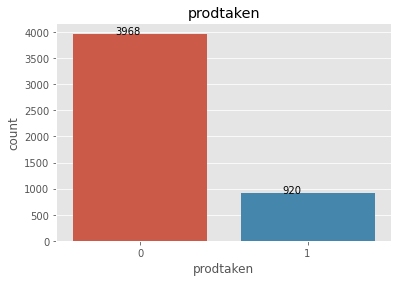

In [34]:
# Observe imbalance data
ax = sns.countplot(x="prodtaken", data=df_travel)
plt.title("prodtaken")

for p in ax.patches: #Add data label
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

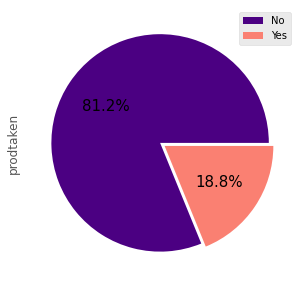

In [35]:
# distribution of data from the 'prodtaken'/ target column
plt.figure(figsize=(7,5))

df_travel['prodtaken'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['indigo','salmon'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['No', 'Yes'])
plt.show()

Terlihat bahwa sebaran datanya tidak seimbang *(imbalance)* dengan kategori orang yang membeli paket perjalanan atau `1` hanya sekitar **18.82%** yaitu sebanyak 920 orang dan orang yang tidak mengambil paket perjalanan atau `0` sekitar **81.18%** yaitu sebanyak 3.968 orang.

## Univariate analysis

Pada bagian ini Saya ingin melihat distribusi data dari:
- Fitur-fitur numerikal
- Fitur-fitur kategorikal

### Numerical Feature Summary

Langkah pertama dalam analisis univariat adalah memeriksa distribusi/penyebaran data. Ini dilakukan dengan terkhususnya menggunakan `histogram` dan `box plot`. Selain itu, Saya akan memplot setiap fitur numerik pada `violin plot` dan `cumulative density distribution plot`. Untuk membuat 4 jenis plot ini, Saya membuat fungsi `summary()` di bawah ini untuk memplot masing-masing atribut numerik. Selain itu, Saya akan menampilkan `5 point summary` berdasarkan fitur.

In [36]:
# Function to plot numerical feature
def summary(x):
    '''
    The function prints the 5 point summary and histogram, box plot, 
    violin plot, and cumulative density distribution plots for each 
    feature name passed as the argument.
    
    Parameters:
    ----------
    
    x: str, feature name
    
    Usage:
    ------------
    
    summary('age')
    '''
    x_min = df_travel[x].min()
    x_max = df_travel[x].max()
    Q1 = df_travel[x].quantile(0.25)
    Q2 = df_travel[x].quantile(0.50)
    Q3 = df_travel[x].quantile(0.75)
    
    dict={'Min': x_min, 'Q1': Q1, 'Q2': Q2, 'Q3': Q3, 'Max': x_max}
    df = pd.DataFrame(data=dict, index=['Value'])
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n')
    print(tabulate(df, headers = 'keys', tablefmt = 'psql'))

    fig = plt.figure(figsize=(16, 8))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('Pastel1')
    
    plt.subplot(221, frameon=True)
    ax1 = sns.distplot(df_travel[x], color = 'purple')
    ax1.axvline(
        np.mean(df_travel[x]), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax1.axvline(
        np.median(df_travel[x]), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222, frameon=True)
    ax2 = sns.violinplot(x = df_travel[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(223, frameon=True, sharex=ax1)
    ax3 = sns.boxplot(x=df_travel[x], palette = 'cool', width=0.7, linewidth=0.6, showmeans=True)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(224, frameon=True, sharex=ax2)
    ax4 = sns.kdeplot(df_travel[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()

#### Age

5 Point Summary of Age Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |    18 |   31 |   36 |   44 |    61 |
+-------+-------+------+------+------+-------+


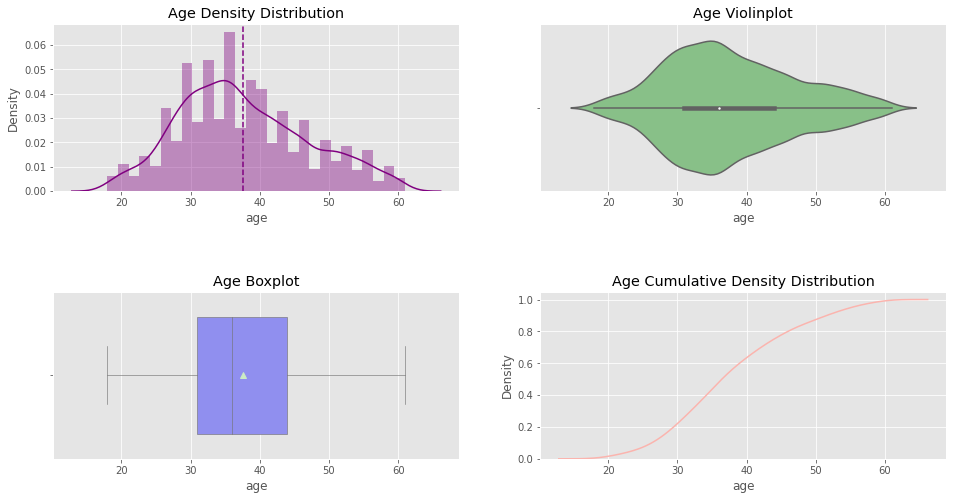

In [37]:
# plot 'Age'
summary('age')

Observasi fitur `age`:<br>
- Fitur usia terlihat terdistribusi normal
- Tidak ada outlier pada atribut usia
- Kebanyakan customer berusia `31-44 tahun`

#### Duration of Pitch

5 Point Summary of Durationofpitch Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     5 |    9 |   13 |   20 |   127 |
+-------+-------+------+------+------+-------+


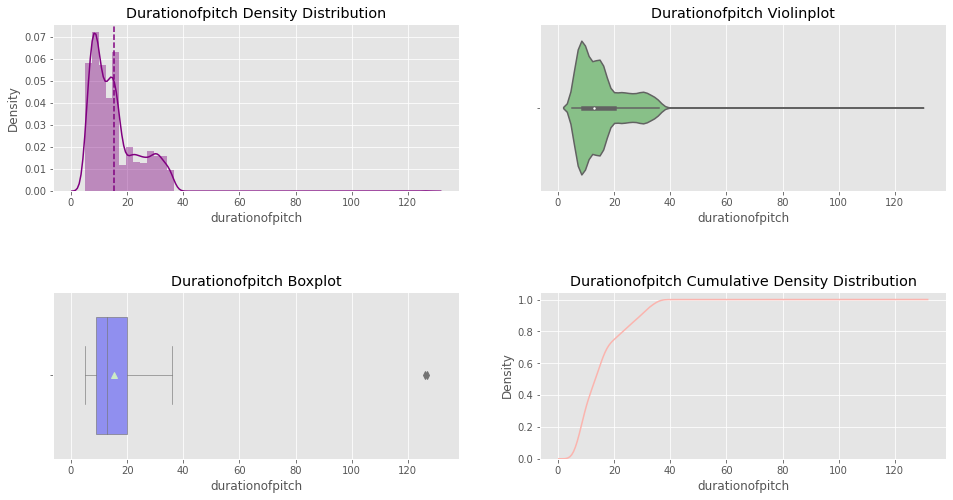

In [38]:
# plot 'durationofpitch'
summary('durationofpitch')

Observasi fitur `durationofpitch`:<br>
- Fitur durasi promosi terlihat tidak terdistribusi normal dan miring ke kanan *(right-skewed)*
- Ada outlier di tail kanan yang ekstrim
- Durasi promosi maksimal adalah `127 menit`. Jika dibandingan dengan Q3 `20 menit` itu berarti lebih dari 6 kali lebih tinggi
- Kebanyakan durasi promosinya sekitar `9-20 menit`

#### Number of Person Visiting

5 Point Summary of Numberofpersonvisiting Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     1 |    2 |    3 |    3 |     5 |
+-------+-------+------+------+------+-------+


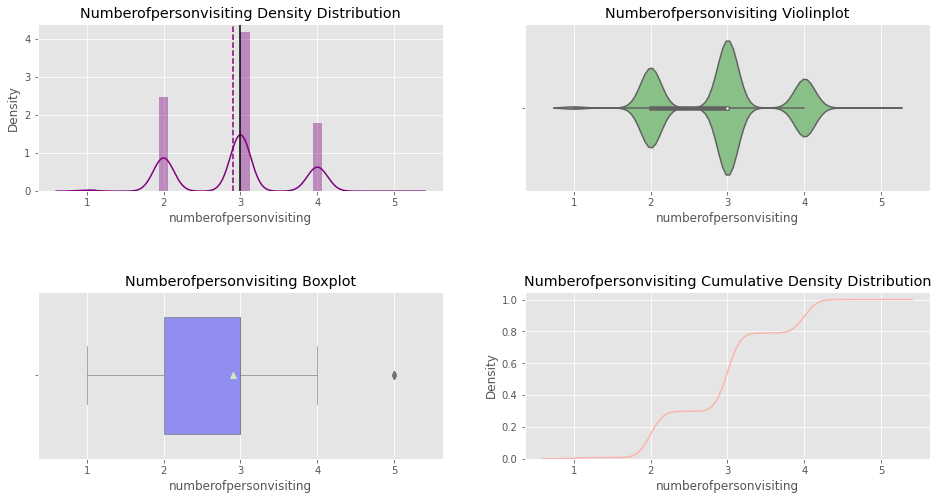

In [39]:
# plot 'numberofpersonvisiting'
summary('numberofpersonvisiting')

Observasi fitur `numberofpersonvisiting`:<br>
- Fitur ini terlihat terdistribusi normal
- Ada outlier di tail kanan menunjukkan `5 orang`
- Kebanyakan jumlah total orang yang berencana melakukan perjalanan bersama pelanggan sekitar `3 orang`

#### Number of Follow-ups

5 Point Summary of Numberoffollowups Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     1 |    3 |    4 |    4 |     6 |
+-------+-------+------+------+------+-------+


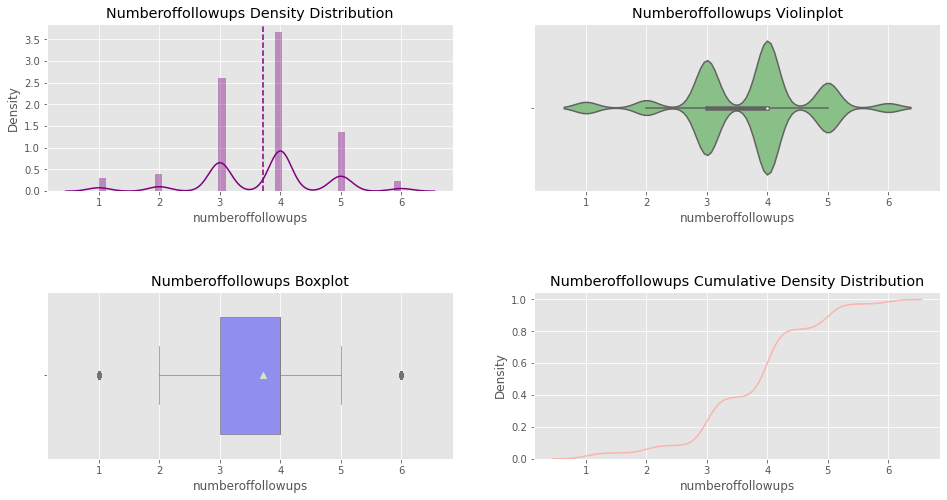

In [40]:
# plot 'numberoffollowups'
summary('numberoffollowups')

Observasi fitur `numberoffollowups`:<br>
- Fitur ini terlihat terdistribusi normal
- Ada outlier di tail kiri dan kanan menunjukkan `1 atau 6 follow-ups`
- Kebanyakan jumlah tindak lanjut yang telah dilakukan oleh sales setelah promosi penjualan adalah `4 follow-ups`

#### Preferred Property Stars

5 Point Summary of Preferredpropertystar Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     3 |    3 |    3 |    4 |     5 |
+-------+-------+------+------+------+-------+


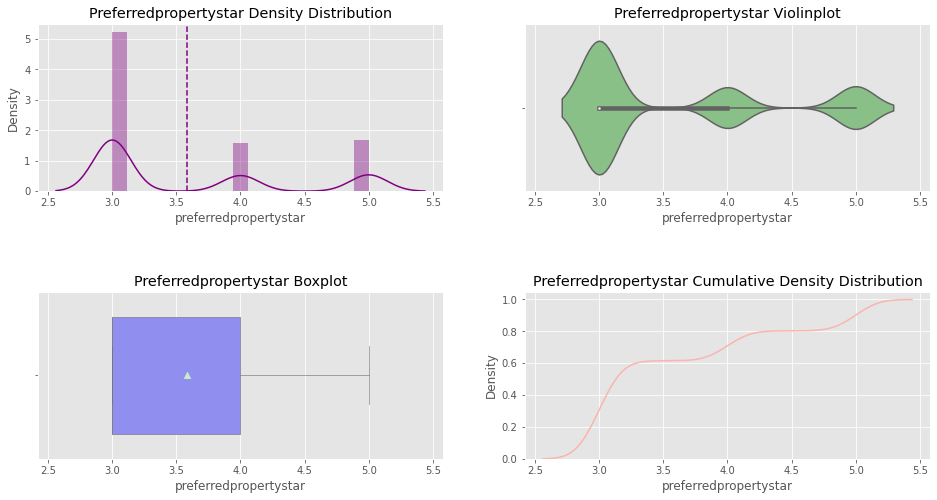

In [41]:
# plot 'preferredpropertystar'
summary('preferredpropertystar')

Observasi fitur `preferredpropertystar`:<br>
- Fitur ini terlihat tidak terdistribusi normal atau miring ke kanan *(right-skewed)*
- Tidak ada outlier
- Sebagian besar pelanggan lebih memilih akomodasi hotel `bintang 3`.

#### Number of Trips

5 Point Summary of Numberoftrips Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     1 |    2 |    3 |    4 |    22 |
+-------+-------+------+------+------+-------+


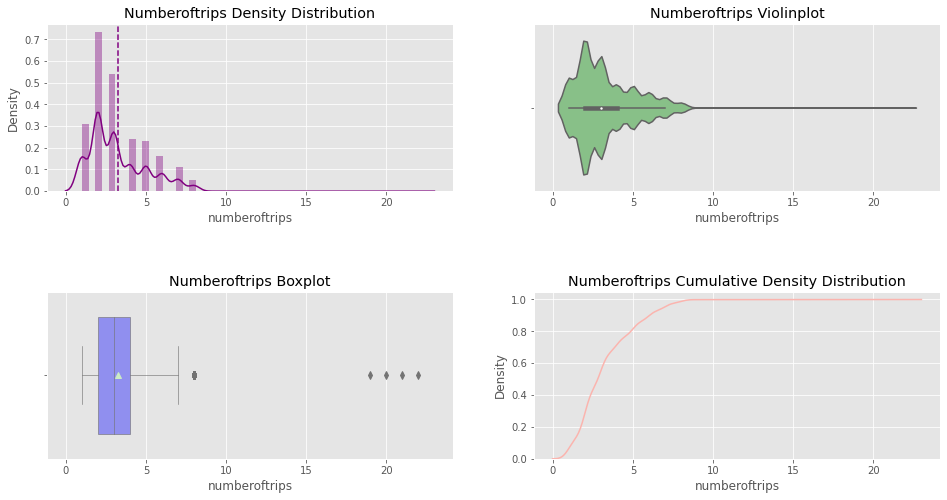

In [42]:
# plot 'numberoftrips'
summary('numberoftrips')

Observasi fitur `numberoftrips`:<br>
- Fitur ini terlihat tidak terdistribusi normal atau sangat miring ke kanan *(right-skewed)*
- Ada beberapa outlier di tail kanan
- Sebagian besar pelanggan telah melakukan `3 perjalanan` dalam setahun, sementara ada nilai yang ekstrim seperti `22 perjalanan` dalam setahun.

#### Pitch Satisfaction Score

5 Point Summary of Pitchsatisfactionscore Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     1 |    2 |    3 |    4 |     5 |
+-------+-------+------+------+------+-------+


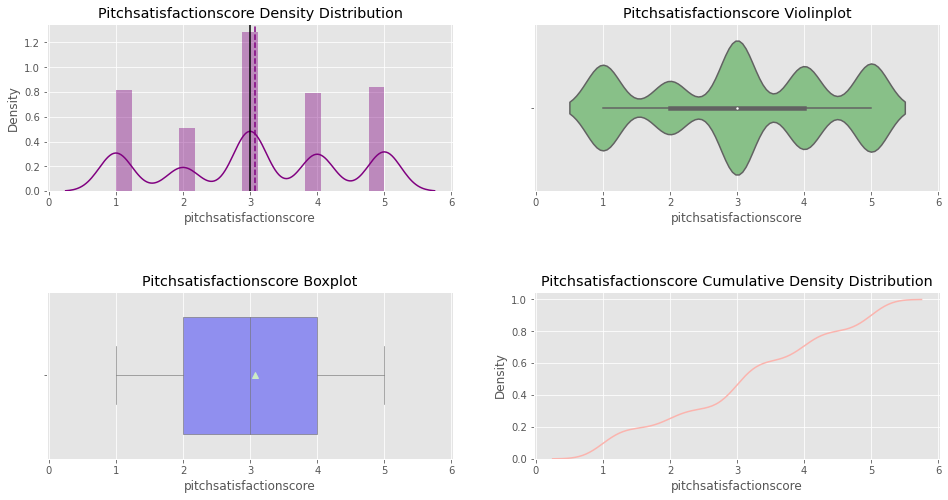

In [43]:
# plot 'pitchsatisfactionscore'
summary('pitchsatisfactionscore')

Observasi fitur `pitchsatisfactionscore`:<br>
- Fitur ini terlihat terdistribusi normal
- Tidak terdapat outlier
- Sebagian besar pelanggan memberikan `3 bintang` sebagai skor kepuasan promosi penjualan

#### Number of Children Visiting

5 Point Summary of Numberofchildrenvisiting Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     0 |    1 |    1 |    2 |     3 |
+-------+-------+------+------+------+-------+


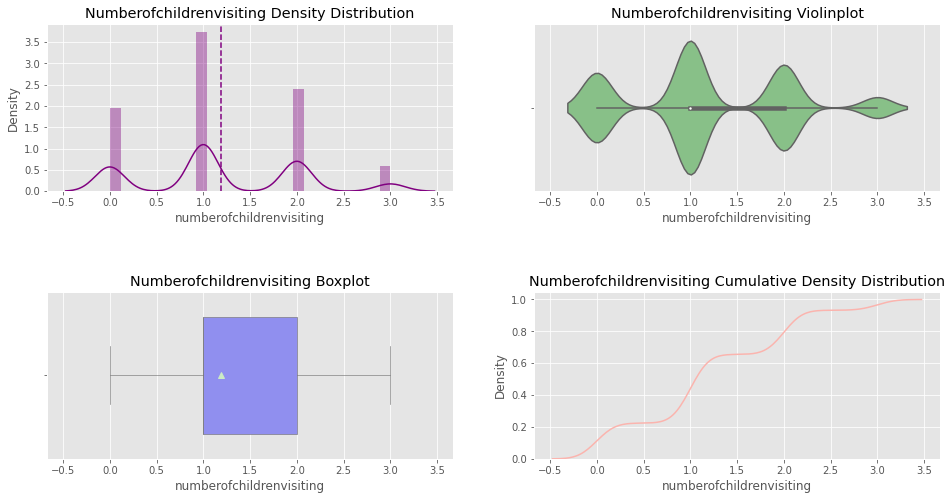

In [44]:
# plot 'numberofchildrenvisiting'
summary('numberofchildrenvisiting')

Observasi fitur `numberofchildrenvisiting`:<br>
- Fitur ini terlihat terdistribusi normal
- Tidak terdapat outlier
- Sebagian besar pelanggan memiliki `1 anak` dengan usia kurang dari 5 tahun yang berencana melakukan perjalanan bersama pelanggan

#### Monthly Income

5 Point Summary of Monthlyincome Attribute:

+-------+-------+-------+-------+-------+-------+
|       |   Min |    Q1 |    Q2 |    Q3 |   Max |
|-------+-------+-------+-------+-------+-------|
| Value |  1000 | 20346 | 22347 | 25571 | 98678 |
+-------+-------+-------+-------+-------+-------+


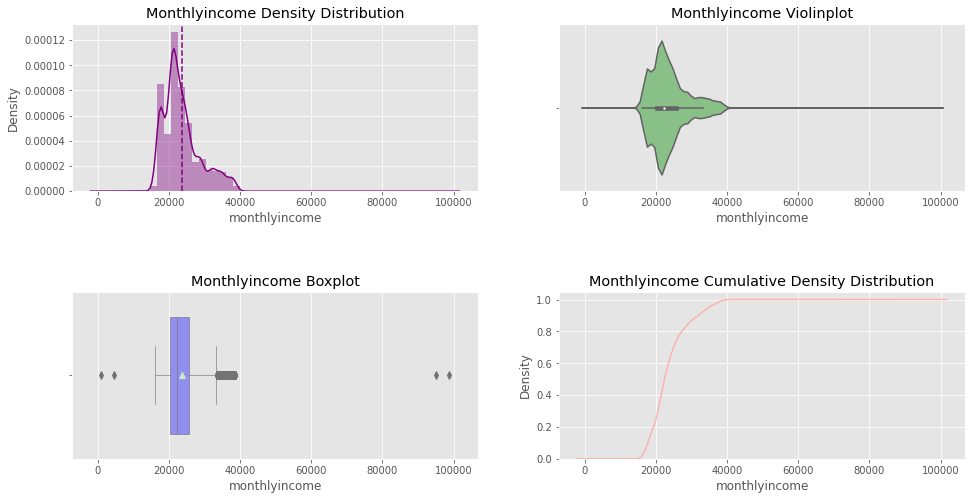

In [45]:
# plot 'monthlyincome'
summary('monthlyincome')

Observasi fitur `monthlyincome`:<br>
- Fitur ini terlihat tidak terdistribusi normal dan miring ke kanan *(right-skewed)*
- Terdapat outlier di kedua tail
- Sebagian besar pelanggan memiliki pendapatan dalam rentang `20.346 sampai 25.571`

### Categorical Feature Summary

Untuk mengetahui distribusi dari variabel kategori, cara yang terbaik adalah menganalisisnya pada persentase total pada `bar chart`. Fungsi di bawah mengambil kolom kategori sebagai input dan memplot `bar chart` dengan persentase di atas setiap bar.

In [46]:
# Below code plots grouped bar for each categorical feature

def perc_on_bar(data: pd.DataFrame, cat_columns, target, hue=None, perc=True):
    '''
    The function takes a category column as input and plots bar chart with percentages on top of each bar
    
    Usage:
    ------
    
    perc_on_bar(df, ['age'], 'prodtaken')
    '''
    
    subplot_cols = 2
    subplot_rows = int(len(cat_columns)/2 + 1)
    plt.figure(figsize=(16,5*subplot_rows))
    for i, col in enumerate(cat_columns):
        plt.subplot(subplot_rows,subplot_cols,i+1)
        order = data[col].value_counts(ascending=False).index  # Data order  
        ax=sns.countplot(data=data, x=col, palette = 'crest', order=order, hue=hue);
        for p in ax.patches:
            percentage = '{:.1f}%\n({})'.format(100 * p.get_height()/len(data[target]), p.get_height())
            # Added percentage and actual value
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + p.get_height() + 40
            if perc:
                plt.annotate(percentage, (x, y), ha='center', color='black', fontsize='medium'); # Annotation on top of bars
            plt.xticks(color='black', fontsize='medium', rotation= (-90 if col=='region' else 0));
            plt.tight_layout()
            plt.title(col.capitalize() + ' Percentage Bar Charts\n\n')

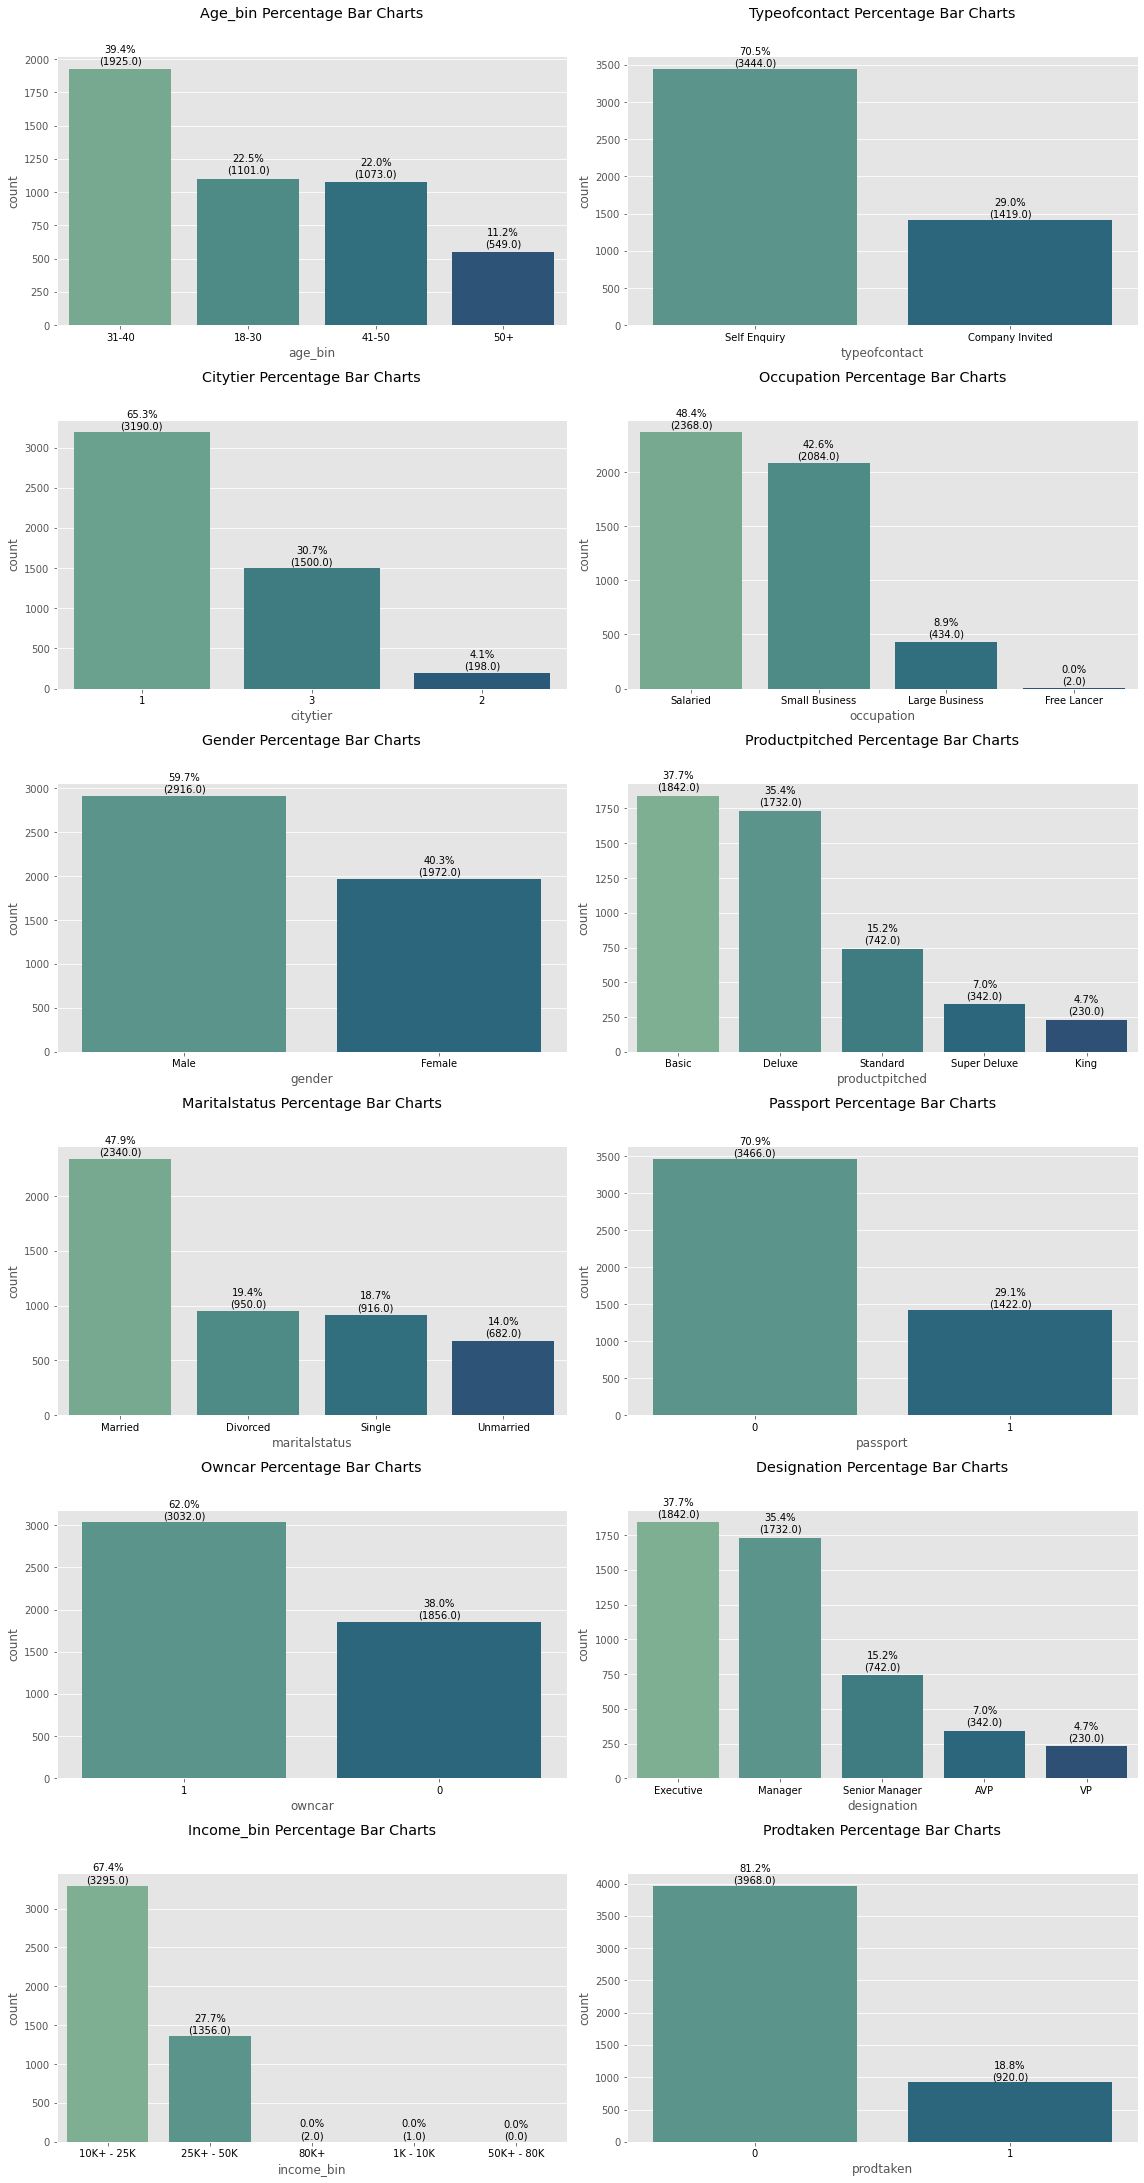

In [47]:
# plot categorical features
category_columns = df_travel.select_dtypes(include='category').columns.tolist()
target_variable = 'prodtaken'
perc_on_bar(df_travel, category_columns, target_variable)

Observasi fitur-fitur kategorik:<br>
- `~39%` berada di kelompok usia `31-40`. Hanya `~11%` pelanggan berusia `50+`.
- `70,5%` pelanggan atau sebanyak `3.444` pelanggan `bertanya sendiri` mengenai paket perjalanan.
- `~65%` pelanggan atau sebanyak `3.190` pelanggan `berasal dari kota Tier 1`.
- `~49%` pelanggan atau sebanyak `2.368` pelanggan itu pekerjaannya `salaried` atau menerima gaji.
- `60%` pelanggan atau sebanyak `2.916` pelanggan adalah `laki-laki`.
- `Paket perjalanan Basic` ditawarkan kepada `~38%` pelanggan atau `1.842` pelanggan dan `35%` atau `1.732` pelanggan ditawarkan `Paket Deluxe`.
- `~48% `pelanggan `sudah menikah`.
- `~71%` pelanggan `tidak memiliki paspor`, sementara `~29%` pelanggan `memiliki paspor`.
- `~62%` atau sebanyak `3.032` pelanggan `memiliki mobil`.
- `~38%` atau `1.842` pelanggan adalah `Eksekutif`, diikuti oleh `35%` atau `1.732` pelanggan sebagai `Manajer`.
- `~67%` atau `3.295` pelanggan memiliki pendapatan bulanan pelanggan berkisar antara `10K+ hingga 25K`.
- `~19%` atau `920` pelanggan `membeli dan menerima paket perjalanan` yang ditawarkan. Sementara `~81%` atau `3.968` pelanggan tidak `membeli paket perjalanan`.








## Bivariate analysis

Pada bagian ini Saya ingin melihat hubungan `(relationship)` semua variabel dengan dengan variabel target `prodtaken`. Tujuan dari analisis bivariat adalah untuk menemukan interdependensi antar fitur. 

### Target vs. All Numerical Columns

In [48]:
# Below code plots box charts for each numerical feature by each type of prodtaken (0: Not Purchased a package, 1: Purchased a package)
def box_by_target(numeric_columns, target, include_outliers):
    '''
    The function takes a category column, target column, and whether to include outliers or not as input 
    and plots bar chart with percentages on top of each bar
    
    Usage:
    ------
    
    box_by_target(['age'], 'prodtaken', True)
    '''
    subplot_cols = 2
    subplot_rows = int(len(numeric_columns)/2 + 1)
    plt.figure(figsize=(16,8*subplot_rows))
    for i, col in enumerate(numeric_columns):
        plt.subplot(8,2,i+1)
        sns.boxplot(data=df_travel, x=target, y=col, orient='vertical', palette="Blues", showfliers=include_outliers)
        plt.xticks(ticks=[0,1], labels=['Not Purchased a package (0)', 'Purchased a package (1)'])
        plt.tight_layout()
        plt.title(str(i+1)+ ': '+ target +' vs. ' + col, color='black')

#### With outliers

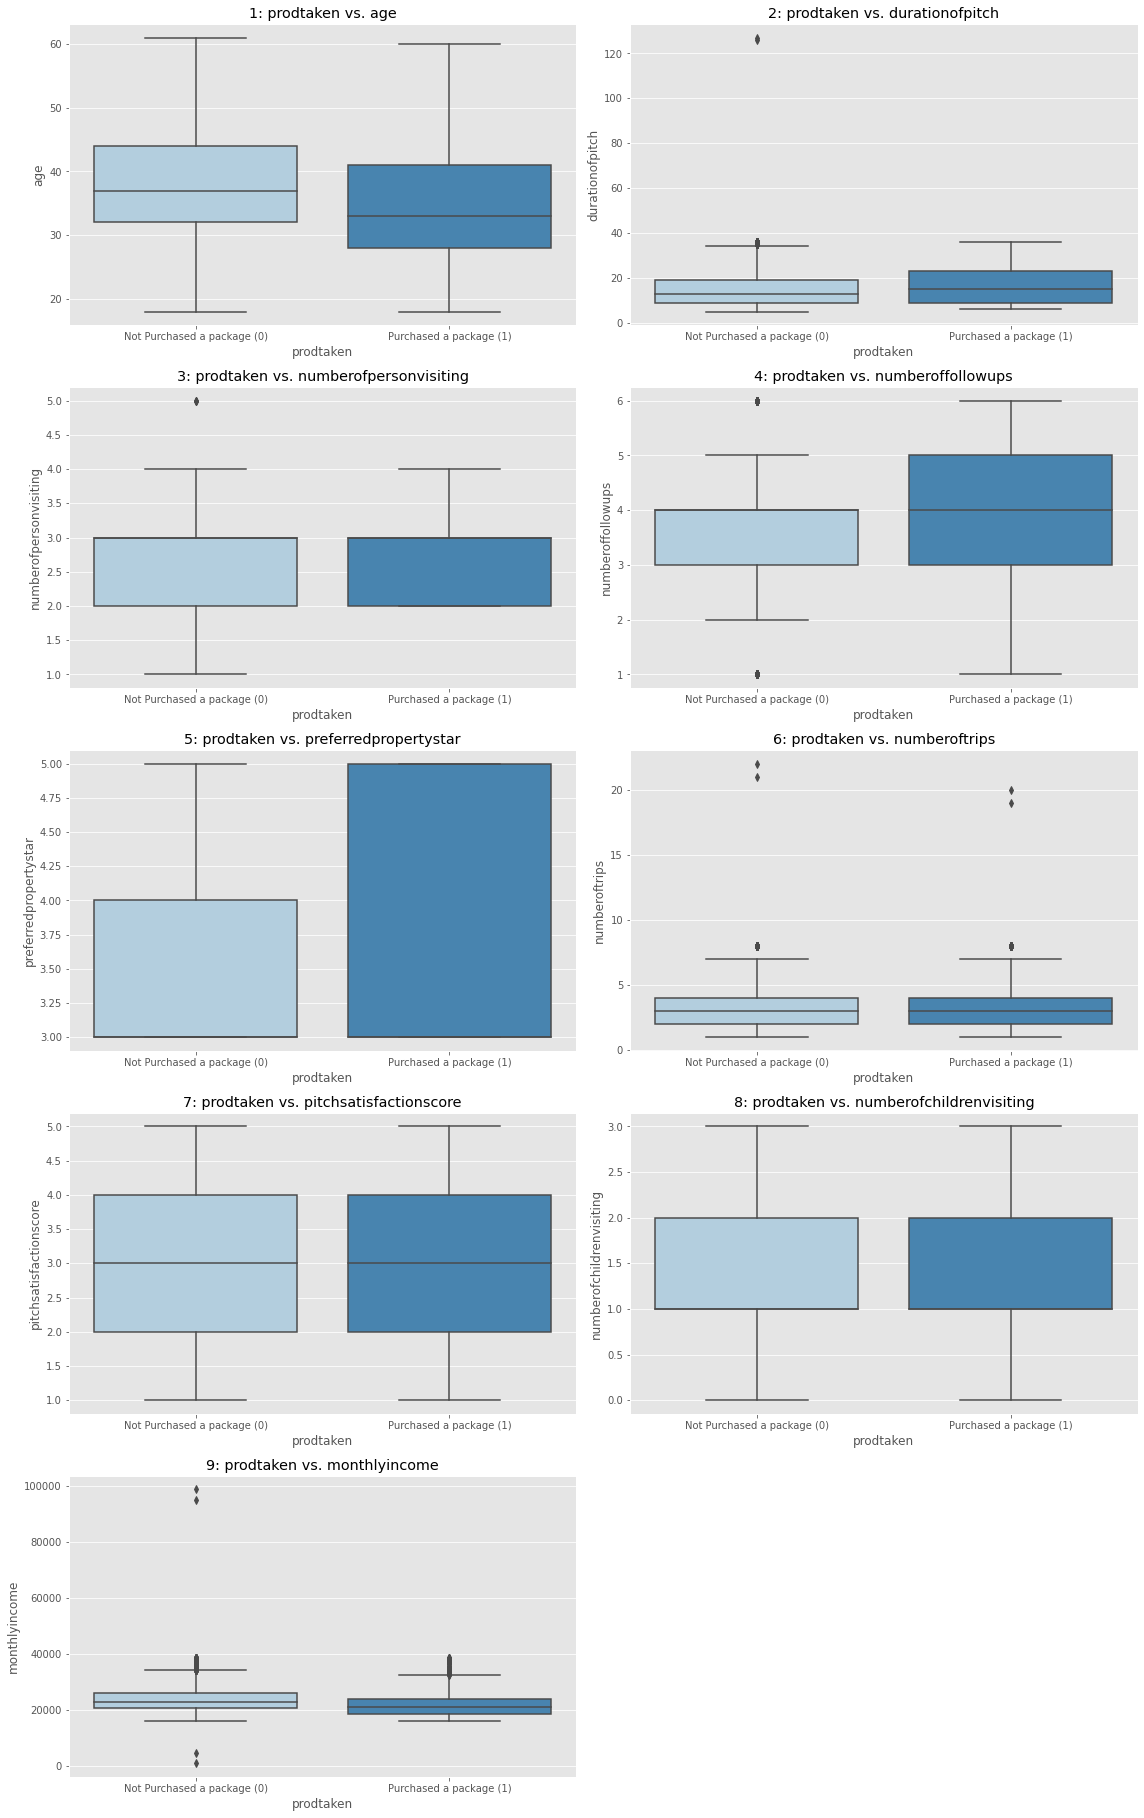

In [49]:
# Target vs. All numerical columns with outliers
numeric_columns = df_travel.select_dtypes(exclude='category').columns.tolist()
target_variable = 'prodtaken'
box_by_target(numeric_columns, target_variable, True)

Observasi (dengan outlier) tentang hubungan variabel numerik dengan target yang signifikan:<br>
- Orang yang `lebih muda` tampaknya lebih memilih paket perjalanan daripada orang yang `lebih tua`
- Orang yang sudah mempunyai `follow up lebih banyak`, cenderung membeli paket
- Orang yang menyukai `properti dengan rating tinggi`, cenderung membeli paket perjalanan

#### Without outliers

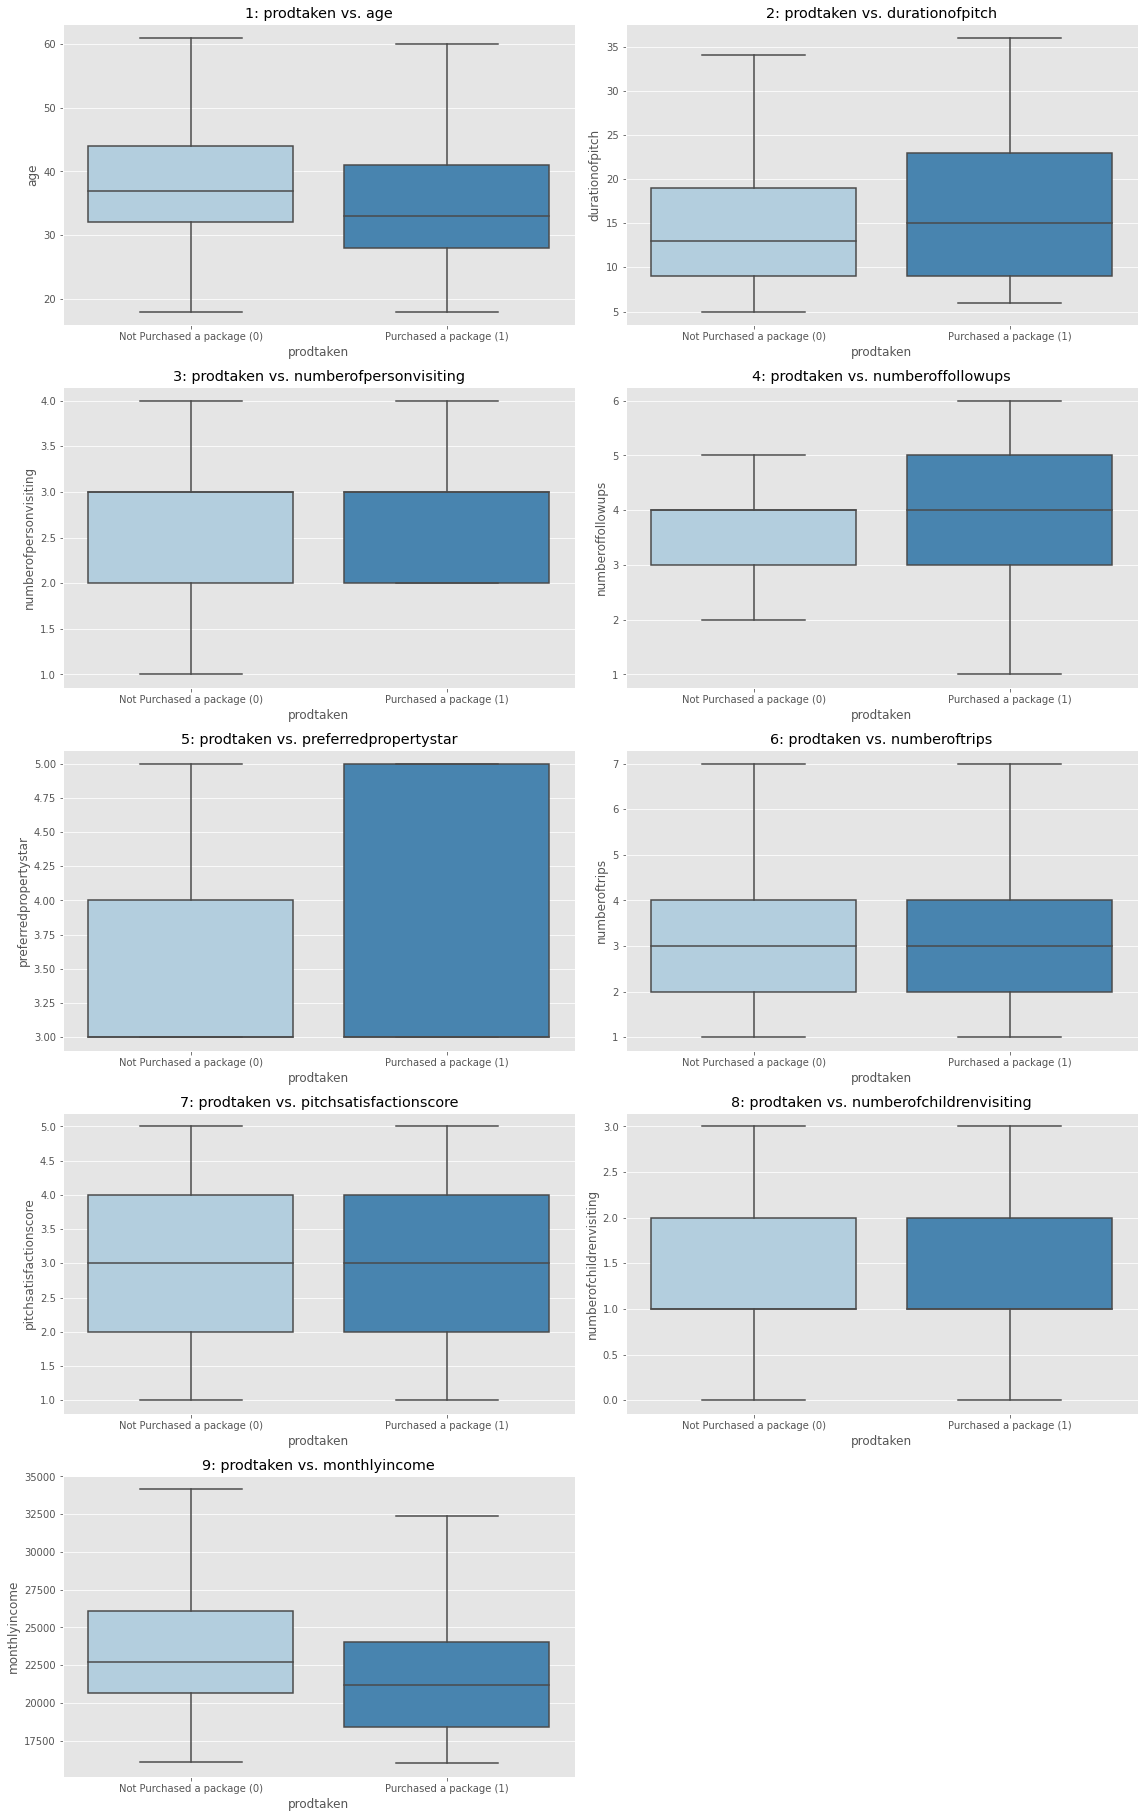

In [50]:
# Target vs. All numerical columns without outliers
box_by_target(numeric_columns, target_variable, False)

Observasi (tanpa outlier) tentang hubungan variabel numerik dengan target yang signifikan:<br>
- Orang yang `lebih muda` tampaknya lebih memilih paket perjalanan daripada orang yang `lebih tua`
- Orang dengan `durasi promosi yang lama` tampaknya lebih memilih paket perjalanan
- Orang yang sudah mempunyai `follow up lebih banyak`, cenderung membeli paket
- Orang yang menyukai `properti dengan rating tinggi`, cenderung membeli paket perjalanan
- Orang dengan kisaran pendapatan `18K hingga 24K` per bulan tampaknya lebih cenderung banyak membeli paket perjalanan

### Target vs. All Categorical Columns

In [51]:
# Create a function that returns a Pie chart and a Bar Graph for the categorical variables:
def cat_view(x, target):
    """
    Function to create a Bar chart and a Pie chart for categorical variables.
    """
    color1 = cm.inferno(np.linspace(.4, .8, 30))
    color2 = cm.viridis(np.linspace(.4, .8, 30))
    sns.set_palette('cubehelix')
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    
     
    """
    Draw a Pie Chart on first subplot.
    """    
    s = df_travel.groupby(x).size()

    mydata_values = s.values.tolist()
    mydata_index = s.index.tolist()

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)


    wedges, texts, autotexts = ax[0].pie(mydata_values, autopct=lambda pct: func(pct, mydata_values),
                                      textprops=dict(color="w"))

    ax[0].legend(wedges, mydata_index,
              title=x.capitalize(),
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=12)

    ax[0].set_title(f'{x.capitalize()} Pie Chart')
    
    """
    Draw a Bar Graph on second subplot.
    """
    
    df = pd.pivot_table(df_travel, index = [x], columns = [target], values = ['monthlyincome'], aggfunc = len)

    labels = df.index.tolist()
    taken_no = df.values[:, 0].tolist()
    taken_yes = df.values[:, 1].tolist()
    
    l = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    rects1 = ax[1].bar(l - width/2, taken_no, width, label='Not Purchased a package', color = color1)
    rects2 = ax[1].bar(l + width/2, taken_yes, width, label='Purchased a package', color = color2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax[1].set_ylabel('Scores')
    ax[1].set_title(f'{x.capitalize()} Bar Graph')
    ax[1].set_xticks(l)
    ax[1].set_xticklabels(labels)
    ax[1].legend()
    
    def autolabel(rects):
        
        """Attach a text label above each bar in *rects*, displaying its height."""
        
        for rect in rects:
            height = rect.get_height()
            ax[1].annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        fontsize = 'medium',   
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()
    
    """
    Draw a Stacked Bar Graph on bottom.
    """
    
    sns.set(palette="tab10")
    tab = pd.crosstab(df_travel[x], df_travel[target].map({0:'Not Purchased a package', 1:'Purchased a package'}), normalize="index")
    
    tab.plot.bar(stacked=True, figsize=(16, 3))
    plt.title(x.capitalize() + ' Stacked Bar Plot')
    plt.legend(loc="upper right", bbox_to_anchor=(0,1))
    plt.show()

#### Type of Contact

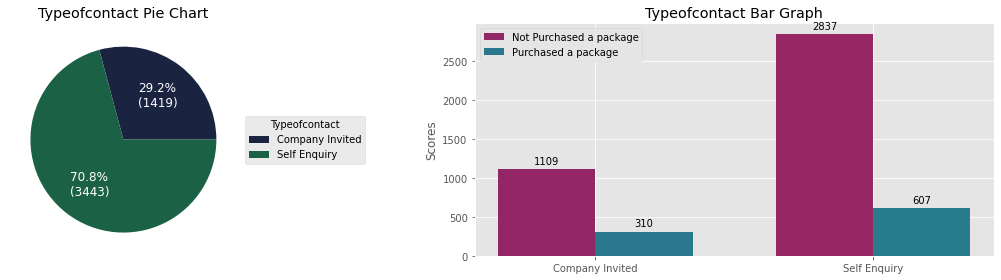

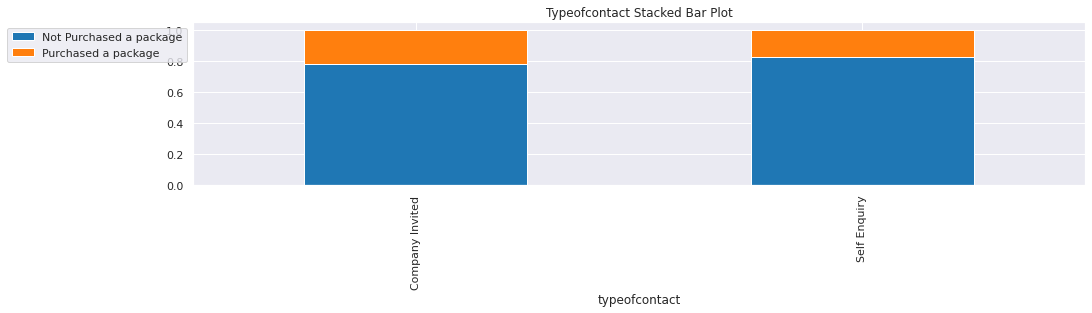

In [52]:
# plot 'typeofcontact' vs 'prodtaken'
cat_view('typeofcontact', 'prodtaken')

Observasi:<br>
- Sebagian besar pelanggan melakukan `penyelidikan sendiri`
- Namun, keputusan pelanggan memilih untuk mengambil paket atau tidak itu tampaknya tidak bergantung pada `typeofcontact`

#### City Tier

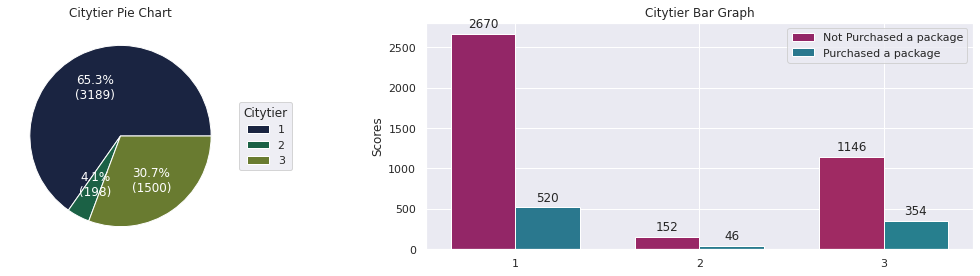

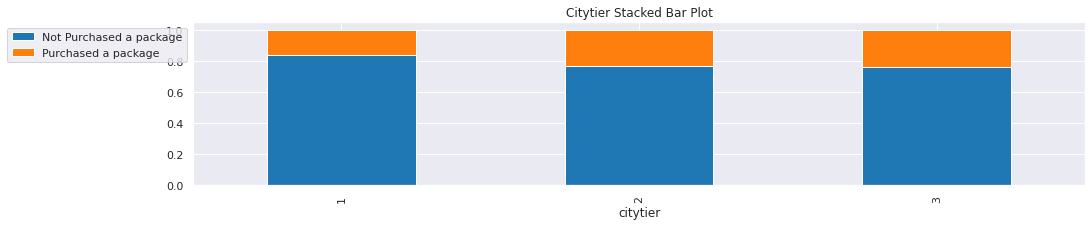

In [53]:
# plot 'citytier' vs 'prodtaken'
cat_view('citytier', 'prodtaken')

Observasi:<br>
- Sebagian besar pelanggan `berasal dari Kota Tier 1`
- Pelanggan yang `berasal dari Kota Tier 2 dan 3` tampaknya sedikit lebih tertarik untuk membeli paket perjalanan

#### Occupation

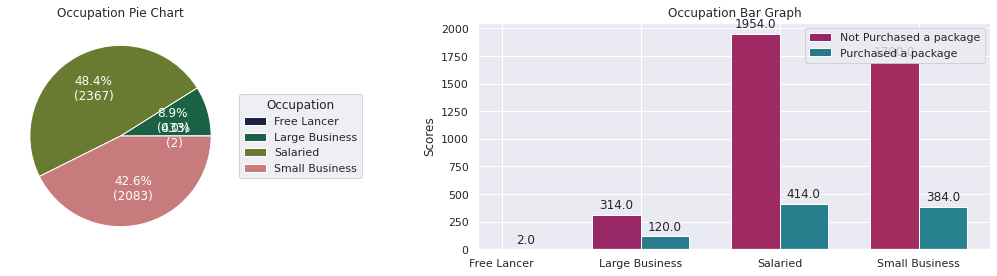

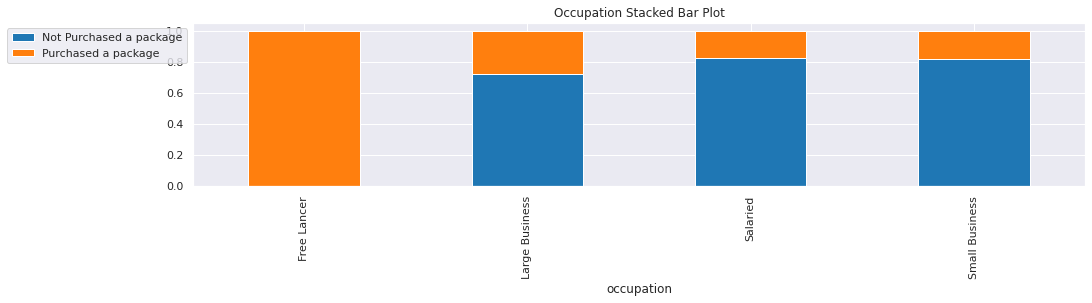

In [54]:
# plot 'occupation' vs 'prodtaken'
cat_view('occupation', 'prodtaken')

Observasi:<br>
- Sebagian besar pelanggan memiliki pekerjaan yang `digaji` atau menjalankan `bisnis kecil`
- Hanya ada 2 pekerja lepas atau `freelancers` yang benar-benar membeli paket perjalanan
- Selain itu, orang yang menjalankan `bisnis besar` atau `large business` yang lebih banyak cenderung memilih untuk membeli paket daripada orang yang menjalankan `bisnis kecil` maupun orang yang pekerjaannya `digaji`

#### Gender

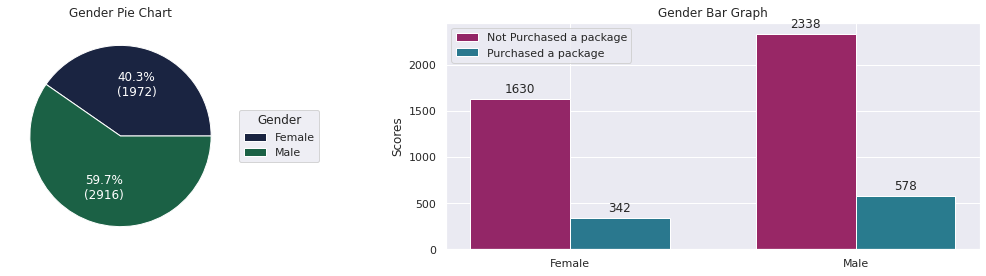

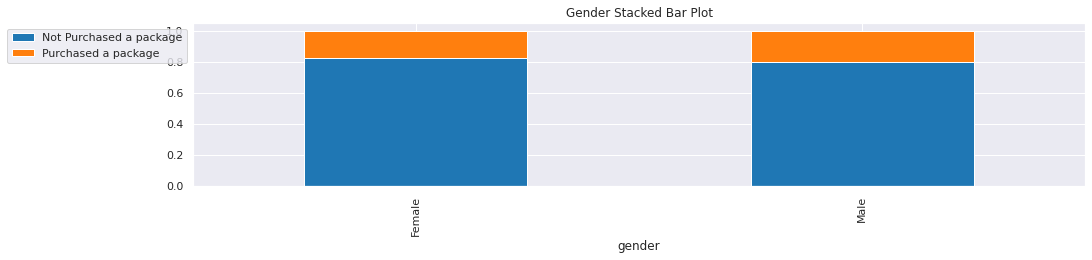

In [55]:
# plot 'gender' vs 'prodtaken'
cat_view('gender', 'prodtaken')

Observasi:<br>
- Hampir `60%` pelanggan adalah pria
- Kecenderungan membeli paket perjalanan tampaknya tidak dipengaruhi oleh jenis kelamin pelanggan

#### Product Pitched

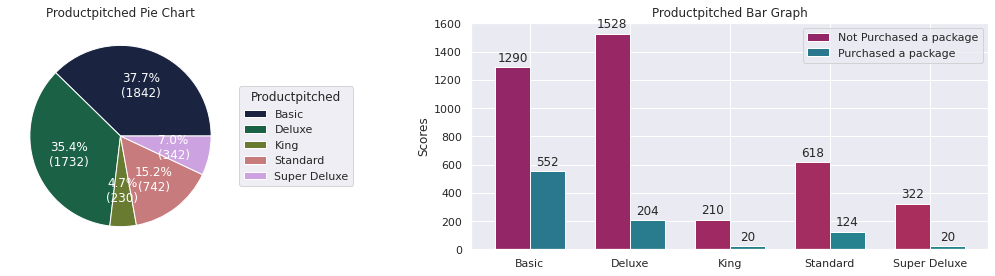

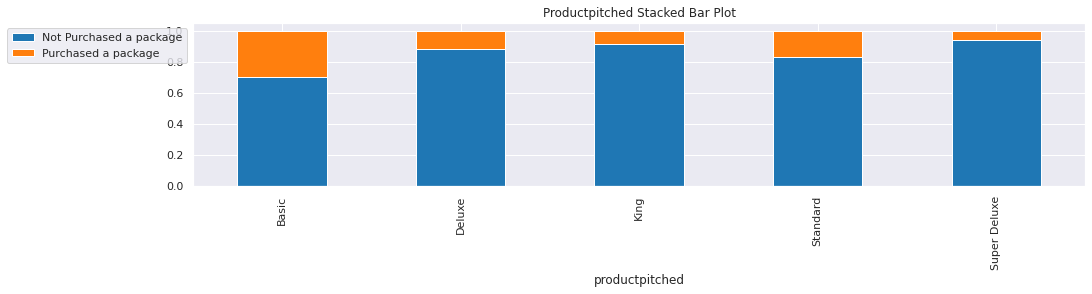

In [56]:
# plot 'productpitched' vs 'prodtaken'
cat_view('productpitched', 'prodtaken')

Observasi:<br>
- `Basic` dan `Deluxe` adalah dua paket yang ditawarkan kepada sebagian besar pelanggan
- Orang-orang cenderung lebih banyak membeli paket perjalanan ketika ditawarkan dengan `paket Basic` dan `paket Standard`

#### Marital Status

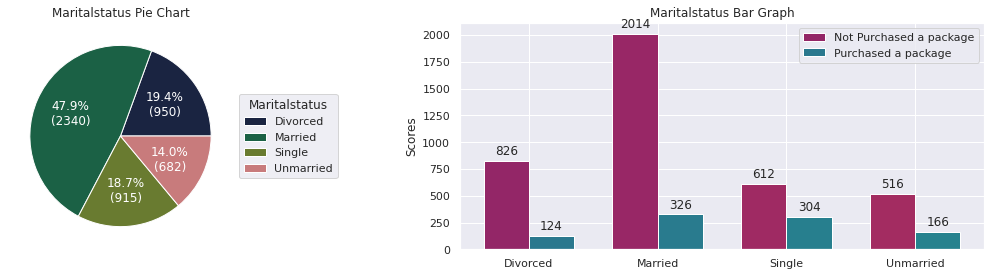

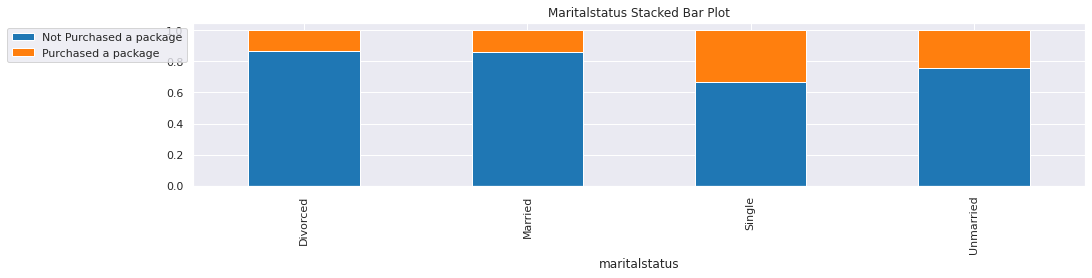

In [57]:
# plot 'maritalstatus' vs 'prodtaken'
cat_view('maritalstatus', 'prodtaken')

Observasi:<br>
- Sebagian besar pelanggan `sudah menikah`
- Orang yang `Single` dan `Unmarried` cenderung lebih banyak membeli paket perjalanan dari kategori lainnya

#### Passport

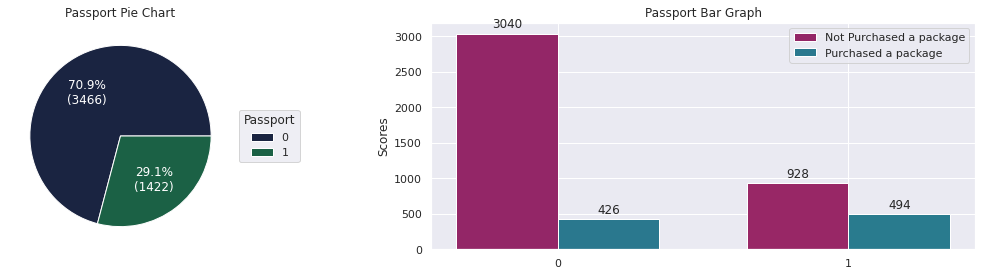

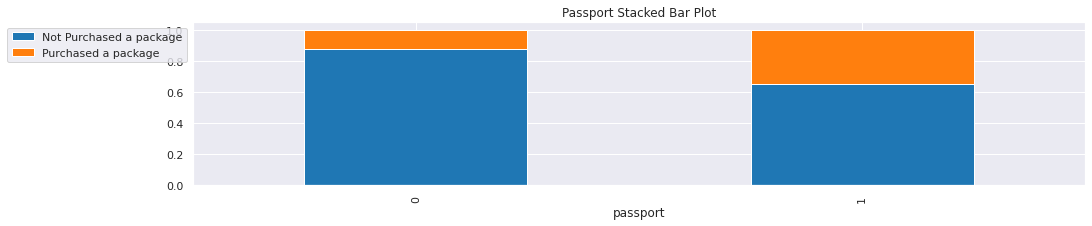

In [58]:
# plot 'passport' vs 'prodtaken'
cat_view('passport', 'prodtaken')

Observasi:<br>
- Sebagian besar pelanggan `tidak memiliki paspor`
- Orang yang `memiliki paspor` cenderung lebih banyak membeli paket perjalanan daripada orang yang `tidak memiliki paspor`

#### Own Car

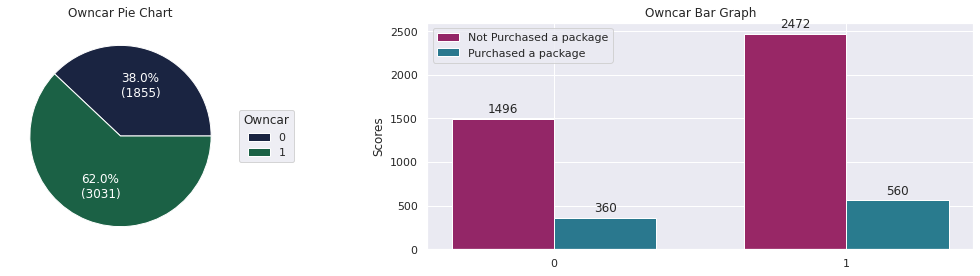

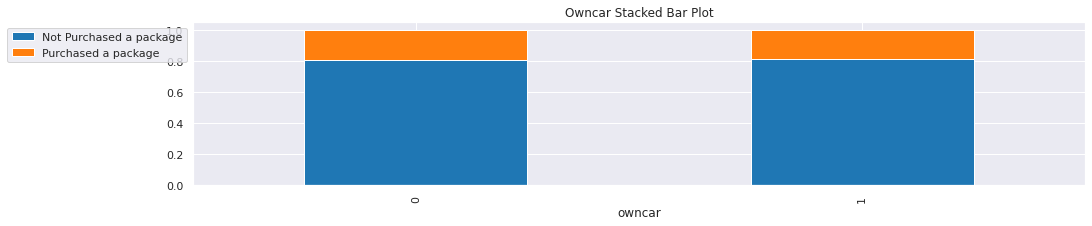

In [59]:
# plot 'owncar' vs 'prodtaken'
cat_view('owncar', 'prodtaken')

Observasi:<br>
- Sebagian besar pelanggan `memiliki mobil pribadi`
- Kepemilikan mobil tampaknya tidak berdampak pada kecenderungan pembelian paket perjalanan

#### Designation

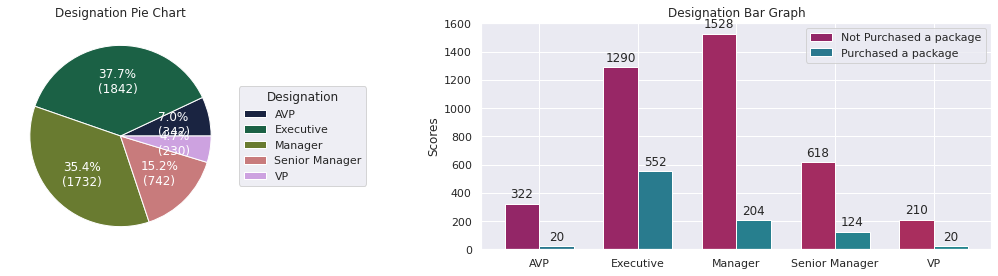

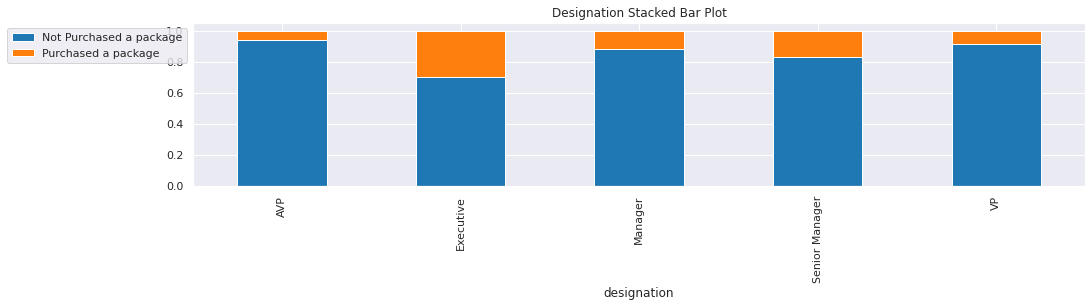

In [60]:
# plot 'designation' vs 'prodtaken'
cat_view('designation', 'prodtaken')

Observasi:<br>
- Sebagian besar pelanggan adalah `Eksekutif` dan `Manajer`
- Pelanggan yang posisinya `Eksekutif` tampaknya memiliki kecenderungan yang lebih tinggi untuk membeli paket perjalanan

#### Age bin

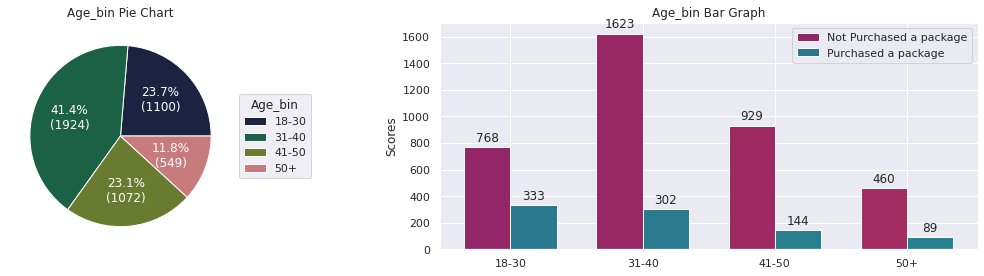

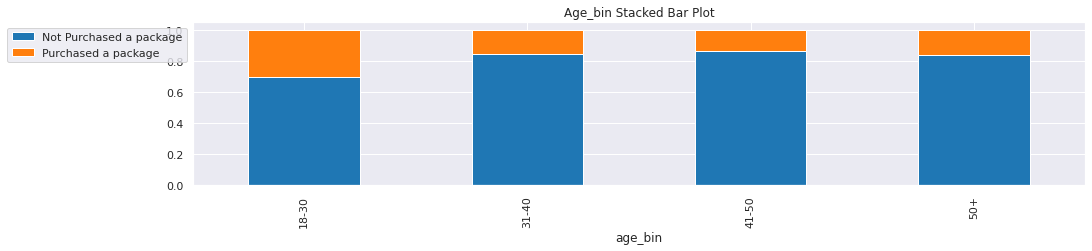

In [61]:
# plot 'age_bin' vs 'prodtaken'
cat_view('age_bin', 'prodtaken')

Observasi:<br>
- Sebagian besar pelanggan berusia antara `31-40 tahun`
- Kelompok pelanggan yang berusia `18-30 tahun` memiliki kecenderungan untuk `membeli paket perjalanan` dibandingkan dengan kelompok usia lainnya

#### Income bin

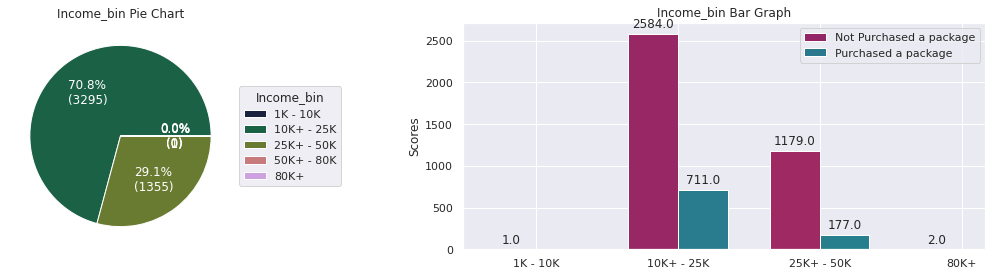

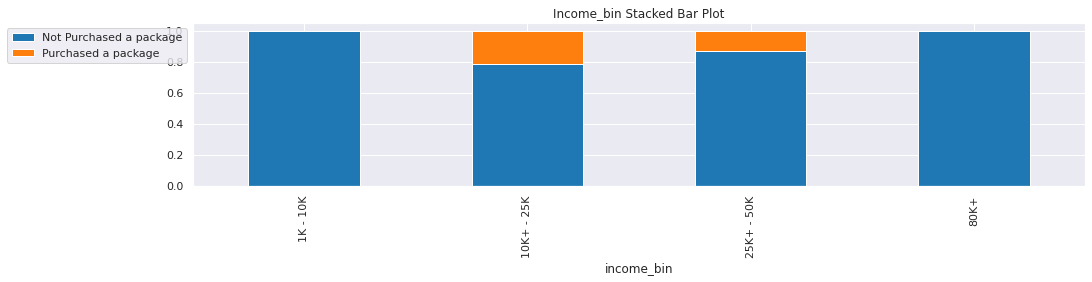

In [62]:
# plot 'income_bin' vs 'prodtaken'
cat_view('income_bin', 'prodtaken')

Observasi:<br>
- Sebagian besar pelanggan berada dalam kisaran pendapatan bulanan `10K+ hingga 25K`
- Pelanggan berpenghasilan `<10K atau >50K` per bulan, lebih cenderung `tidak membeli paket perjalanan`

### Important features

Menurut analisis bivariat sejauh ini, variabel penting yang mungkin mempengaruhi kecenderungan pembelian paket perjalanan, adalah:<br>
- Age/Age bin
- Number of follow-ups
- Preferred property rating
- Income/Income bin
- City Tier
- Occupation
- Product Pitched
- Marital Status
- Passport
- Designation

## Multivariate analysis

### Pairplot of all available numeric columns, hued by prodtaken

<Figure size 1440x1440 with 0 Axes>

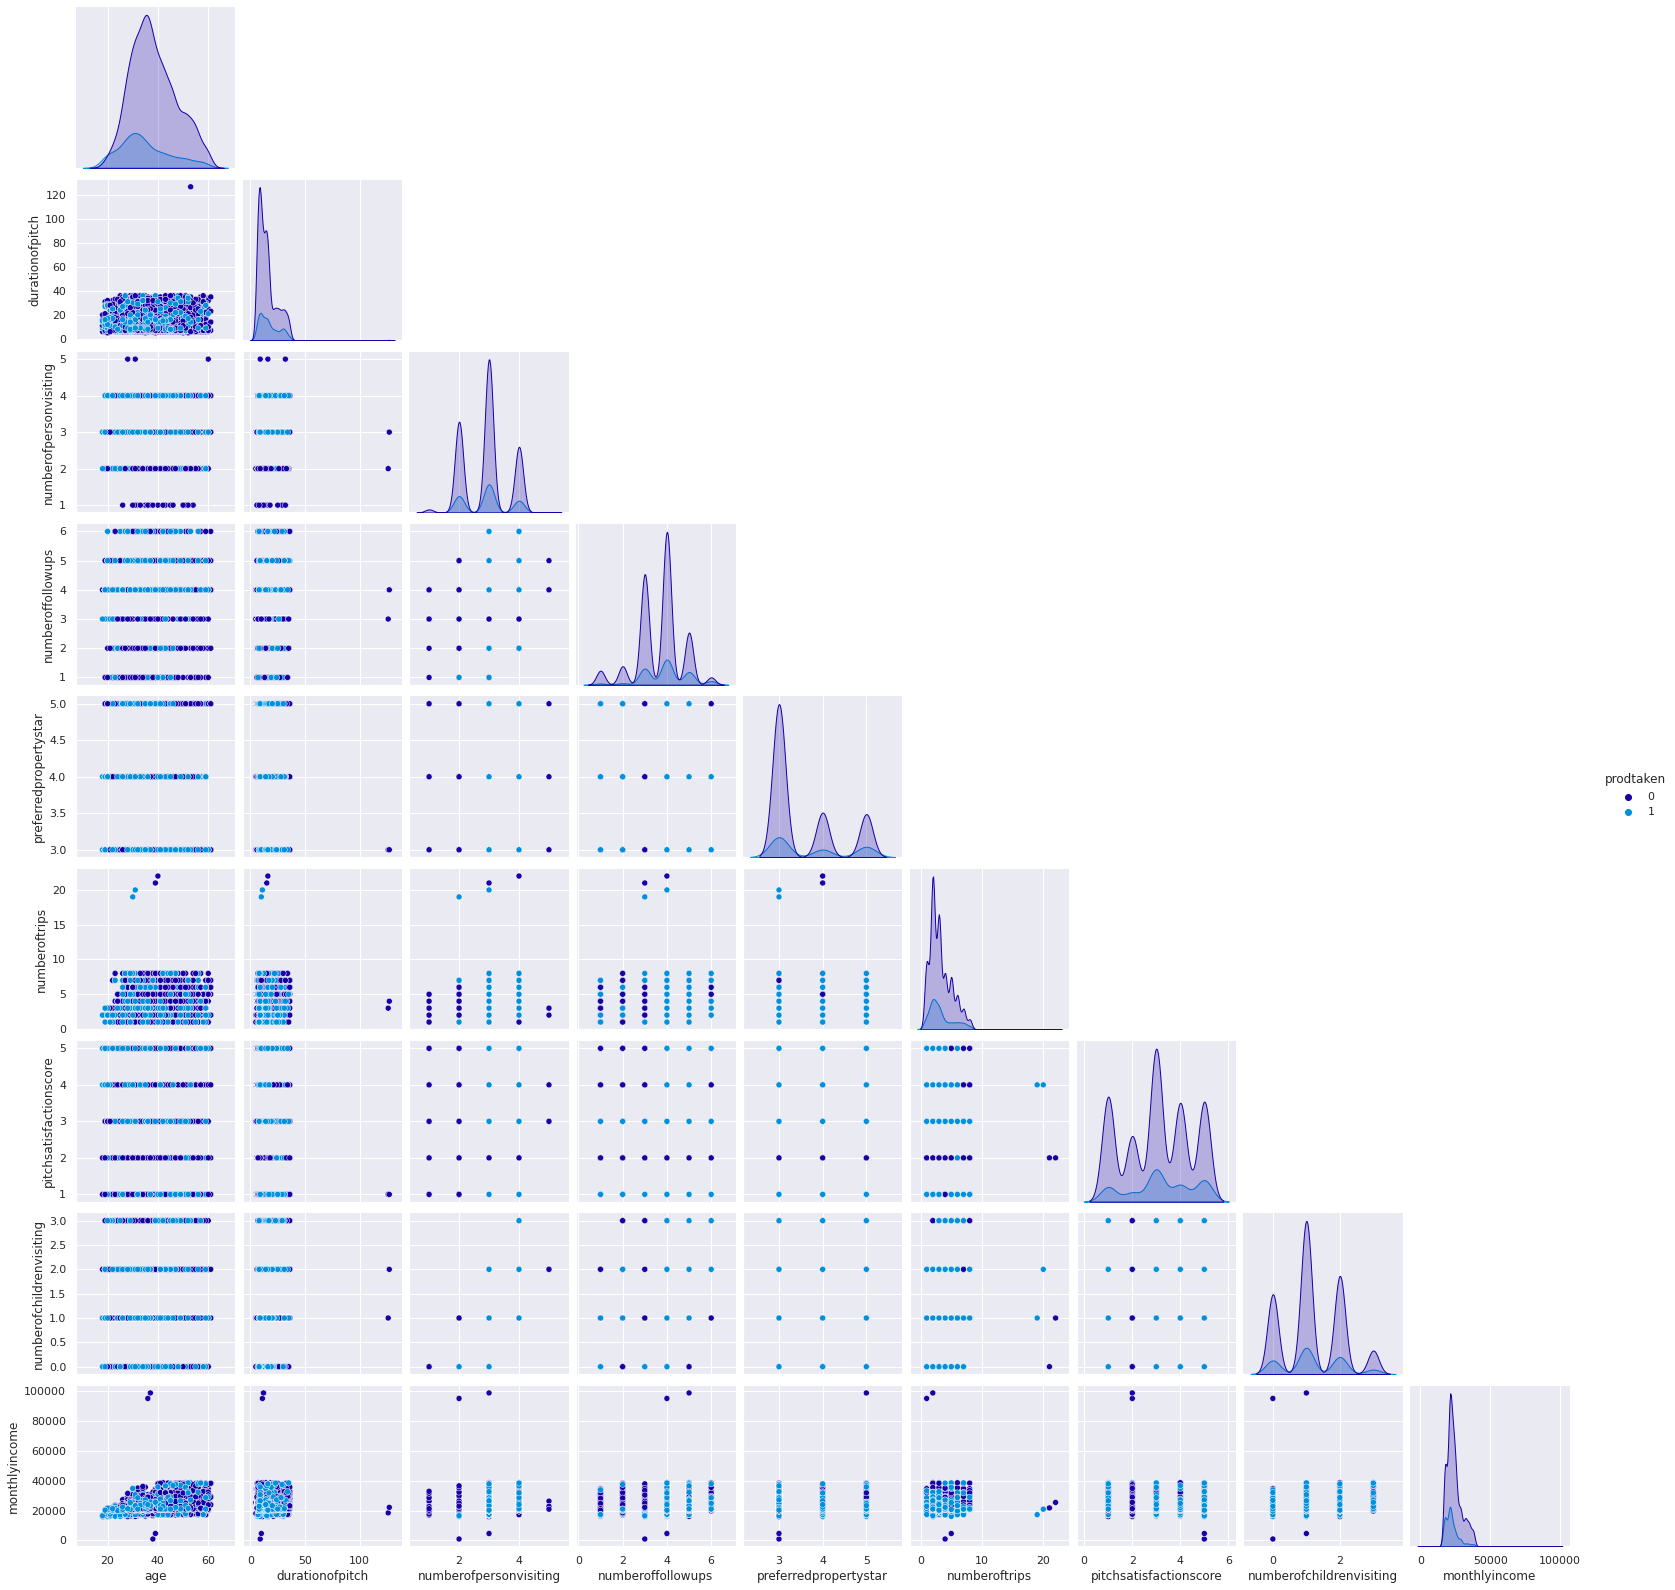

In [63]:
# Below plot shows correlations between the numerical features in the dataset

plt.figure(figsize=(20,20));
sns.set(palette="nipy_spectral");
sns.pairplot(data=df_travel, hue='prodtaken', corner=True);

### Heatmap to understand correlations between independent and dependent variables

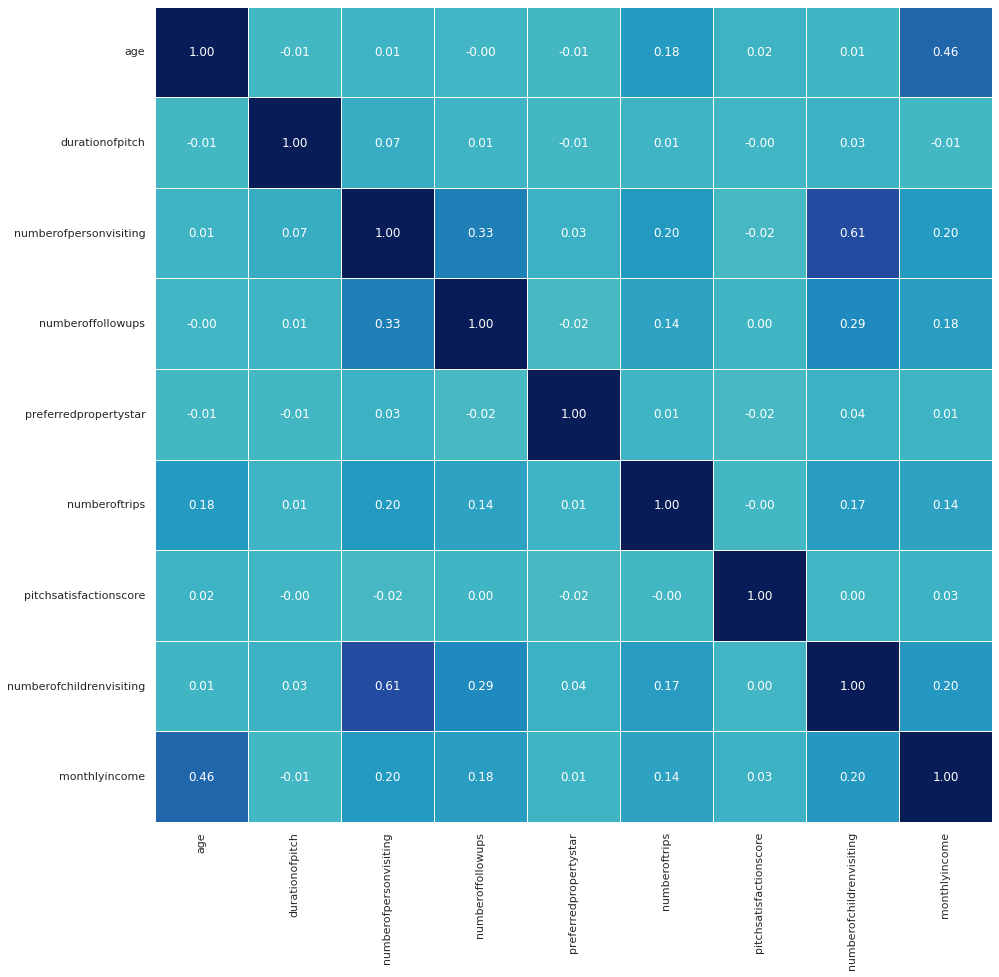

In [64]:
# Plotting correlation heatmap of the features

sns.set(rc={"figure.figsize": (15, 15)})
sns.heatmap(
    df_travel.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()

Observasi:<br>
- `Number of Persons Visting` berkorelasi positif kuat dengan `Number of Children Visting`
- `Monthly Income` menunjukkan korelasi positif sedang dengan `Age`

### Categorical variables vs. Monthly Income by Product Taken (Including outliers)

In [65]:
# Function to plot numerical feature by each category with target hue

def plot_numeric_by_cat(category_columns: list, numeric_column: str, hue: str):
    '''
    The function plots a numerical feature in box plot by every category column specified in the list, 
    with hue of a target category
    '''
    num_cols = 2
    num_rows = int(len(category_columns) /2 + 1)

    plt.figure(figsize=(15, 8*num_rows))
    for i, col in enumerate(category_columns):
        plt.subplot(num_rows, num_cols, i+1)
        sns.set(palette="nipy_spectral");
        sns.boxplot(data=df_travel, x=col, y=numeric_column, hue=hue, showfliers=True).set(title = numeric_column + ' vs. ' + col + ' by ' + hue);

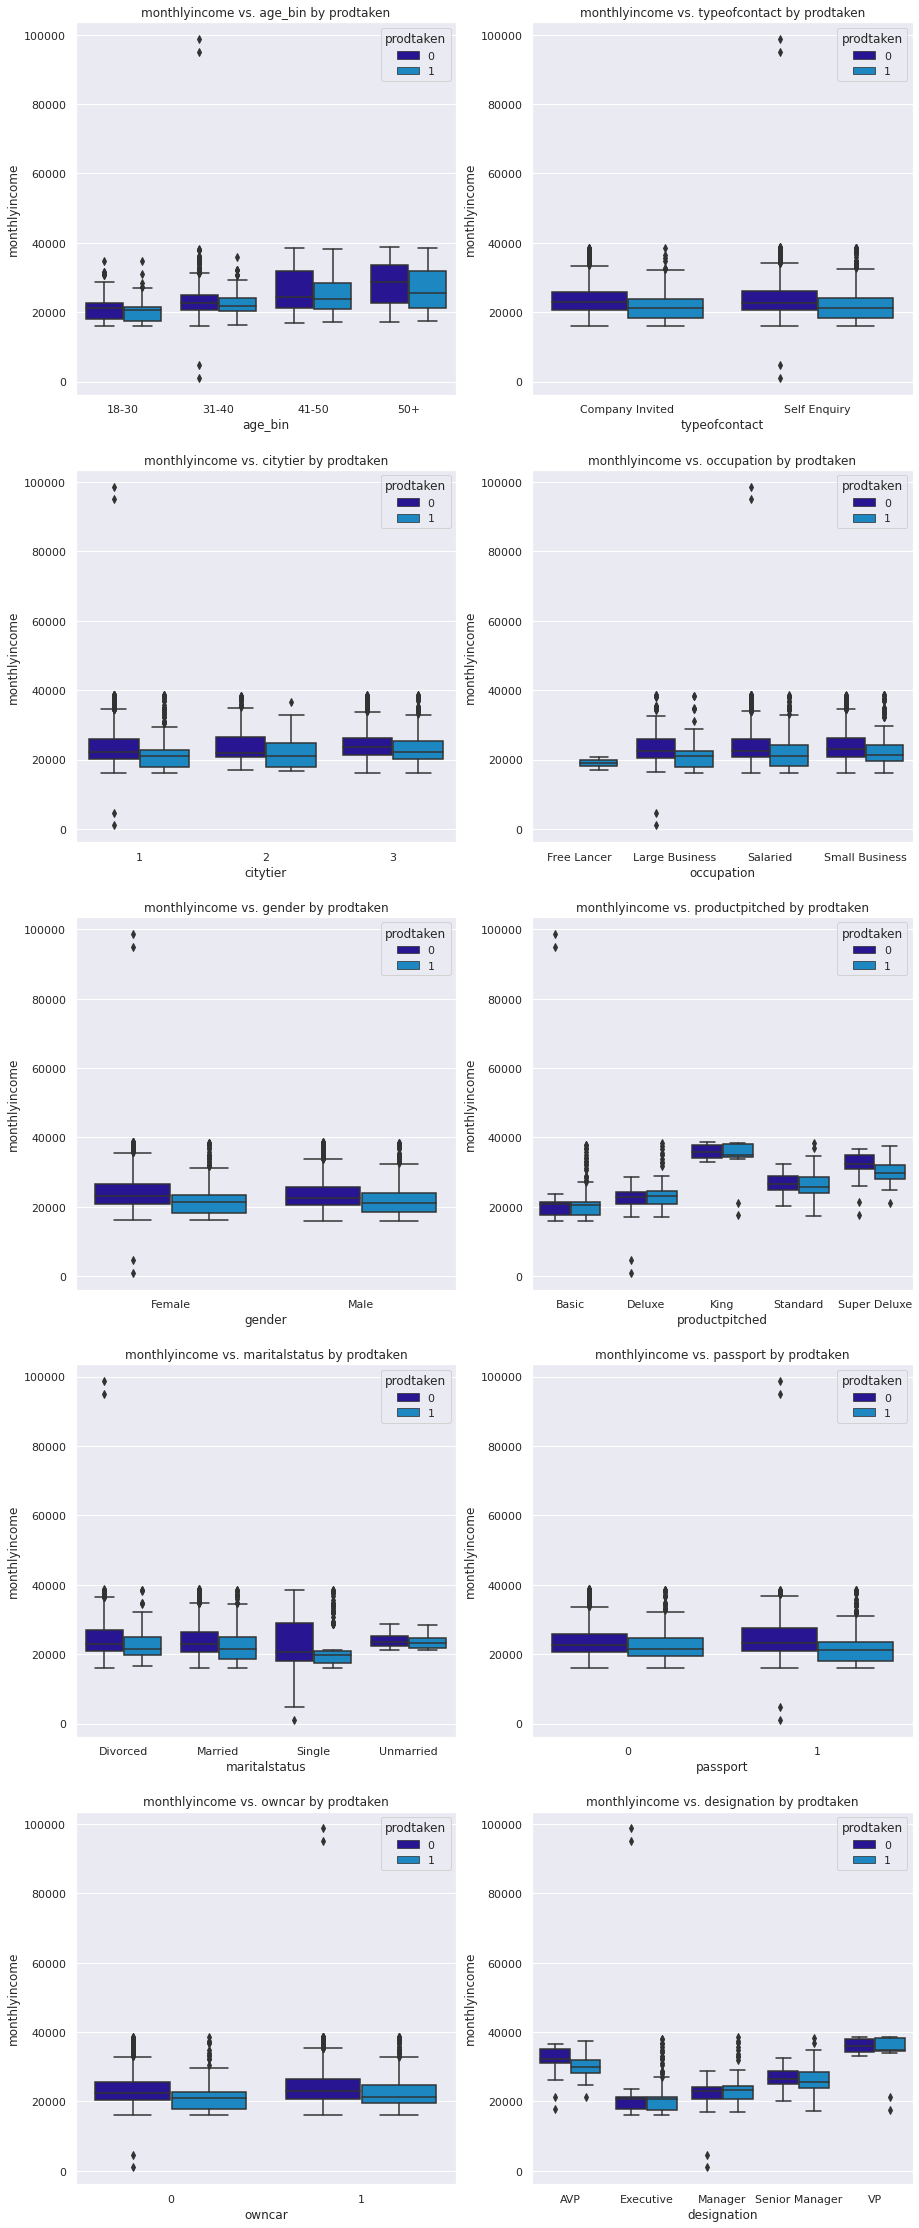

In [66]:
# Categorical variables vs. Monthly Income by Product Taken (Including outliers)
category_columns = df_travel.select_dtypes(include='category').columns.tolist()
category_columns.remove('prodtaken')
category_columns.remove('income_bin')

plot_numeric_by_cat(category_columns, 'monthlyincome', 'prodtaken')

Observasi:<br>
- Secara keseluruhan, pelanggan dengan kisaran pendapatan `15K hingga 40K` memiliki kecenderungan lebih tinggi untuk membeli paket perjalanan
- Pelanggan dengan kisaran pendapatan yang lebih tinggi memiliki kecenderungan yang lebih tinggi untuk membeli paket perjalanan `paket King dan Super Deluxe` 
- Pelanggan dengan posisi `VP` memiliki kisaran pendapatan yang lebih tinggi dan kecenderungan yang lebih tinggi untuk membeli paket perjalanan

### Categorical variables vs. Age by Product Taken

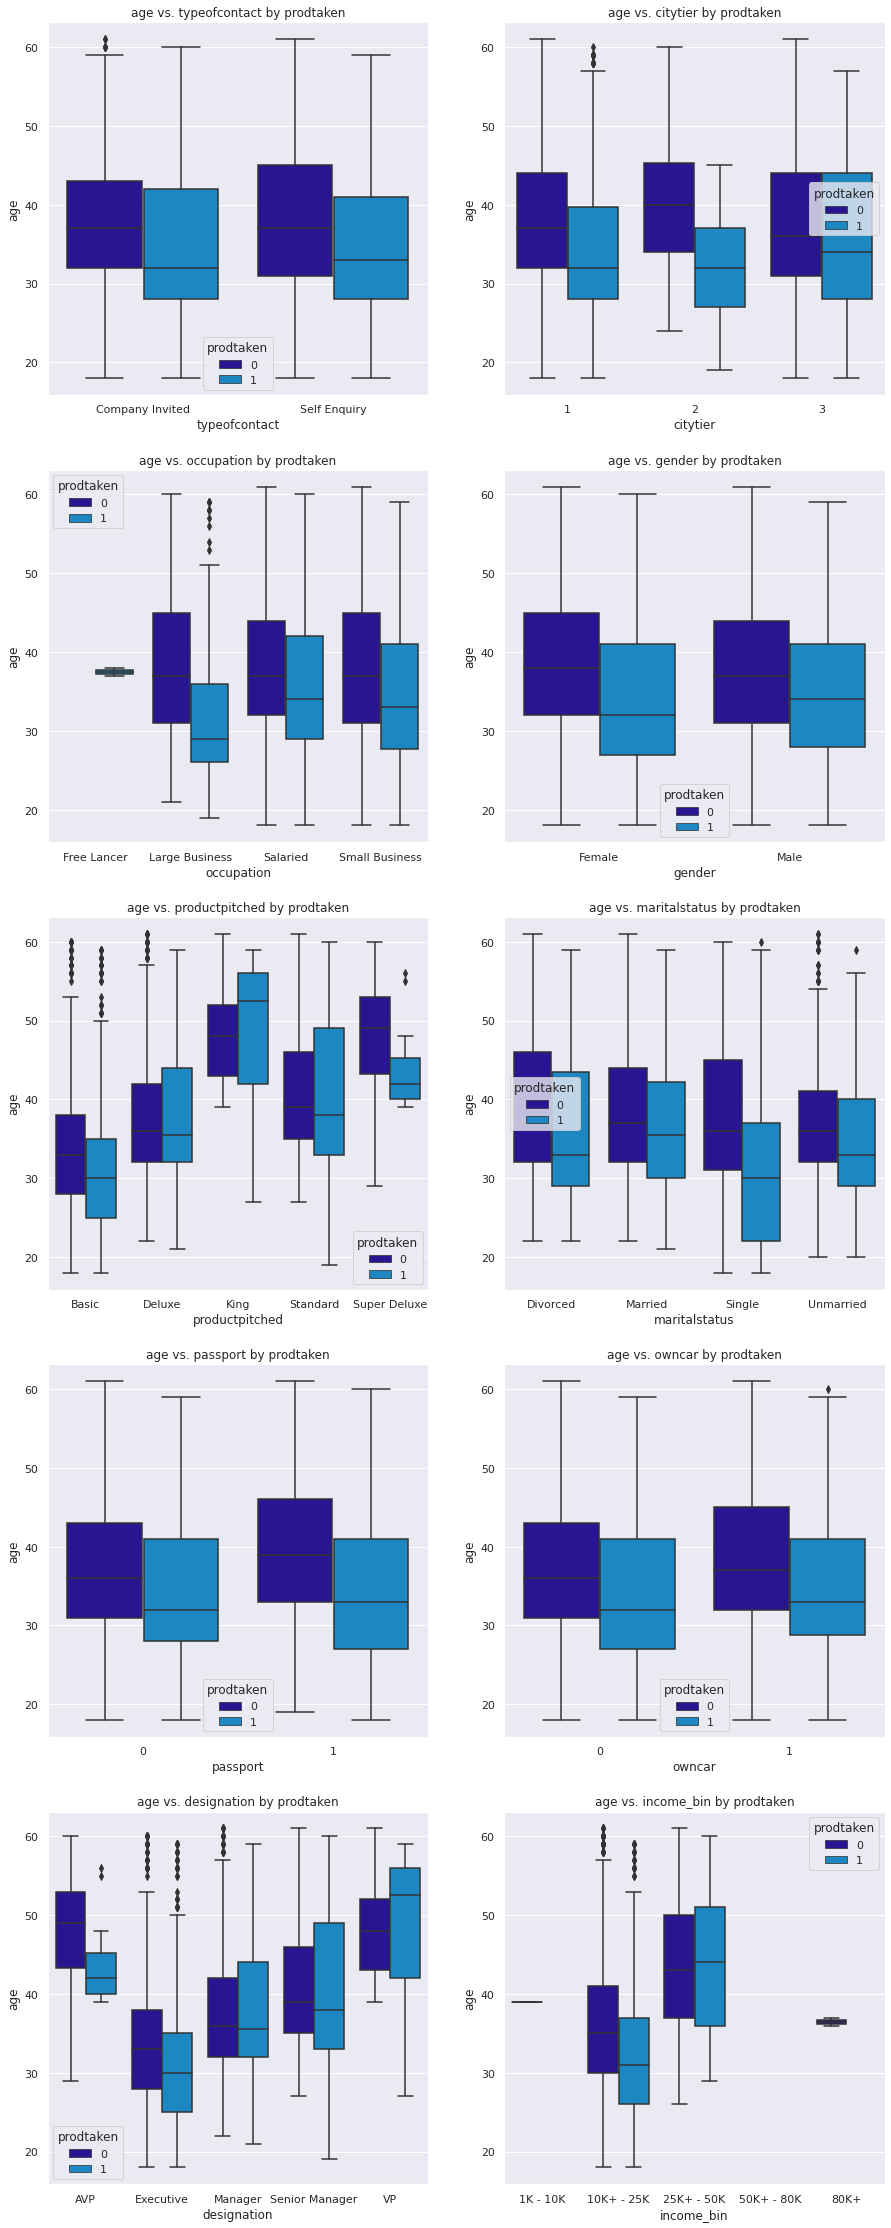

In [67]:
# Categorical variables vs. Age by Product Taken (Including outliers)
category_columns = df_travel.select_dtypes(include='category').columns.tolist()
category_columns.remove('prodtaken')
category_columns.remove('age_bin')

plot_numeric_by_cat(category_columns, 'age', 'prodtaken')

Observasi:<br>
- Secara keseluruhan, `semakin rendah usia pelanggan` maka `semakin besar kecenderungan untuk membeli paket perjalanan` tersebut
- `Pelanggan yang lebih tua` yang ditawarkan `Paket King` memiliki kecenderungan yang lebih tinggi untuk membeli paket perjalanan
- `VP, Manager dan Senior Manager` memiliki kecenderungan yang lebih tinggi untuk membeli paket perjalanan ketika usianya lebih tinggi. Ini karena usia sedikit berkorelasi dengan posisi saat ini
- `Pelanggan yang lebih tua` dengan `kisaran gaji 25K+ hingga 50K` memiliki kecenderungan lebih tinggi untuk membeli paket perjalanan. Ini karena usia sedikit berkorelasi dengan pendapatan

### Categorical variables vs. Number of Followups by Product Taken

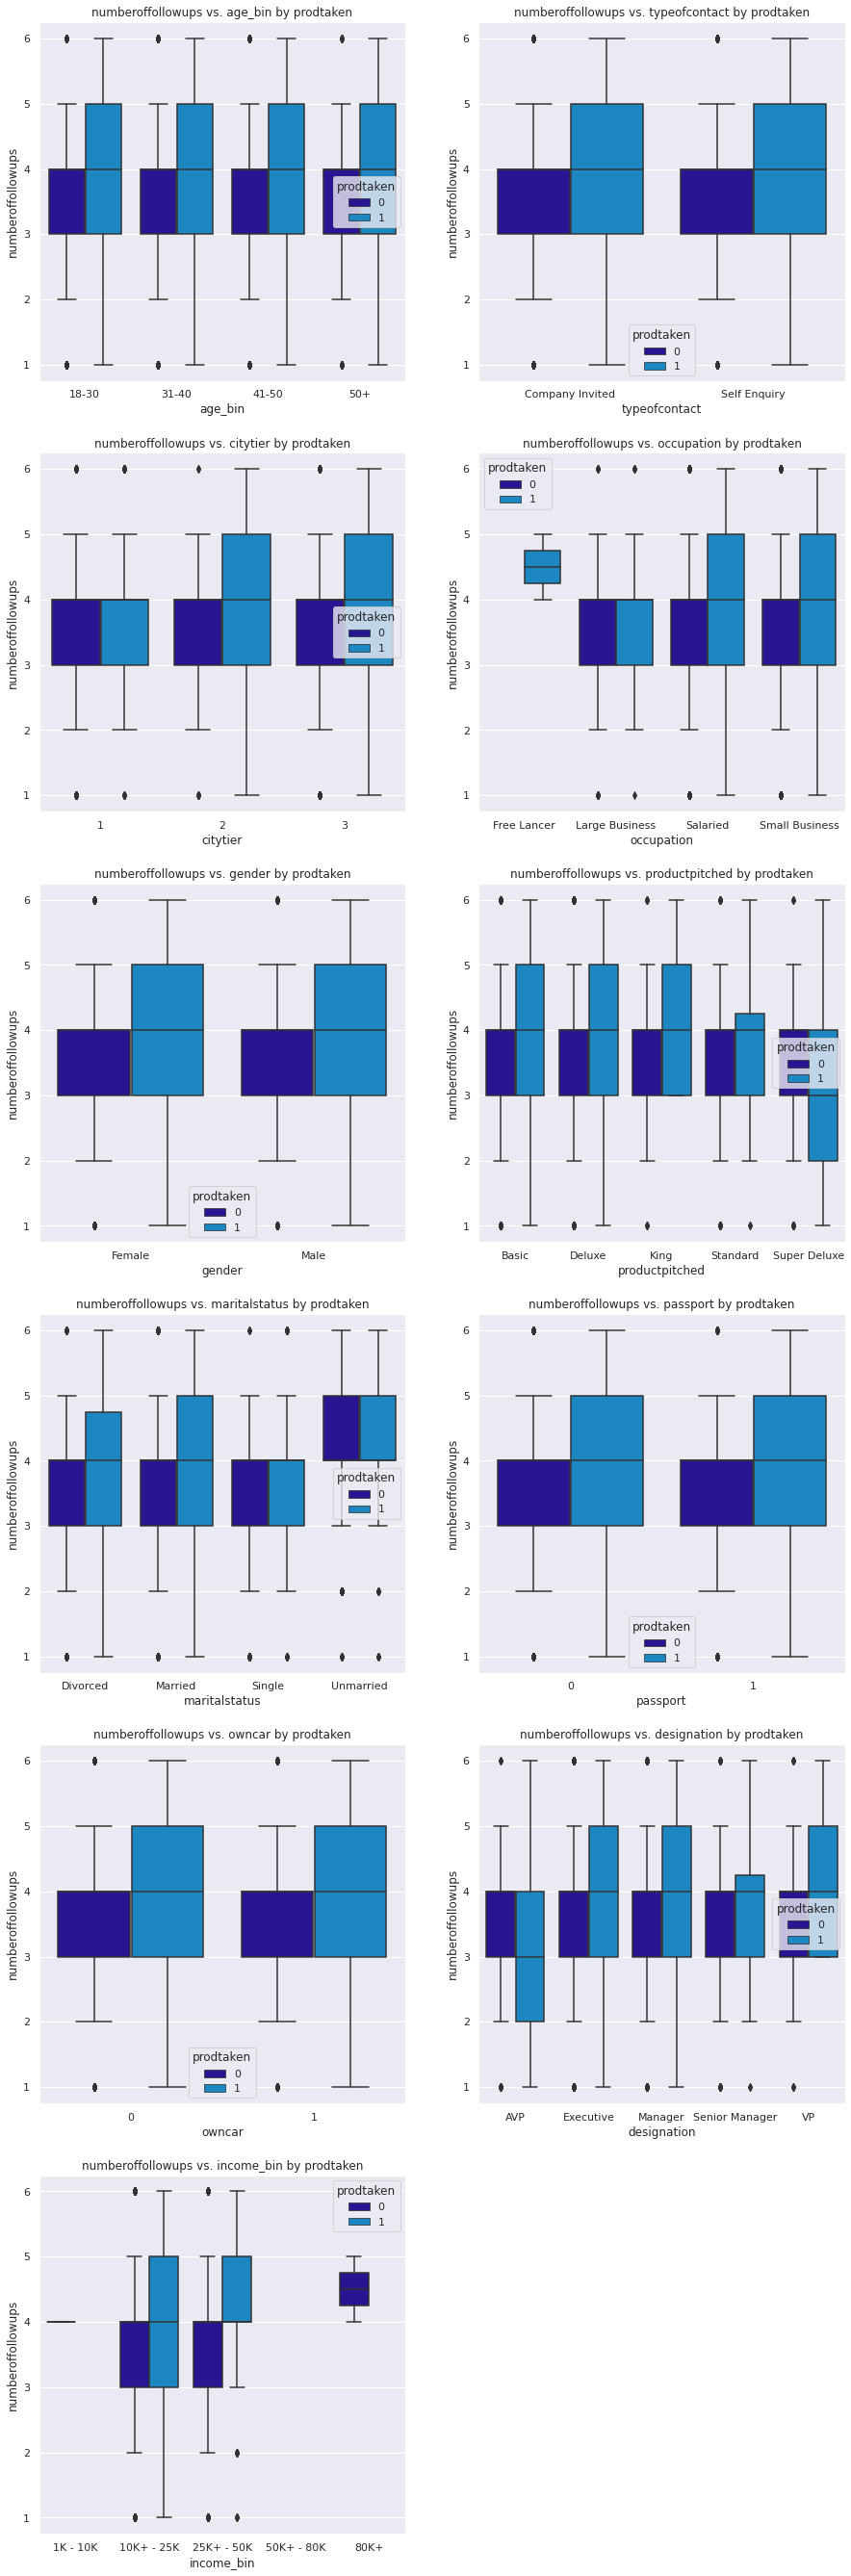

In [68]:
# Categorical variables vs. Number of Followups by Product Taken (Including outliers)
category_columns = df_travel.select_dtypes(include='category').columns.tolist()
category_columns.remove('prodtaken')

plot_numeric_by_cat(category_columns, 'numberoffollowups', 'prodtaken')

Observasi:<br>
- Secara keseluruhan, `semakin tinggi jumlah follow-ups`, maka `semakin besar kecenderungan untuk membeli paket perjalanan`
- Pelanggan di `kota tier 2 dan 3` memiliki kecenderungan lebih tinggi untuk membeli paket perjalanan dimana jumlah follow up lebih tinggi
- Pelanggan yang merupakan `freelancers`, `salaried`, atau menjalankan `bisnis kecil/small business` memiliki kecenderungan lebih tinggi untuk membeli paket perjalanan yang jumlah follow-ups-nya lebih tinggi
- Pelanggan yang ditawarkan `paket Basic, Deluxe dan King` memiliki kecenderungan yang lebih tinggi untuk membeli paket travel dimana jumlah follow-ups lebih tinggi
- Pelanggan dengan posisi `Executive, Manager dan VP` memiliki kecenderungan yang lebih tinggi untuk membeli paket perjalanan dimana jumlah follow-ups-nya lebih tinggi
- Pelanggan dengan kisaran gaji `10K+ hingga 50K `memiliki kecenderungan lebih tinggi untuk membeli paket perjalanan yang jumlah follow-ups-nya lebih tinggi

### Categorical variables vs. Preferred Property Rating by Product Taken

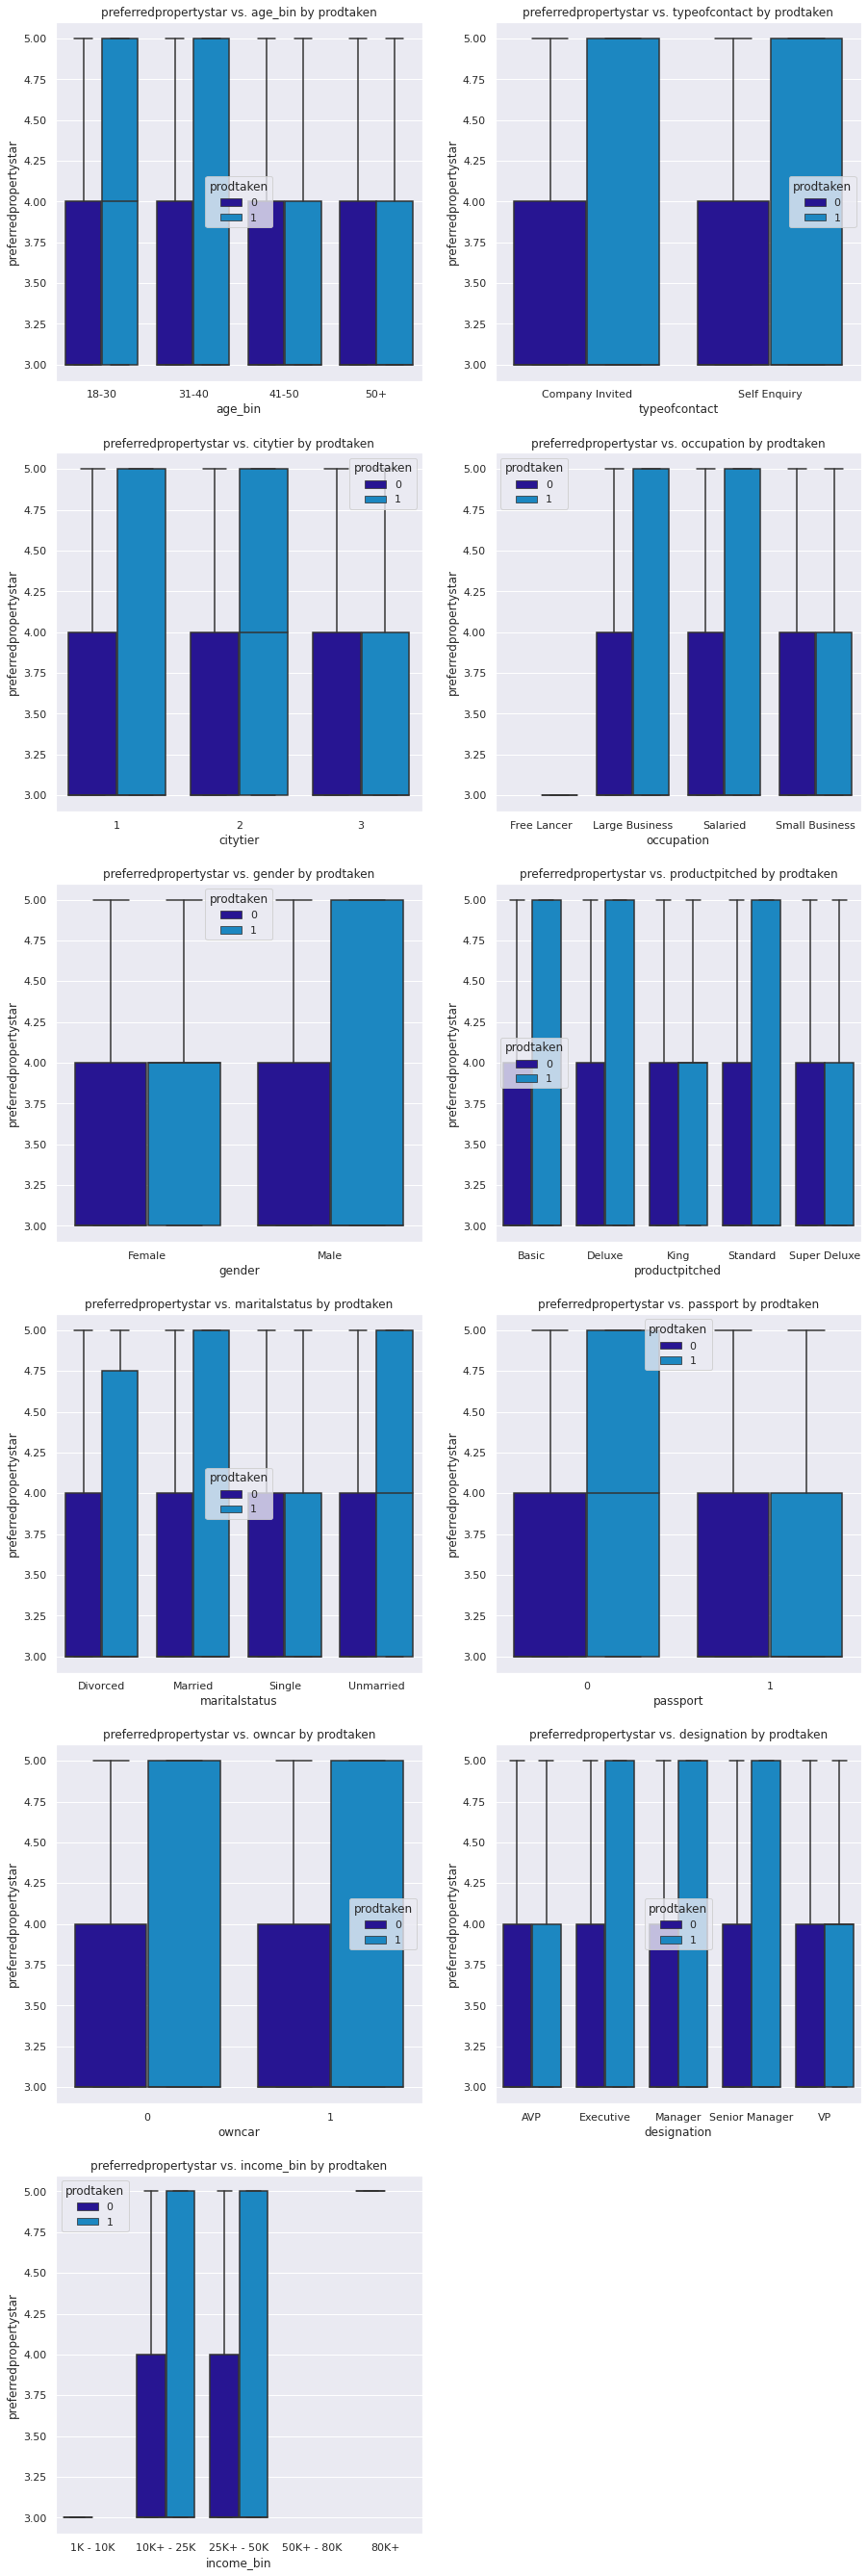

In [69]:
# Categorical variables vs. Preferred Property Rating by Product Taken (Including outliers)
category_columns = df_travel.select_dtypes(include='category').columns.tolist()
category_columns.remove('prodtaken')

plot_numeric_by_cat(category_columns, 'preferredpropertystar', 'prodtaken')

Observasi:<br>
- Secara keseluruhan, `semakin tinggi peringkat properti`, maka `semakin besar kecenderungan untuk membeli produk tersebut`
- Pelanggan di `kota tier 1 dan 2` memiliki kecenderungan yang lebih tinggi untuk membeli paket perjalanan di mana properti berperingkat lebih tinggi
- Pelanggan yang pekerjaannya `salaried` atau `menjalankan bisnis besar/large business` memiliki kecenderungan lebih tinggi untuk membeli paket perjalanan di mana properti berperingkat lebih tinggi
- Pelanggan `Pria` memiliki kecenderungan lebih tinggi untuk membeli paket perjalanan di mana properti berperingkat lebih tinggi
- Pelanggan yang ditawarkan `paket Standard, Deluxe, dan Basic` memiliki kecenderungan yang lebih tinggi untuk membeli paket perjalanan di mana properti tersebut berperingkat lebih tinggi
- Pelanggan `tanpa paspor` memiliki kecenderungan yang lebih tinggi untuk membeli paket perjalanan di mana properti dinilai lebih tinggi
- Pelanggan dengan posisi sebagai `Eksekutif, Manajer dan Manajer Senior` memiliki kecenderungan yang lebih tinggi untuk membeli paket perjalanan di mana properti berperingkat lebih tinggi
- Pelanggan yang `lebih muda (18-40 tahun)` memiliki kecenderungan lebih tinggi untuk membeli paket perjalanan di mana properti berperingkat lebih tinggi
- Pelanggan dengan rentang `gaji 10K+ hingga 50K` memiliki kecenderungan yang lebih tinggi untuk membeli paket perjalanan di mana properti tersebut dinilai lebih tinggi

## Customer Profiling for Purchased Products

In [70]:
# Creating a dataset out of the primary dataset for only the customers who bought travel products

df_cust_prodtaken = df_travel[df_travel['prodtaken'] == 1]

Untuk membuat `Profil Pelanggan` Saya akan melihat `paket/produk yang ditawarkan` dari `setiap kategori` untuk menemukan pola.

### Count per Category for each type of product pitched

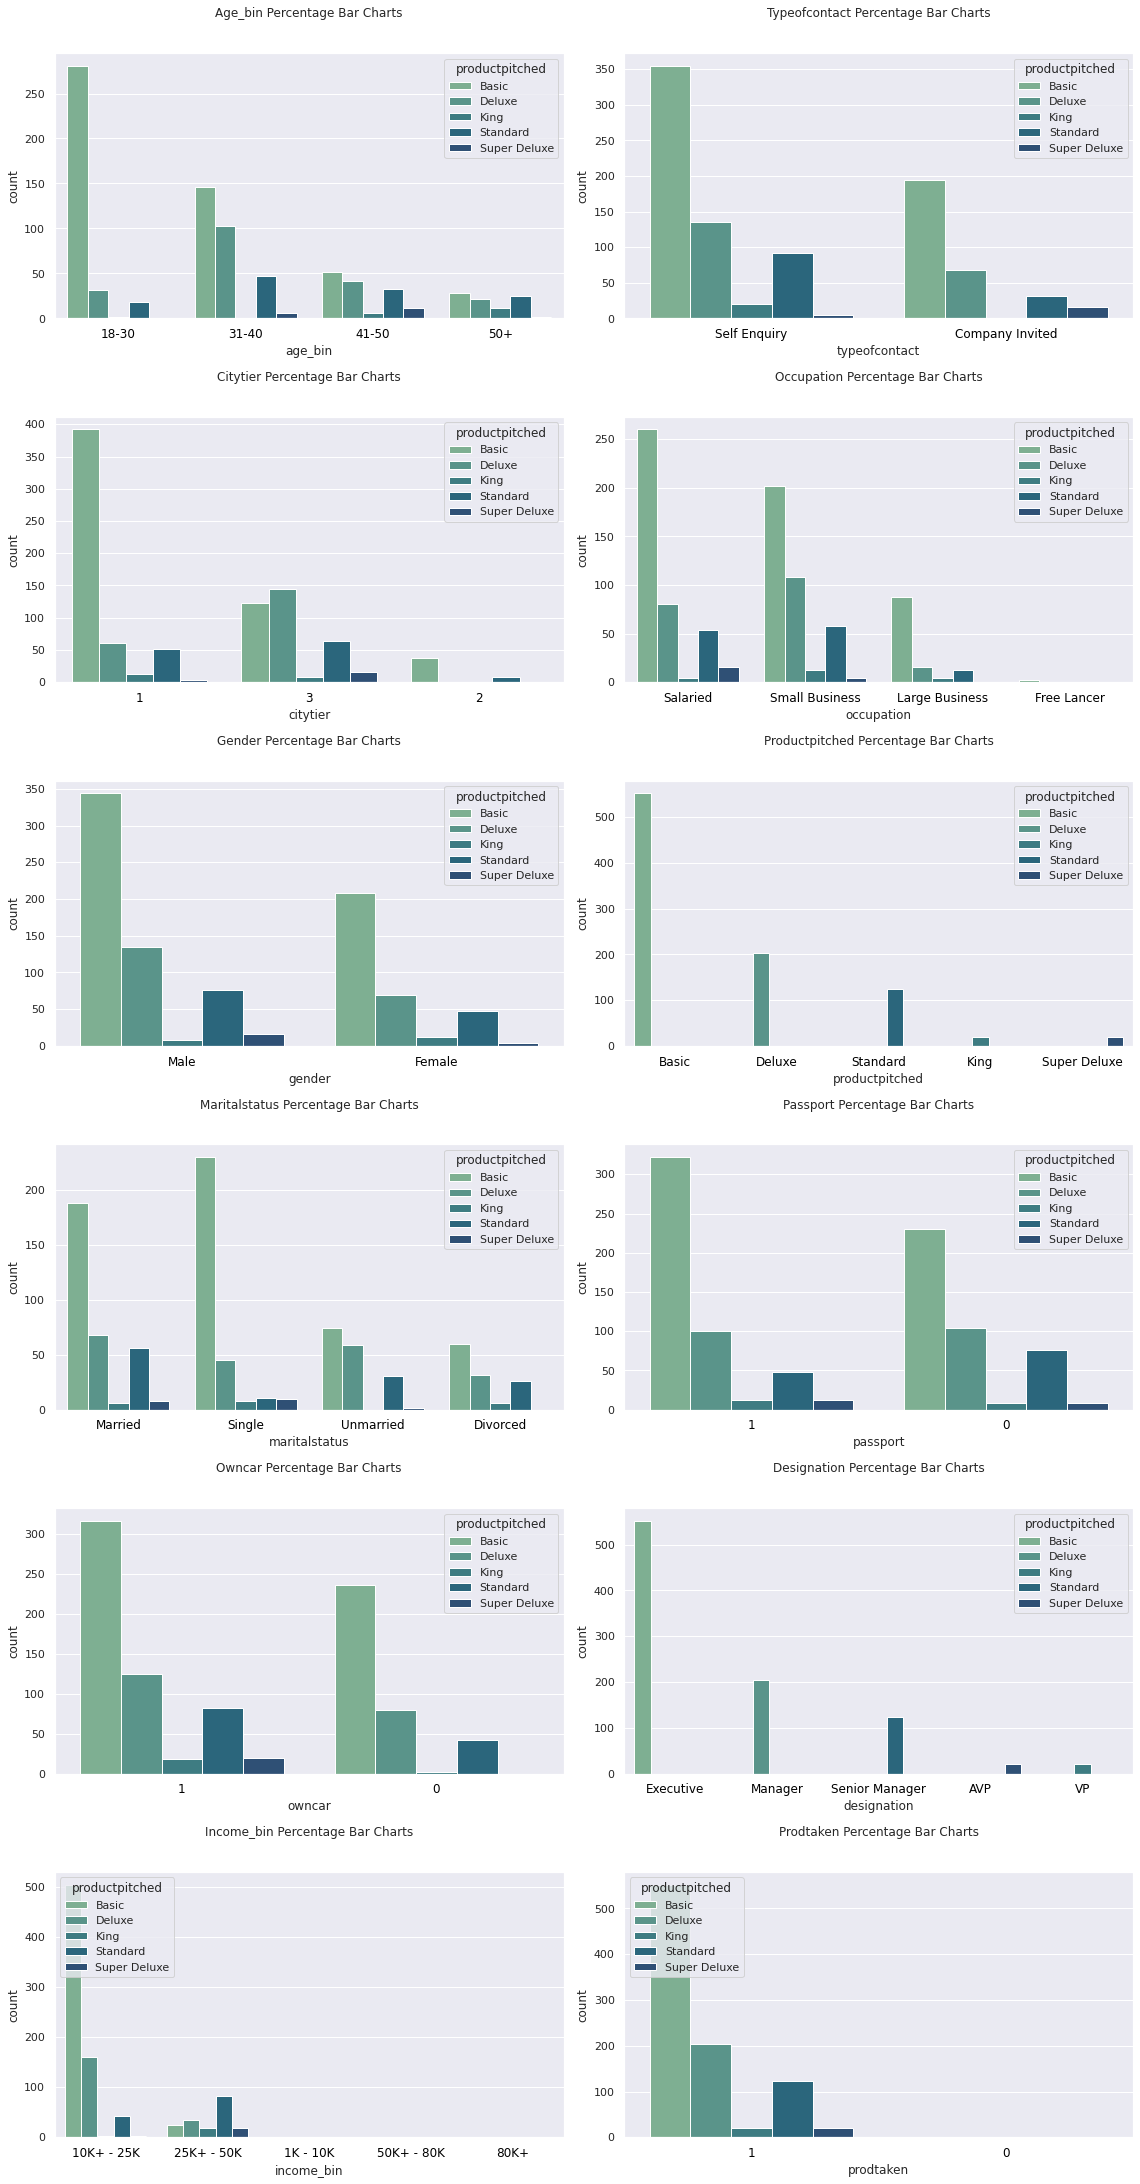

In [71]:
# Count per Category for each type of product pitched
category_columns = df_travel.select_dtypes(include='category').columns.tolist()
target_variable = 'productpitched'
perc_on_bar(df_cust_prodtaken, category_columns, 'prodtaken', hue=target_variable, perc=False)

### Bar plot of Monthly Income for each type of product pitched

Text(0.5, 1.0, 'Monthly Income vs Product Pitched')

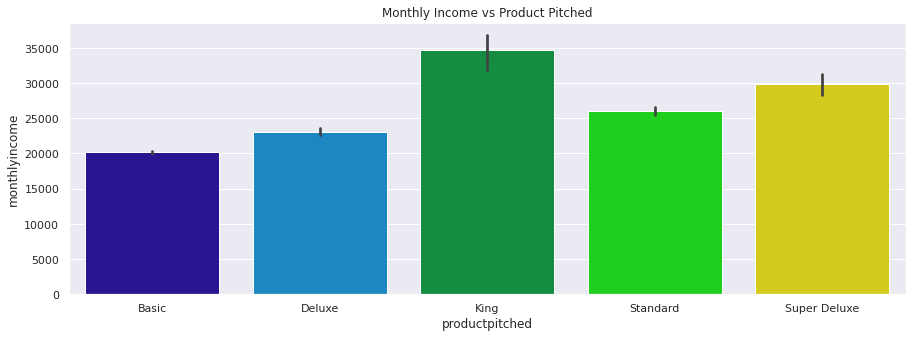

In [72]:
# Bar plot of Monthly Income for each type of product pitched
plt.figure(figsize=(15,5))
sns.barplot(y='monthlyincome',x='productpitched',data=df_cust_prodtaken).set_title('Monthly Income vs Product Pitched')

### Bar plot of Age for each type of product pitched

Text(0.5, 1.0, 'Age vs Product Pitched')

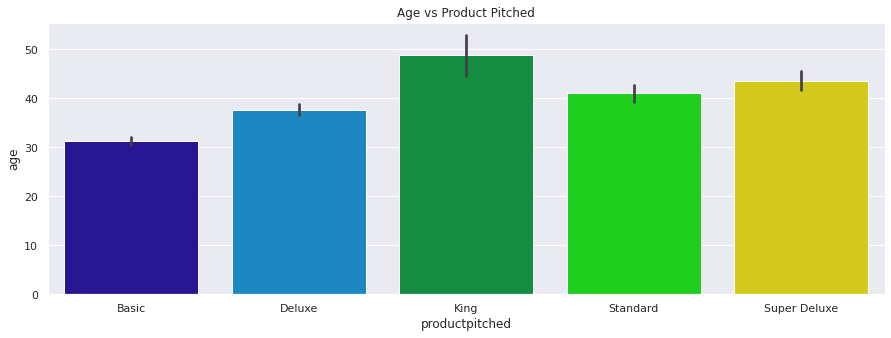

In [73]:
# Bar plot of Age for each type of product pitched
plt.figure(figsize=(15,5))
sns.barplot(y='age',x='productpitched',data=df_cust_prodtaken).set_title('Age vs Product Pitched')

### Monthly Income and Age statistics per product pitched

In [74]:
# Monthly Income and Age statistics per product pitched
df_cust_prodtaken.groupby(['productpitched']).agg({'monthlyincome':{'mean','min','max'},'age':{'mean','min','max'}})

monthlyincome                          age                 
                         max          mean      min   max       mean   min
productpitched                                                            
Basic                37868.0  20161.529301  16009.0  59.0  31.289320  18.0
Deluxe               38525.0  23106.215385  17086.0  59.0  37.641414  21.0
King                 38537.0  34672.100000  17517.0  59.0  48.900000  27.0
Standard             38395.0  26035.419355  17372.0  60.0  41.008130  19.0
Super Deluxe         37502.0  29823.800000  21151.0  56.0  43.500000  39.0

### Overall statistics for `Basic` package & based on EDA

In [75]:
# Overall statistics for Basic package
df_cust_prodtaken[df_cust_prodtaken['productpitched']=='Basic'].describe(include='all').T

count unique           top   freq          mean  \
age                       515.0    NaN           NaN    NaN      31.28932   
age_bin                     507      4         18-30    281           NaN   
typeofcontact               549      2  Self Enquiry    355           NaN   
citytier                  552.0    3.0           1.0  392.0           NaN   
durationofpitch           532.0    NaN           NaN    NaN     15.791353   
occupation                  552      4      Salaried    260           NaN   
gender                      552      2          Male    344           NaN   
numberofpersonvisiting    552.0    NaN           NaN    NaN      2.905797   
numberoffollowups         548.0    NaN           NaN    NaN       3.95073   
productpitched              552      1         Basic    552           NaN   
preferredpropertystar     552.0    NaN           NaN    NaN      3.771739   
maritalstatus               552      4        Single    230           NaN   
numberoftrips             547.0    NaN           NaN    NaN      3.226691   
passport                  552.0    2.0           1.0  322.0           NaN   
pitchsatisfactionscore    552.0    NaN           NaN    NaN      3.213768   
owncar                    552.0    2.0           1.0  316.0           NaN   
numberofchildrenvisiting  551.0    NaN           NaN    NaN      1.221416   
designation                 552      1     Executive    552           NaN   
monthlyincome             529.0    NaN           NaN    NaN  20161.529301   
income_bin                  529      2    10K+ - 25K    504           NaN   
prodtaken                 552.0    1.0           1.0  552.0           NaN   

                                  std      min      25%      50%      75%  \
age                          9.070829     18.0     25.0     30.0     35.0   
age_bin                           NaN      NaN      NaN      NaN      NaN   
typeofcontact                     NaN      NaN      NaN      NaN      NaN   
citytier                          NaN      NaN      NaN      NaN      NaN   
durationofpitch              7.906926      6.0      9.0     14.0     22.0   
occupation                        NaN      NaN      NaN      NaN      NaN   
gender                            NaN      NaN      NaN      NaN      NaN   
numberofpersonvisiting       0.701439      2.0      2.0      3.0      3.0   
numberoffollowups            0.967166      1.0      3.0      4.0      5.0   
productpitched                    NaN      NaN      NaN      NaN      NaN   
preferredpropertystar        0.861812      3.0      3.0      3.0      5.0   
maritalstatus                     NaN      NaN      NaN      NaN      NaN   
numberoftrips                2.081618      1.0      2.0      3.0      4.0   
passport                          NaN      NaN      NaN      NaN      NaN   
pitchsatisfactionscore       1.353074      1.0      2.0      3.0      4.0   
owncar                            NaN      NaN      NaN      NaN      NaN   
numberofchildrenvisiting     0.866537      0.0      1.0      1.0      2.0   
designation                       NaN      NaN      NaN      NaN      NaN   
monthlyincome             3313.289684  16009.0  17546.0  20582.0  21394.0   
income_bin                        NaN      NaN      NaN      NaN      NaN   
prodtaken                         NaN      NaN      NaN      NaN      NaN   

                              max  
age                          59.0  
age_bin                       NaN  
typeofcontact                 NaN  
citytier                      NaN  
durationofpitch              36.0  
occupation                    NaN  
gender                        NaN  
numberofpersonvisiting        4.0  
numberoffollowups             6.0  
productpitched                NaN  
preferredpropertystar         5.0  
maritalstatus                 NaN  
numberoftrips                20.0  
passport                      NaN  
pitchsatisfactionscore        5.0  
owncar                        NaN  
numberofchildrenvisiting

**Observasi CUSTOMER PROFILE**<br>
Trend untuk sebagian besar pelanggan yang membeli `paket Basic`:<br>
- `Age Group`: 25 - 35
- `Contacted by`: Self
- `Gender`: Male
- `City Tier`: 1
- `Occupation`: Salaried
- `Number of Persons Visiting`: 2 - 3
- `Marital Status`: Single
- `Designation`: Executives
- `Monthly Income Mean`: ~20K (<25K)
- `Passport`: Yes
- `Own car`: Yes

### Overall statistics for `Standard` package & based on EDA

In [76]:
# Overall statistics for Standard package
df_cust_prodtaken[df_cust_prodtaken['productpitched']=='Standard'].describe(include='all').T

count unique             top   freq          mean  \
age                       123.0    NaN             NaN    NaN      41.00813   
age_bin                     123      4           31-40     47           NaN   
typeofcontact               124      2    Self Enquiry     92           NaN   
citytier                  124.0    3.0             3.0   64.0           NaN   
durationofpitch           123.0    NaN             NaN    NaN     19.065041   
occupation                  124      3  Small Business     58           NaN   
gender                      124      2            Male     76           NaN   
numberofpersonvisiting    124.0    NaN             NaN    NaN      2.967742   
numberoffollowups         124.0    NaN             NaN    NaN      3.935484   
productpitched              124      1        Standard    124           NaN   
preferredpropertystar     123.0    NaN             NaN    NaN      3.731707   
maritalstatus               124      4         Married     56           NaN   
numberoftrips             123.0    NaN             NaN    NaN       3.01626   
passport                  124.0    2.0             0.0   76.0           NaN   
pitchsatisfactionscore    124.0    NaN             NaN    NaN      3.467742   
owncar                    124.0    2.0             1.0   82.0           NaN   
numberofchildrenvisiting  123.0    NaN             NaN    NaN      1.121951   
designation                 124      1  Senior Manager    124           NaN   
monthlyincome             124.0    NaN             NaN    NaN  26035.419355   
income_bin                  124      2      25K+ - 50K     82           NaN   
prodtaken                 124.0    1.0             1.0  124.0           NaN   

                                  std      min       25%      50%      75%  \
age                          9.876695     19.0      33.0     38.0     49.0   
age_bin                           NaN      NaN       NaN      NaN      NaN   
typeofcontact                     NaN      NaN       NaN      NaN      NaN   
citytier                          NaN      NaN       NaN      NaN      NaN   
durationofpitch              9.048811      6.0      11.0     17.0     29.0   
occupation                        NaN      NaN       NaN      NaN      NaN   
gender                            NaN      NaN       NaN      NaN      NaN   
numberofpersonvisiting       0.709236      2.0       2.0      3.0      3.0   
numberoffollowups            0.908335      1.0       3.0      4.0     4.25   
productpitched                    NaN      NaN       NaN      NaN      NaN   
preferredpropertystar         0.87846      3.0       3.0      3.0      5.0   
maritalstatus                     NaN      NaN       NaN      NaN      NaN   
numberoftrips                1.815163      1.0       2.0      2.0      4.0   
passport                          NaN      NaN       NaN      NaN      NaN   
pitchsatisfactionscore        1.30935      1.0       3.0      3.0      5.0   
owncar                            NaN      NaN       NaN      NaN      NaN   
numberofchildrenvisiting     0.901596      0.0       0.0      1.0      2.0   
designation                       NaN      NaN       NaN      NaN      NaN   
monthlyincome             3593.290353  17372.0  23974.75  25711.0  28628.0   
income_bin                        NaN      NaN       NaN      NaN      NaN   
prodtaken                         NaN      NaN       NaN      NaN      NaN   

                              max  
age                          60.0  
age_bin                       NaN  
typeofcontact                 NaN  
citytier                      NaN  
durationofpitch              36.0  
occupation                    NaN  
gender                        NaN  
numberofpersonvisiting        4.0  
numberoffollowups             6.0  
productpitched                NaN  
preferredpropertystar         5.0  
maritalstatus                 NaN  
numberoftrips                 8.0  
passport                      NaN  
pitchsatisfactionscore        

**Observasi CUSTOMER PROFILE**<br>
Trend untuk sebagian besar pelanggan yang membeli `paket Standard`:<br>
- `Age Group`: 33 - 49
- `Contacted by`: Self
- `Gender`: Male
- `City Tier`: 3
- `Occupation`: Small Business
- `Number of Persons Visiting`: 2 - 3
- `Marital Status`: Married
- `Designation`: Senior Managers
- `Monthly Income Mean`: ~26K (<30K)
- `Passport`: No
- `Own car`: Yes

### Overall statistics for `Deluxe` package & based on EDA

In [77]:
# Overall statistics for Deluxe package
df_cust_prodtaken[df_cust_prodtaken['productpitched']=='Deluxe'].describe(include='all').T

count unique             top   freq          mean  \
age                       198.0    NaN             NaN    NaN     37.641414   
age_bin                     198      4           31-40    103           NaN   
typeofcontact               204      2    Self Enquiry    136           NaN   
citytier                  204.0    2.0             3.0  144.0           NaN   
durationofpitch           180.0    NaN             NaN    NaN          19.1   
occupation                  204      3  Small Business    108           NaN   
gender                      204      2            Male    134           NaN   
numberofpersonvisiting    204.0    NaN             NaN    NaN       2.95098   
numberoffollowups         200.0    NaN             NaN    NaN          3.97   
productpitched              204      1          Deluxe    204           NaN   
preferredpropertystar     203.0    NaN             NaN    NaN      3.699507   
maritalstatus               204      4         Married     68           NaN   
numberoftrips             202.0    NaN             NaN    NaN       3.70297   
passport                  204.0    2.0             0.0  104.0           NaN   
pitchsatisfactionscore    204.0    NaN             NaN    NaN      3.039216   
owncar                    204.0    2.0             1.0  124.0           NaN   
numberofchildrenvisiting  203.0    NaN             NaN    NaN      1.172414   
designation                 204      1         Manager    204           NaN   
monthlyincome             195.0    NaN             NaN    NaN  23106.215385   
income_bin                  195      2      10K+ - 25K    161           NaN   
prodtaken                 204.0    1.0             1.0  204.0           NaN   

                                  std      min      25%      50%      75%  \
age                          8.469575     21.0     32.0     35.5     44.0   
age_bin                           NaN      NaN      NaN      NaN      NaN   
typeofcontact                     NaN      NaN      NaN      NaN      NaN   
citytier                          NaN      NaN      NaN      NaN      NaN   
durationofpitch              9.227176      6.0     11.0     16.0     28.0   
occupation                        NaN      NaN      NaN      NaN      NaN   
gender                            NaN      NaN      NaN      NaN      NaN   
numberofpersonvisiting       0.707141      2.0      2.0      3.0      3.0   
numberoffollowups            1.051011      1.0      3.0      4.0      5.0   
productpitched                    NaN      NaN      NaN      NaN      NaN   
preferredpropertystar        0.857899      3.0      3.0      3.0      5.0   
maritalstatus                     NaN      NaN      NaN      NaN      NaN   
numberoftrips                2.022483      1.0      2.0      3.0      5.0   
passport                          NaN      NaN      NaN      NaN      NaN   
pitchsatisfactionscore        1.27825      1.0      2.0      3.0      4.0   
owncar                            NaN      NaN      NaN      NaN      NaN   
numberofchildrenvisiting     0.841279      0.0      1.0      1.0      2.0   
designation                       NaN      NaN      NaN      NaN      NaN   
monthlyincome             3592.466947  17086.0  20744.0  23186.0  24506.0   
income_bin                        NaN      NaN      NaN      NaN      NaN   
prodtaken                         NaN      NaN      NaN      NaN      NaN   

                              max  
age                          59.0  
age_bin                       NaN  
typeofcontact                 NaN  
citytier                      NaN  
durationofpitch              36.0  
occupation                    NaN  
gender                        NaN  
numberofpersonvisiting        4.0  
numberoffollowups             6.0  
productpitched                NaN  
preferredpropertystar         5.0  
maritalstatus                 NaN  
numberoftrips                 8.0  
passport                      NaN  
pitchsatisfactionscore        5.0  
owncar          

**Observasi CUSTOMER PROFILE**<br>
Trend untuk sebagian besar pelanggan yang membeli `paket Deluxe`:<br>
- `Age Group`: 21 - 44
- `Contacted by`: Self
- `Gender`: Male
- `City Tier`: 3
- `Occupation`: Small Business
- `Number of Persons Visiting`: 2 - 3
- `Marital Status`: Married
- `Designation`: Manager
- `Monthly Income Mean`: ~23K (<25K)
- `Passport`: No
- `Own car`: Yes

### Overall statistics for `Super Deluxe` package & based on EDA

In [78]:
# Overall statistics for Super Deluxe package
df_cust_prodtaken[df_cust_prodtaken['productpitched']=='Super Deluxe'].describe(include='all').T

count unique              top  freq      mean  \
age                       20.0    NaN              NaN   NaN      43.5   
age_bin                     20      3            41-50    12       NaN   
typeofcontact               20      2  Company Invited    16       NaN   
citytier                  20.0    2.0              3.0  16.0       NaN   
durationofpitch           20.0    NaN              NaN   NaN      18.5   
occupation                  20      2         Salaried    16       NaN   
gender                      20      2             Male    16       NaN   
numberofpersonvisiting    20.0    NaN              NaN   NaN       2.7   
numberoffollowups         20.0    NaN              NaN   NaN       3.1   
productpitched              20      1     Super Deluxe    20       NaN   
preferredpropertystar     20.0    NaN              NaN   NaN       3.6   
maritalstatus               20      3           Single    10       NaN   
numberoftrips             19.0    NaN              NaN   NaN  3.263158   
passport                  20.0    2.0              1.0  12.0       NaN   
pitchsatisfactionscore    20.0    NaN              NaN   NaN       3.8   
owncar                    20.0    1.0              1.0  20.0       NaN   
numberofchildrenvisiting  20.0    NaN              NaN   NaN       1.2   
designation                 20      1              AVP    20       NaN   
monthlyincome             20.0    NaN              NaN   NaN   29823.8   
income_bin                  20      2       25K+ - 50K    18       NaN   
prodtaken                 20.0    1.0              1.0  20.0       NaN   

                                  std      min      25%      50%       75%  \
age                           4.83953     39.0     40.0     42.0     45.25   
age_bin                           NaN      NaN      NaN      NaN       NaN   
typeofcontact                     NaN      NaN      NaN      NaN       NaN   
citytier                          NaN      NaN      NaN      NaN       NaN   
durationofpitch              7.330542      8.0     15.0     18.5      20.0   
occupation                        NaN      NaN      NaN      NaN       NaN   
gender                            NaN      NaN      NaN      NaN       NaN   
numberofpersonvisiting       0.656947      2.0      2.0      3.0       3.0   
numberoffollowups            1.618967      1.0      2.0      3.0       4.0   
productpitched                    NaN      NaN      NaN      NaN       NaN   
preferredpropertystar        0.820783      3.0      3.0      3.0       4.0   
maritalstatus                     NaN      NaN      NaN      NaN       NaN   
numberoftrips                2.490919      1.0      1.0      2.0       5.5   
passport                          NaN      NaN      NaN      NaN       NaN   
pitchsatisfactionscore       1.005249      3.0      3.0      3.0       5.0   
owncar                            NaN      NaN      NaN      NaN       NaN   
numberofchildrenvisiting     0.833509      0.0      1.0      1.0       2.0   
designation                       NaN      NaN      NaN      NaN       NaN   
monthlyincome             3520.426404  21151.0  28129.5  29802.5  31997.25   
income_bin                        NaN      NaN      NaN      NaN       NaN   
prodtaken                         NaN      NaN      NaN      NaN       NaN   

                              max  
age                          56.0  
age_bin                       NaN  
typeofcontact                 NaN  
citytier                      NaN  
durationofpitch              31.0  
occupation                    NaN  
gender                        NaN  
numberofpersonvisiting        4.0  
numberoffollowups             6.0  
productpitched                NaN  
preferredpropertystar         5.0  
maritalstatus                 NaN  
numberoftrips                 8.0  
passport                      NaN  
pitchsatisfactionscore        5.0  
owncar                        NaN  
numberofchildrenvisiting      3.0  
designation                   N

**Observasi CUSTOMER PROFILE**<br>
Trend untuk sebagian besar pelanggan yang membeli `paket Super Deluxe`:<br>
- `Age Group`: 39 - 45
- `Contacted by`: Company
- `Gender`: Male
- `City Tier`: 3
- `Occupation`: Salaried
- `Number of Persons Visiting`: 2 - 3
- `Marital Status`: Single
- `Designation`: AVP
- `Monthly Income Mean`: ~30K (<30K)
- `Passport`: Yes
- `Own car`: Yes

### Overall statistics for `King` package & based on EDA

In [79]:
# Overall statistics for King package
df_cust_prodtaken[df_cust_prodtaken['productpitched']=='King'].describe(include='all').T

count unique             top  freq      mean  \
age                       20.0    NaN             NaN   NaN      48.9   
age_bin                     20      3             50+    12       NaN   
typeofcontact               20      1    Self Enquiry    20       NaN   
citytier                  20.0    2.0             1.0  12.0       NaN   
durationofpitch           20.0    NaN             NaN   NaN      10.5   
occupation                  20      3  Small Business    12       NaN   
gender                      20      2          Female    12       NaN   
numberofpersonvisiting    20.0    NaN             NaN   NaN       2.9   
numberoffollowups         20.0    NaN             NaN   NaN       4.3   
productpitched              20      1            King    20       NaN   
preferredpropertystar     16.0    NaN             NaN   NaN      3.75   
maritalstatus               20      3          Single     8       NaN   
numberoftrips             17.0    NaN             NaN   NaN  3.411765   
passport                  20.0    2.0             1.0  12.0       NaN   
pitchsatisfactionscore    20.0    NaN             NaN   NaN       3.3   
owncar                    20.0    2.0             1.0  18.0       NaN   
numberofchildrenvisiting  16.0    NaN             NaN   NaN    1.4375   
designation                 20      1              VP    20       NaN   
monthlyincome             20.0    NaN             NaN   NaN   34672.1   
income_bin                  20      2      25K+ - 50K    18       NaN   
prodtaken                 20.0    1.0             1.0  20.0       NaN   

                                  std      min       25%      50%      75%  \
age                          9.618513     27.0      42.0     52.5     56.0   
age_bin                           NaN      NaN       NaN      NaN      NaN   
typeofcontact                     NaN      NaN       NaN      NaN      NaN   
citytier                          NaN      NaN       NaN      NaN      NaN   
durationofpitch              4.135851      8.0       8.0      9.0      9.0   
occupation                        NaN      NaN       NaN      NaN      NaN   
gender                            NaN      NaN       NaN      NaN      NaN   
numberofpersonvisiting       0.718185      2.0       2.0      3.0      3.0   
numberoffollowups            1.128576      3.0       3.0      4.0      5.0   
productpitched                    NaN      NaN       NaN      NaN      NaN   
preferredpropertystar         0.68313      3.0       3.0      4.0      4.0   
maritalstatus                     NaN      NaN       NaN      NaN      NaN   
numberoftrips                1.938389      1.0       2.0      3.0      4.0   
passport                          NaN      NaN       NaN      NaN      NaN   
pitchsatisfactionscore       1.218282      1.0       3.0      3.0      4.0   
owncar                            NaN      NaN       NaN      NaN      NaN   
numberofchildrenvisiting     0.892095      0.0       1.0      1.0      2.0   
designation                       NaN      NaN       NaN      NaN      NaN   
monthlyincome             5577.603833  17517.0  34470.25  34859.0  38223.0   
income_bin                        NaN      NaN       NaN      NaN      NaN   
prodtaken                         NaN      NaN       NaN      NaN      NaN   

                              max  
age                          59.0  
age_bin                       NaN  
typeofcontact                 NaN  
citytier                      NaN  
durationofpitch              19.0  
occupation                    NaN  
gender                        NaN  
numberofpersonvisiting        4.0  
numberoffollowups             6.0  
productpitched                NaN  
preferredpropertystar         5.0  
maritalstatus                 NaN  
numberoftrips                 7.0  
passport                      NaN  
pitchsatisfactionscore        5.0  
owncar                        NaN  
numberofchildrenvisiting      3.0  
designation                   NaN  
monthlyincome    

**Observasi CUSTOMER PROFILE**<br>
Trend untuk sebagian besar pelanggan yang membeli `paket King`:<br>
- `Age Group`: 42 - 56
- `Contacted by`: Self
- `Gender`: Female
- `City Tier`: 1
- `Occupation`: Small business
- `Number of Persons Visiting`: 2 - 3
- `Marital Status`: Single
- `Designation`: VP
- `Monthly Income Mean`: ~35K (<35K)
- `Passport`: Yes
- `Own car`: Yes

## Observations on Patterns

- Pelanggan dari `usia 18 - 30` membeli paket perjalanan, yang diikuti oleh pelanggan yang berusia `31 - 40 tahun`.
- Pelanggan yang memiliki `Monthly Income` sekitar `15K - 25K` membeli paket perjalanan, diikuti pelanggan dengan kisaran pendapatan `25K - 50K`.
- Sebagian besar pelanggan dengan kunjungan  sekitar `2 - 4` yang membeli beberapa paket perjalanan.
- Sebagian besar pelanggan yang membeli paket perjalanan adalah pelanggan dengan posisi `Executive` dan `Senior Manager`.
- Pelanggan yang ditindaklanjuti `6 kali` yang membeli paket perjalanan.
- `Pelanggan yang diundang perusahaan` itu sebagian besar membeli paket dan memilih `properti berperingkat 5` dan sebagian besar berasal dari `tingkat kota 2,3`.
- Pelanggan sebagian besar mengambil `basic package`, diikuti `standard`. Asumsinya disini karena biaya yang terlibat.
- Sebagian besar Pelanggan yang `memiliki paspor` membeli paket perjalanan.
- `FreeLancers` dan `Large Business` memiliki peluang lebih tinggi untuk membeli paket perjalanan. Namun, karena hanya ada 2 titik data untuk freelancer, hal ini dapat menimbulkan bias.
- Pelanggan yang `Single` dan `belum menikah(unmarried)` memiliki peluang lebih tinggi untuk membeli paket perjalanan.
- Pelanggan yang melakukan `7 - 8 perjalanan` memiliki peluang lebih tinggi untuk membeli paket perjalanan.
- Untuk variabel `'Gender', 'numberofchildrenvisiting', 'owncar'` sepertinya tidak mempunyaia hubungan yang signifikan terhadap keputusan pelanggan membeli paket perjalanan.
- Produk terjual saat `ditindaklanjuti berkali-kali`, dengan `durasi promosi produk yang lebih tinggi`, dan saat `Paket Basic` ditawarkan.

## Columns to be dropped

- Karena pelanggan baru akan dianalisis terlebih dahulu melalui model dan kemudian dihubungi, maka sebaiknya data interaksi pelanggan tidak akan tersedia. Kolom/fitur tersebut adalah: `'durationofpitch', 'numberoffollowups', 'productpitched', 'pitchsatisfactionscore'`.
- `typeofcontact` juga dapat dihapus karena semua pelanggan baru akan dihubungi oleh perusahaan.
- `income_bin` dan `age_bin` akan dihapus juga karena ini digunakan untuk membantu proses EDA saja.

# v. Feature Engineering

>Bagian ini berisi proses penyiapan data untuk proses pelatihan model.

Feature Engineering yang dilakukan adalah:

1. Mengambil data untuk model inference
2. Memisahkan antara X (Features) and y (Target)
3. Memisahkan antara Train-Set dan Test-Set
4. Feature Selection analysis
5. Melakukan Dropping kolom yang tidak digunakan untuk membuat model
6. Mendeteksi dan Handling data Outlier
7. Memisahkan antara kolom Numerikal dan kolom Kategorikal
8. Handling Missing Values
9. Feature Scaling
10. Feature Encoding
11. Melakukan `bundle preprocessing` untuk data numerikal dan kategorikal menggunakan `ColumnTransformer`

## Mengambil data untuk Model Inference

In [80]:
# First building a copy dataset so that if required we can re-visit and re-execute some parts of the EDA 
# without running the whole notebook 

df_tour = df_travel.copy()

In [81]:
# Retrieving sample data for Model Inference

df_inf = df_tour.sample(10, random_state=178234)
df_inf

age age_bin    typeofcontact citytier  durationofpitch      occupation  \
2119  53.0     50+     Self Enquiry        1             29.0        Salaried   
4198  27.0   18-30  Company Invited        1             18.0  Small Business   
740    NaN     NaN     Self Enquiry        1             16.0        Salaried   
4815  49.0   41-50  Company Invited        3             31.0        Salaried   
3862  39.0   31-40  Company Invited        1             13.0        Salaried   
3080  36.0   31-40  Company Invited        1             32.0        Salaried   
928   44.0   41-50     Self Enquiry        1             21.0  Small Business   
4038  32.0   31-40     Self Enquiry        3             13.0        Salaried   
2034  45.0   41-50     Self Enquiry        3              8.0  Large Business   
4816  28.0   18-30     Self Enquiry        3              9.0  Small Business   

      gender  numberofpersonvisiting  numberoffollowups productpitched  ...  \
2119  Female                       3                3.0   Super Deluxe  ...   
4198    Male                       3                4.0         Deluxe  ...   
740     Male                       2                3.0          Basic  ...   
4815    Male                       4                6.0          Basic  ...   
3862    Male                       4                5.0         Deluxe  ...   
3080  Female                       4                4.0          Basic  ...   
928   Female                       3                3.0       Standard  ...   
4038    Male                       4                6.0         Deluxe  ...   
2034    Male                       2                5.0         Deluxe  ...   
4816  Female                       4                6.0           King  ...   

      maritalstatus numberoftrips  passport pitchsatisfactionscore  owncar  \
2119         Single           7.0         0                      5       1   
4198        Married           3.0         1                      3       1   
740         Married           2.0         0                      5       1   
4815         Single           3.0         1                      1       1   
3862        Married           4.0         0                      4       1   
3080        Married           3.0         1                      3       0   
928        Divorced           2.0         0                      3       0   
4038        Married           6.0         1                      3       0   
2034      Unmarried           1.0         0                      5       1   
4816         Single           4.0         1                      5       1   

     numberofchildrenvisiting     designation monthlyincome  income_bin  \
2119                      1.0             AVP       29275.0  25K+ - 50K   
4198                      1.0         Manager       23419.0  10K+ - 25K   
740                       0.0       Executive           NaN         NaN   
4815                      3.0       Executive       21237.0  10K+ - 25K   
3862                      2.0         Manager       23999.0  10K+ - 25K   
3080                      1.0       Executive       20700.0  10K+ - 25K   
928                       1.0  Senior Manager       22978.0  10K+ - 25K   
4038                      3.0         Manager       24850.0  10K+ - 25K   
2034                      1.0         Manager       21632.0  10K+ - 25K   
4816                      2.0              VP       21195.0  10K+ - 25K   

     prodtaken  
2119         0  
4198         0  
740          0  
4815         1  
3862         0  
3080         1  
928          1  
4038         1  
2034         0  
4816         1  

[10 rows x 21 columns]

In [82]:
# Drop the Inference-Set data in the dataset

df_train_test = df_tour.drop(df_inf.index)
df_train_test

age age_bin    typeofcontact citytier  durationofpitch      occupation  \
0     41.0   41-50     Self Enquiry        3              6.0        Salaried   
1     49.0   41-50  Company Invited        1             14.0        Salaried   
2     37.0   31-40     Self Enquiry        1              8.0     Free Lancer   
3     33.0   31-40  Company Invited        1              9.0        Salaried   
4      NaN     NaN     Self Enquiry        1              8.0  Small Business   
...    ...     ...              ...      ...              ...             ...   
4883  49.0   41-50     Self Enquiry        3              9.0  Small Business   
4884  28.0   18-30  Company Invited        1             31.0        Salaried   
4885  52.0     50+     Self Enquiry        3             17.0        Salaried   
4886  19.0   18-30     Self Enquiry        3             16.0  Small Business   
4887  36.0   31-40     Self Enquiry        1             14.0        Salaried   

      gender  numberofpersonvisiting  numberoffollowups productpitched  ...  \
0     Female                       3                3.0         Deluxe  ...   
1       Male                       3                4.0         Deluxe  ...   
2       Male                       3                4.0          Basic  ...   
3     Female                       2                3.0          Basic  ...   
4       Male                       2                3.0          Basic  ...   
...      ...                     ...                ...            ...  ...   
4883    Male                       3                5.0         Deluxe  ...   
4884    Male                       4                5.0          Basic  ...   
4885  Female                       4                4.0       Standard  ...   
4886    Male                       3                4.0          Basic  ...   
4887    Male                       4                4.0          Basic  ...   

      maritalstatus numberoftrips  passport pitchsatisfactionscore  owncar  \
0            Single           1.0         1                      2       1   
1          Divorced           2.0         0                      3       1   
2            Single           7.0         1                      3       0   
3          Divorced           2.0         1                      5       1   
4          Divorced           1.0         0                      5       1   
...             ...           ...       ...                    ...     ...   
4883      Unmarried           2.0         1                      1       1   
4884         Single           3.0         1                      3       1   
4885        Married           7.0         0                      1       1   
4886         Single           3.0         0                      5       0   
4887      Unmarried           3.0         1                      3       1   

     numberofchildrenvisiting     designation monthlyincome  income_bin  \
0                         0.0         Manager       20993.0  10K+ - 25K   
1                         2.0         Manager       20130.0  10K+ - 25K   
2                         0.0       Executive       17090.0  10K+ - 25K   
3                         1.0       Executive       17909.0  10K+ - 25K   
4                         0.0       Executive       18468.0  10K+ - 25K   
...                       ...             ...           ...         ...   
4883                      1.0         Manager       26576.0  25K+ - 50K   
4884                      2.0       Executive       21212.0  10K+ - 25K   
4885                      3.0  Senior Manager       31820.0  25K+ - 50K   
4886                      2.0       Executive       20289.0  10K+ - 25K   
4887                      2.0       Executive       24041.0  10K+ - 25K   

     prodtaken  
0            1  
1            0  
2            1  
3            0  
4            0  
...        ...  
4883         1  
4884         1  
4885         1  
4886         1  
4887         1  

[4878 rows x 21 columns]

In [83]:
# Reset index to minimize errors

df_train_test.reset_index(drop = True, inplace = True)
df_inf.reset_index(drop = True, inplace = True)
df_inf

age age_bin    typeofcontact citytier  durationofpitch      occupation  \
0  53.0     50+     Self Enquiry        1             29.0        Salaried   
1  27.0   18-30  Company Invited        1             18.0  Small Business   
2   NaN     NaN     Self Enquiry        1             16.0        Salaried   
3  49.0   41-50  Company Invited        3             31.0        Salaried   
4  39.0   31-40  Company Invited        1             13.0        Salaried   
5  36.0   31-40  Company Invited        1             32.0        Salaried   
6  44.0   41-50     Self Enquiry        1             21.0  Small Business   
7  32.0   31-40     Self Enquiry        3             13.0        Salaried   
8  45.0   41-50     Self Enquiry        3              8.0  Large Business   
9  28.0   18-30     Self Enquiry        3              9.0  Small Business   

   gender  numberofpersonvisiting  numberoffollowups productpitched  ...  \
0  Female                       3                3.0   Super Deluxe  ...   
1    Male                       3                4.0         Deluxe  ...   
2    Male                       2                3.0          Basic  ...   
3    Male                       4                6.0          Basic  ...   
4    Male                       4                5.0         Deluxe  ...   
5  Female                       4                4.0          Basic  ...   
6  Female                       3                3.0       Standard  ...   
7    Male                       4                6.0         Deluxe  ...   
8    Male                       2                5.0         Deluxe  ...   
9  Female                       4                6.0           King  ...   

   maritalstatus numberoftrips  passport pitchsatisfactionscore  owncar  \
0         Single           7.0         0                      5       1   
1        Married           3.0         1                      3       1   
2        Married           2.0         0                      5       1   
3         Single           3.0         1                      1       1   
4        Married           4.0         0                      4       1   
5        Married           3.0         1                      3       0   
6       Divorced           2.0         0                      3       0   
7        Married           6.0         1                      3       0   
8      Unmarried           1.0         0                      5       1   
9         Single           4.0         1                      5       1   

  numberofchildrenvisiting     designation monthlyincome  income_bin prodtaken  
0                      1.0             AVP       29275.0  25K+ - 50K         0  
1                      1.0         Manager       23419.0  10K+ - 25K         0  
2                      0.0       Executive           NaN         NaN         0  
3                      3.0       Executive       21237.0  10K+ - 25K         1  
4                      2.0         Manager       23999.0  10K+ - 25K         0  
5                      1.0       Executive       20700.0  10K+ - 25K         1  
6                      1.0  Senior Manager       22978.0  10K+ - 25K         1  
7                      3.0         Manager       24850.0  10K+ - 25K         1  
8                      1.0         Manager       21632.0  10K+ - 25K         0  
9                      2.0              VP       21195.0  10K+ - 25K         1  

[10 rows x 21 columns]

Dari dataframe di atas tampaknya kolom bertambah karena hasil binning yang sebelumnya dilakukan pada proses EDA. Karena kolom-kolom itu hanya digunakan untuk membantu proses EDA dan tidak digunakan dalam model, maka setelah ini Saya akan drop kolom-kolom tersebut.

In [84]:
# create a new variable containing columns to drop
drop_col = df_inf[['age_bin', 'income_bin']]   

# drop columns in df_inf and df_train_test which are in `drop_col`
df_inf.drop(drop_col, axis=1, inplace=True)
df_train_test.drop(drop_col, axis=1, inplace=True)
df_inf

age    typeofcontact citytier  durationofpitch      occupation  gender  \
0  53.0     Self Enquiry        1             29.0        Salaried  Female   
1  27.0  Company Invited        1             18.0  Small Business    Male   
2   NaN     Self Enquiry        1             16.0        Salaried    Male   
3  49.0  Company Invited        3             31.0        Salaried    Male   
4  39.0  Company Invited        1             13.0        Salaried    Male   
5  36.0  Company Invited        1             32.0        Salaried  Female   
6  44.0     Self Enquiry        1             21.0  Small Business  Female   
7  32.0     Self Enquiry        3             13.0        Salaried    Male   
8  45.0     Self Enquiry        3              8.0  Large Business    Male   
9  28.0     Self Enquiry        3              9.0  Small Business  Female   

   numberofpersonvisiting  numberoffollowups productpitched  \
0                       3                3.0   Super Deluxe   
1                       3                4.0         Deluxe   
2                       2                3.0          Basic   
3                       4                6.0          Basic   
4                       4                5.0         Deluxe   
5                       4                4.0          Basic   
6                       3                3.0       Standard   
7                       4                6.0         Deluxe   
8                       2                5.0         Deluxe   
9                       4                6.0           King   

   preferredpropertystar maritalstatus  numberoftrips passport  \
0                    3.0        Single            7.0        0   
1                    5.0       Married            3.0        1   
2                    3.0       Married            2.0        0   
3                    3.0        Single            3.0        1   
4                    3.0       Married            4.0        0   
5                    4.0       Married            3.0        1   
6                    3.0      Divorced            2.0        0   
7                    3.0       Married            6.0        1   
8                    3.0     Unmarried            1.0        0   
9                    4.0        Single            4.0        1   

   pitchsatisfactionscore owncar  numberofchildrenvisiting     designation  \
0                       5      1                       1.0             AVP   
1                       3      1                       1.0         Manager   
2                       5      1                       0.0       Executive   
3                       1      1                       3.0       Executive   
4                       4      1                       2.0         Manager   
5                       3      0                       1.0       Executive   
6                       3      0                       1.0  Senior Manager   
7                       3      0                       3.0         Manager   
8                       5      1                       1.0         Manager   
9                       5      1                       2.0              VP   

   monthlyincome prodtaken  
0        29275.0         0  
1        23419.0         0  
2            NaN         0  
3        21237.0         1  
4        23999.0         0  
5        20700.0         1  
6        22978.0         1  
7        24850.0         1  
8        21632.0         0  
9        21195.0         1

Setelah ini, Saya akan export data inference ke dalam format csv untuk dilakukan prediksi `prodtaken` kedepannya di notebook yang berbeda.

In [85]:
# Export data inference to csv
df_inf_csv = df_inf.to_csv('/content/drive/MyDrive/RMT - 018/MILESTONE 2 PHASE 1.csv', index=False)
df_inf_csv

## Memisahkan antara `X` (Features) dan `y` (Target)

In [86]:
# Splitting between `X` and `y`

X = df_train_test.drop(['prodtaken'], axis=1)
y = df_train_test['prodtaken']
X

age    typeofcontact citytier  durationofpitch      occupation  gender  \
0     41.0     Self Enquiry        3              6.0        Salaried  Female   
1     49.0  Company Invited        1             14.0        Salaried    Male   
2     37.0     Self Enquiry        1              8.0     Free Lancer    Male   
3     33.0  Company Invited        1              9.0        Salaried  Female   
4      NaN     Self Enquiry        1              8.0  Small Business    Male   
...    ...              ...      ...              ...             ...     ...   
4873  49.0     Self Enquiry        3              9.0  Small Business    Male   
4874  28.0  Company Invited        1             31.0        Salaried    Male   
4875  52.0     Self Enquiry        3             17.0        Salaried  Female   
4876  19.0     Self Enquiry        3             16.0  Small Business    Male   
4877  36.0     Self Enquiry        1             14.0        Salaried    Male   

      numberofpersonvisiting  numberoffollowups productpitched  \
0                          3                3.0         Deluxe   
1                          3                4.0         Deluxe   
2                          3                4.0          Basic   
3                          2                3.0          Basic   
4                          2                3.0          Basic   
...                      ...                ...            ...   
4873                       3                5.0         Deluxe   
4874                       4                5.0          Basic   
4875                       4                4.0       Standard   
4876                       3                4.0          Basic   
4877                       4                4.0          Basic   

      preferredpropertystar maritalstatus  numberoftrips passport  \
0                       3.0        Single            1.0        1   
1                       4.0      Divorced            2.0        0   
2                       3.0        Single            7.0        1   
3                       3.0      Divorced            2.0        1   
4                       4.0      Divorced            1.0        0   
...                     ...           ...            ...      ...   
4873                    4.0     Unmarried            2.0        1   
4874                    3.0        Single            3.0        1   
4875                    4.0       Married            7.0        0   
4876                    3.0        Single            3.0        0   
4877                    4.0     Unmarried            3.0        1   

      pitchsatisfactionscore owncar  numberofchildrenvisiting     designation  \
0                          2      1                       0.0         Manager   
1                          3      1                       2.0         Manager   
2                          3      0                       0.0       Executive   
3                          5      1                       1.0       Executive   
4                          5      1                       0.0       Executive   
...                      ...    ...                       ...             ...   
4873                       1      1                       1.0         Manager   
4874                       3      1                       2.0       Executive   
4875                       1      1                       3.0  Senior Manager   
4876                       5      0                       2.0       Executive   
4877                       3      1                       2.0       Executive   

      monthlyincome  
0           20993.0  
1           20130.0  
2           17090.0  
3           17909.0  
4           18468.0  
...             ...  
4873        26576.0  
4874        21212.0  
4875        31820.0  
4876        20289.0  
4877        24041.0  

[4878 rows x 18 columns]

## Memisahkan antara Train-Set dan Test-Set

In [87]:
# Splitting between Train-Set and Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=178234, stratify=y)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (3414, 18)
Test Size  :  (1464, 18)


Berdasarkan informasi di atas, diketahui bahwa data Train-Set terdiri dari 3.414 baris dan 18 kolom. Sedangkan data Test-Set adalah 1.464 baris dan 18 kolom.

In [88]:
# Reset index to minimize errors

X_train.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)
X_train

age    typeofcontact citytier  durationofpitch      occupation  gender  \
0     60.0     Self Enquiry        2             13.0  Small Business    Male   
1     45.0     Self Enquiry        3             10.0        Salaried  Female   
2     37.0  Company Invited        3              6.0  Small Business    Male   
3     39.0     Self Enquiry        3             14.0  Small Business  Female   
4     31.0  Company Invited        1             11.0  Large Business    Male   
...    ...              ...      ...              ...             ...     ...   
3409  51.0     Self Enquiry        1             17.0  Large Business    Male   
3410  44.0     Self Enquiry        1             14.0        Salaried    Male   
3411  37.0  Company Invited        3              7.0  Small Business  Female   
3412  46.0  Company Invited        1             14.0        Salaried    Male   
3413  45.0     Self Enquiry        2             30.0  Small Business    Male   

      numberofpersonvisiting  numberoffollowups productpitched  \
0                          3                4.0          Basic   
1                          1                NaN         Deluxe   
2                          2                5.0         Deluxe   
3                          3                2.0         Deluxe   
4                          3                4.0          Basic   
...                      ...                ...            ...   
3409                       4                5.0       Standard   
3410                       3                1.0          Basic   
3411                       3                4.0         Deluxe   
3412                       4                4.0       Standard   
3413                       2                3.0          Basic   

      preferredpropertystar maritalstatus  numberoftrips passport  \
0                       3.0      Divorced            2.0        0   
1                       5.0       Married            5.0        1   
2                       3.0       Married            2.0        0   
3                       5.0       Married            3.0        1   
4                       3.0        Single            2.0        1   
...                     ...           ...            ...      ...   
3409                    3.0        Single            8.0        0   
3410                    3.0       Married            3.0        1   
3411                    3.0     Unmarried            6.0        0   
3412                    5.0       Married            3.0        0   
3413                    4.0        Single            2.0        0   

      pitchsatisfactionscore owncar  numberofchildrenvisiting     designation  \
0                          4      1                       1.0       Executive   
1                          4      0                       0.0         Manager   
2                          1      0                       1.0         Manager   
3                          3      1                       2.0         Manager   
4                          4      1                       1.0       Executive   
...                      ...    ...                       ...             ...   
3409                       5      0                       3.0  Senior Manager   
3410                       3      1                       0.0       Executive   
3411                       2      1                       2.0         Manager   
3412                       2      1                       3.0  Senior Manager   
3413                       4      0                       0.0       Executive   

      monthlyincome  
0           20945.0  
1           20006.0  
2           24525.0  
3           24283.0  
4           20963.0  
...             ...  
3409        29174.0  
3410        17818.0  
3411        25331.0  
3412        23888.0  
3413        17177.0  

[3414 rows x 18 columns]

Setelah ini, Saya ingin melihat apakah data yang kita punya itu dapat dipisahkan oleh garis linear atau dapat dipisahkan secara non-linear??
Disini Saya mengambil 2 fitur untuk mewakilkan visualisasinya dengan 2 dimensi yaitu fitur `age` dan `monthlyincome`:

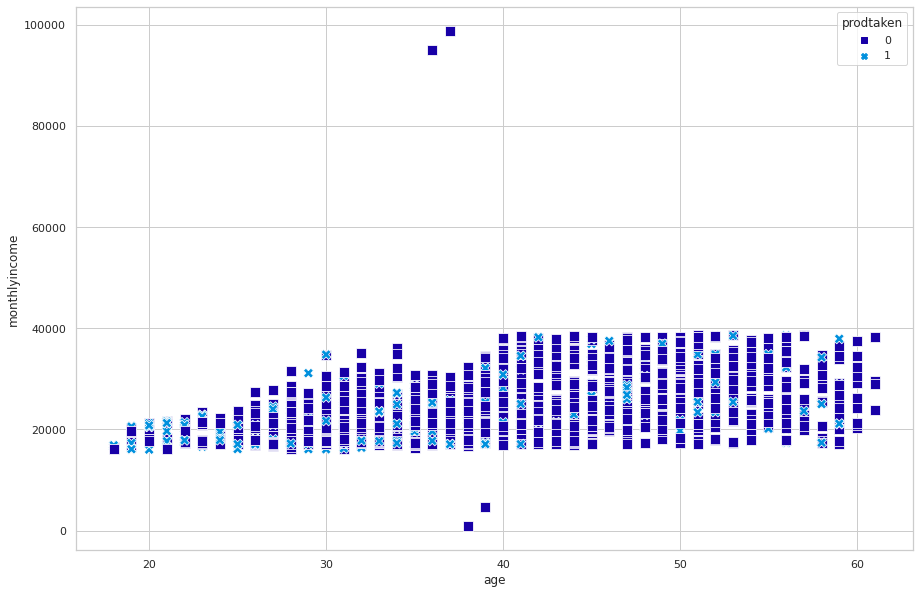

In [89]:
# Visualize Dataset

markers = {
    0: "s", 
    1: "X"
}

sns.set_style("whitegrid")
plt.figure(figsize = (15, 10))
sns.scatterplot(
    x       = 'age', 
    y       = 'monthlyincome',
    data    = X_train,
    hue     = y_train,
    style   = y_train,
    markers = markers,
    s       = 100
);

Berdasarkan hasil visualisasi data scatterplot di atas, dapat disimpulkan bahwa data yang kita punya sebenarnya tidak dapat dipisahkan oleh garis linear, berarti untuk melakukan training model-nya nanti cocoknya menggunakan algoritma yang dapat bekerja dengan baik untuk memisahkan data non-linear.

## Feature Selection analysis

Disini Saya ingin menggabungkan data X_train dan y_train terlebih dahulu. Karena setelah ini Saya ingin mendapatkan fitur apa saja yang mempunyai korelasi dengan variabel target *prodtaken*. 

Tujuannya disini adalah untuk menyeleksi fitur-fitur yang akan mengalami proses Feature Engineering (FE) lebih lanjut dan juga yang akan digunakan dalam membuat model machine learning.

In [90]:
# concate data train
data_train = pd.concat([X_train, y_train], axis=1)
data_train

age    typeofcontact citytier  durationofpitch      occupation  gender  \
0     60.0     Self Enquiry        2             13.0  Small Business    Male   
1     45.0     Self Enquiry        3             10.0        Salaried  Female   
2     37.0  Company Invited        3              6.0  Small Business    Male   
3     39.0     Self Enquiry        3             14.0  Small Business  Female   
4     31.0  Company Invited        1             11.0  Large Business    Male   
...    ...              ...      ...              ...             ...     ...   
3409  51.0     Self Enquiry        1             17.0  Large Business    Male   
3410  44.0     Self Enquiry        1             14.0        Salaried    Male   
3411  37.0  Company Invited        3              7.0  Small Business  Female   
3412  46.0  Company Invited        1             14.0        Salaried    Male   
3413  45.0     Self Enquiry        2             30.0  Small Business    Male   

      numberofpersonvisiting  numberoffollowups productpitched  \
0                          3                4.0          Basic   
1                          1                NaN         Deluxe   
2                          2                5.0         Deluxe   
3                          3                2.0         Deluxe   
4                          3                4.0          Basic   
...                      ...                ...            ...   
3409                       4                5.0       Standard   
3410                       3                1.0          Basic   
3411                       3                4.0         Deluxe   
3412                       4                4.0       Standard   
3413                       2                3.0          Basic   

      preferredpropertystar maritalstatus  numberoftrips passport  \
0                       3.0      Divorced            2.0        0   
1                       5.0       Married            5.0        1   
2                       3.0       Married            2.0        0   
3                       5.0       Married            3.0        1   
4                       3.0        Single            2.0        1   
...                     ...           ...            ...      ...   
3409                    3.0        Single            8.0        0   
3410                    3.0       Married            3.0        1   
3411                    3.0     Unmarried            6.0        0   
3412                    5.0       Married            3.0        0   
3413                    4.0        Single            2.0        0   

      pitchsatisfactionscore owncar  numberofchildrenvisiting     designation  \
0                          4      1                       1.0       Executive   
1                          4      0                       0.0         Manager   
2                          1      0                       1.0         Manager   
3                          3      1                       2.0         Manager   
4                          4      1                       1.0       Executive   
...                      ...    ...                       ...             ...   
3409                       5      0                       3.0  Senior Manager   
3410                       3      1                       0.0       Executive   
3411                       2      1                       2.0         Manager   
3412                       2      1                       3.0  Senior Manager   
3413                       4      0                       0.0       Executive   

      monthlyincome prodtaken  
0           20945.0         0  
1           20006.0         0  
2           24525.0         0  
3           24283.0         0  
4           20963.0         1  
...             ...       ...  
3409        29174.0         0  
3410        17818.0         0  
3411        25331.0         0  
3412        23888.0         0  
3413        17177.0         0  

[3414 rows x 19 columns]

Tujuan dari project ini mengarah ke pemodelan prediktif klasifikasi dengan variabel input kategorik dan numerik (continuous) serta variabel target (output-nya) juga numerik yang merepresentasikan data kategorik. Dalam proses menyelesi fitur dalam kasus ini, Saya menggunakan metode `Phi_K Correlation` karena metode ini menerapkan konstanta korelasi praktis yang bekerja secara konsisten antara variabel kategori, ordinal, dan interval. 

### phik correlation

interval columns not set, guessing: ['age', 'durationofpitch', 'numberofpersonvisiting', 'numberoffollowups', 'preferredpropertystar', 'numberoftrips', 'pitchsatisfactionscore', 'numberofchildrenvisiting', 'monthlyincome']


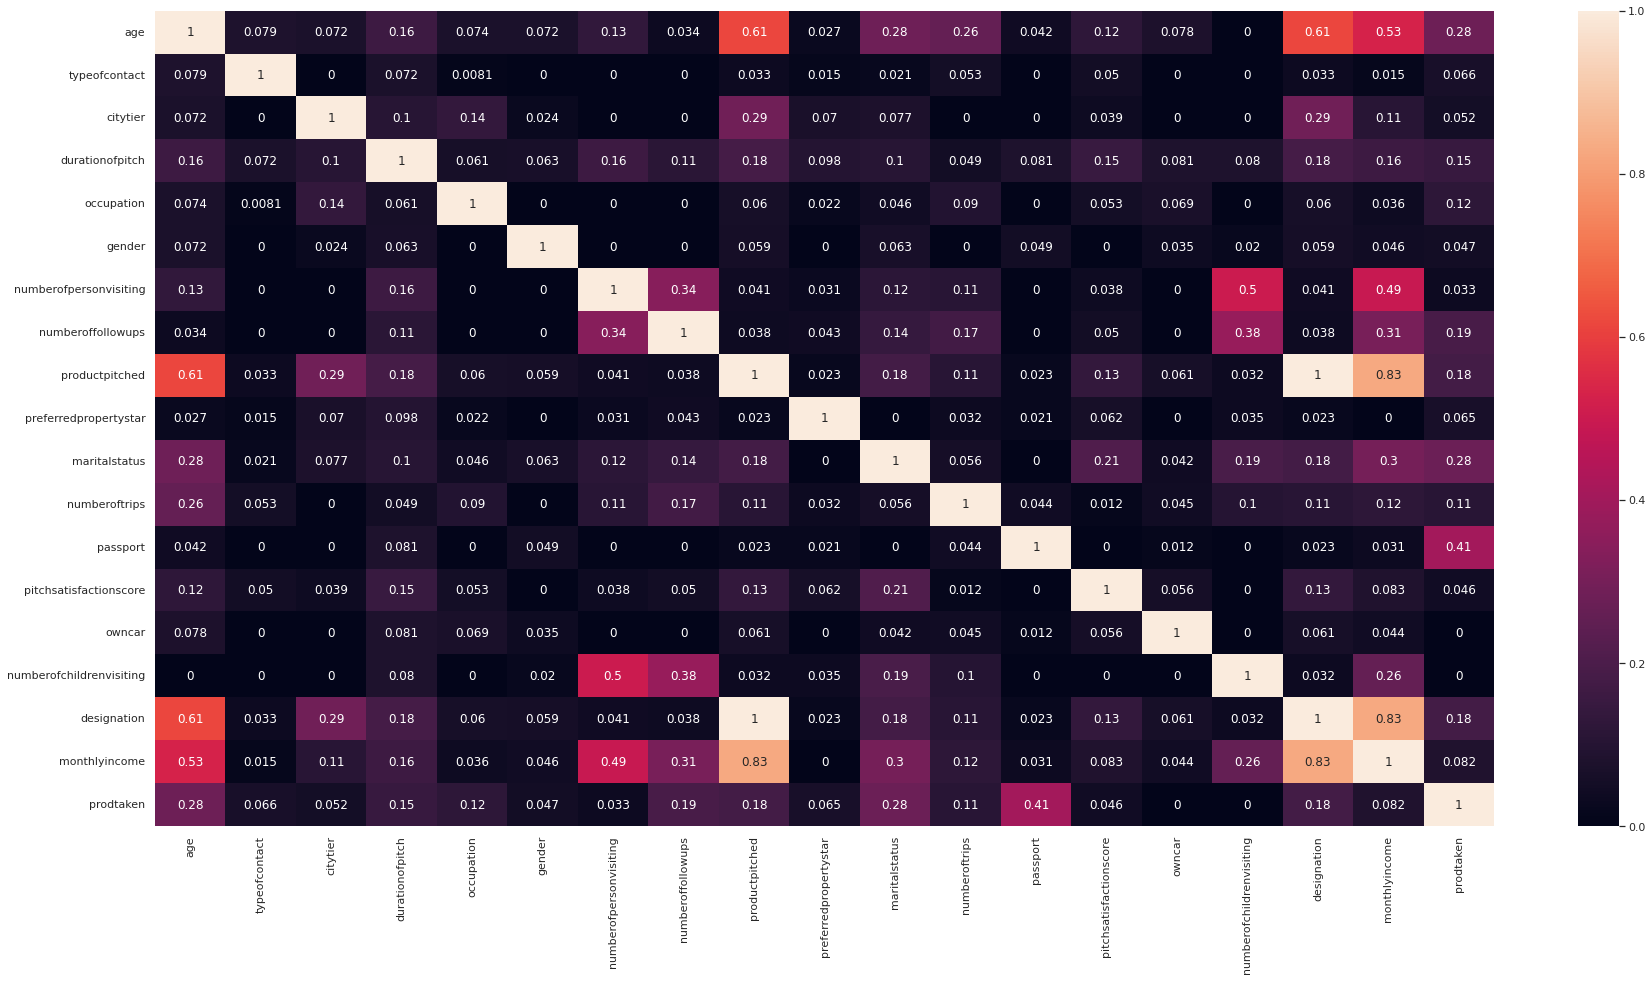

In [91]:
# correlation matrix (heatmap style)
phik_overview = data_train.phik_matrix()
phik_overview.round(2)

plt.figure(figsize=(30, 15))
sns.heatmap(phik_overview, annot= True, vmin=0, vmax=1)
plt.show()

<Axes: >

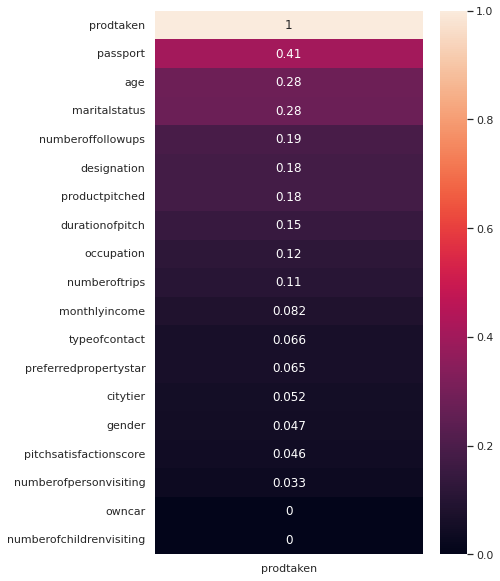

In [92]:
# Summary correlation matrix to prodtaken
plt.figure(figsize=(6,10))
sns.heatmap(phik_overview[['prodtaken']].sort_values(by=['prodtaken'],ascending=False,),annot=True)

Suatu variabel dikatakan mempunyai korelasi yang positif terhadap target ketika nilai variabel tersebut mendekati nilai 1 (warna sangat cerah) atau sebaliknya, suatu variabel dikatakan mempunyai korelasi yang negatif terhadap target ketika nilai variabel tersebut mendekati nilai -1 (warna sangat gelap). Jika nilai variabel semakin mendekati 0, maka variabel tersebut tidak ada korelasi terhadap target.

Karena model yang akan kita buat akan menganalisis pelanggan baru terlebih dahulu dan kemudian dihubungi, maka sebaiknya data interaksi pelanggan tidak digunakan. Kolom/fitur yang dimaksud adalah: `'durationofpitch', 'numberoffollowups', 'productpitched', 'pitchsatisfactionscore'`. Kemudian `typeofcontact` juga dapat dihapus karena semua pelanggan baru akan dihubungi oleh perusahaan.<br>

Sehingga pada proses kedepannya nanti, Saya akan melakukan `drop` untuk variabel-variabel tersebut dan variabel yang tidak mempunyai hubungan signifikan dengan kolom target. Berdasarkan heatmap di atas dengan mempertimbangkan hasil EDA yang telah dilakukan sebelumnya, kolom yang akan di `drop` yaitu:<br>
  - numberoffollowups
  - productpitched
  - durationofpitch
  - numberoftrips
  - typeofcontact
  - gender
  - pitchsatisfactionscore
  - numberofpersonvisiting
  - owncar
  - numberofchildrenvisiting
<br>

Sedangkan variabel yang mempunyai korelasi kuat sampai ke cukup kuat terhadap target *prodtaken* adalah:
  - passport
  - age
  - maritalstatus
  - designation
  - occupation
  - monthlyincome
  - preferredpropertystar
  - citytier

## Melakukan `Dropping` kolom yang tidak digunakan untuk membuat model

Disini Saya akan melakukan `drop` kolom seperti:  
  - numberoffollowups
  - productpitched
  - durationofpitch
  - numberoftrips
  - typeofcontact
  - gender
  - pitchsatisfactionscore
  - numberofpersonvisiting
  - owncar
  - numberofchildrenvisiting

In [93]:
# Dropping unnecessary columns from the train-test-set, which we'll use going forward

X_train.drop(columns=['numberoffollowups', 'productpitched', 'durationofpitch', 'numberoftrips', 'typeofcontact', 'gender', 'pitchsatisfactionscore', 'numberofpersonvisiting', 'owncar', 'numberofchildrenvisiting'], inplace=True)
X_test.drop(columns=['numberoffollowups', 'productpitched', 'durationofpitch', 'numberoftrips', 'typeofcontact', 'gender', 'pitchsatisfactionscore', 'numberofpersonvisiting', 'owncar', 'numberofchildrenvisiting'], inplace=True)

# check shape dataset
print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (3414, 8)
Test Size  :  (1464, 8)


Berdasarkan informasi di atas, diketahui bahwa data Train-Set terdiri dari 3.414 baris dan 8 kolom. Sedangkan data Test-Set adalah 1.464 baris dan 8 kolom.

## Mendeteksi dan Handling data Outlier

Berhubungan dengan tujuan dari project ini adalah membuat model Classification meskipun model yang akan kita gunakan nantinya **tidak sensitif** terhadap outlier, disini akan tetap dilakukan proses handling data outlier.<br>

Sebelum proses handling outlier, sebaiknya kita melakukan pendeteksian outlier untuk masing-masing variabel numerik baik yang datanya terdistribusi normal maupun yang datanya tidak terdistribusi normal *(skewed)*.

Pertama, Saya ingin mengecek dulu variabel apa saja yang memiliki outlier dengan `box plot`:

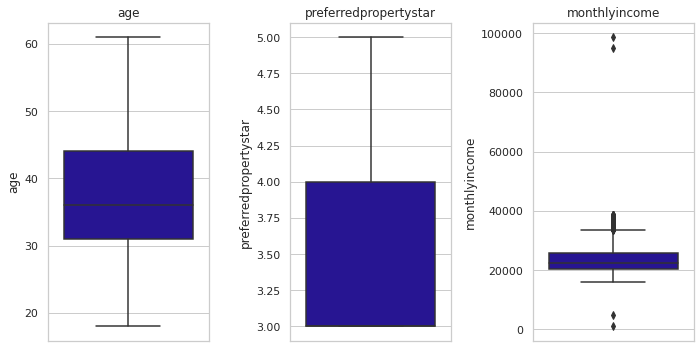

In [94]:
# Check outlier
numerical_col = X_train.select_dtypes(exclude='category').columns.tolist()
plt.figure(figsize=(20,5))

for i, variable in enumerate(numerical_col):
    plt.subplot(1,6,i+1)
    sns.boxplot(y=X_train[variable], orient='h')
    plt.tight_layout()
    plt.title(variable)

plt.show()

Berdasarkan box plot di atas, dapat dilihat bahwa variabel yang memiliki outlier adalah `monthlyincome`
Sehingga, variabel ini yang dilakukan proses untuk mendeteksi outlier.

Pertama-tama, Saya akan memeriksa outlier yang nilainya sangat tinggi (`monthlyincome > 40K Atau <10K`).

In [95]:
# Check very high outliers in 'monthlyincome'
X_train[(X_train['monthlyincome'] > 40000) | (X_train['monthlyincome'] < 10000)]

age citytier      occupation  preferredpropertystar maritalstatus  \
926   36.0        1        Salaried                    NaN      Divorced   
1190  37.0        1        Salaried                    5.0      Divorced   
1590  38.0        1  Large Business                    3.0        Single   
2723  39.0        1  Large Business                    3.0        Single   

     passport designation  monthlyincome  
926         1   Executive        95000.0  
1190        1   Executive        98678.0  
1590        1     Manager         1000.0  
2723        1     Manager         4678.0

Kita melihat ada 4 kasus ekstrem dalam kumpulan data train dari 3.414 data.<br>
Saya akan menangani semua outlier pada `monthlyincome` menggunakan `capping`, bukan menghapus/drop kasus ekstrim ini. Kemudian Saya akan menggunakan `3*IQR` untuk kasus yang sangat esktrem.

Saya akan membuat 2 fungsi untuk menangani outlier dengan aturan di bawah ini:
- semua nilai yang lebih kecil dari `Lower Whisker` akan diberi nilai `Lower Whisker`
- semua nilai yang berada di atas `Upper Whisker` akan diberi nilai `Upper Whisker`

In [96]:
# functions to treat outliers

def treat_outliers(data,col):
    '''
    treats outliers in a variable
    col: str, name of the numerical variable
    data: data frame
    col: name of the column
    '''
    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 3*IQR 
    Upper_Whisker = Q3 + 3*IQR
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) 
    # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker                                                         
    # and all the values above upper_whisker will be assigned value of upper_Whisker 
    return data

def treat_outliers_all(data, col_list):
    '''
    treat outlier in all numerical variables
    col_list: list of numerical variables
    data: data frame
    '''
    for c in col_list:
        data = treat_outliers(data,c)
        
    return data

In [97]:
# list of outlier_treatment_col
outlier_treatment_col = ['monthlyincome']

# treating outliers
X_train = treat_outliers_all(X_train, outlier_treatment_col)

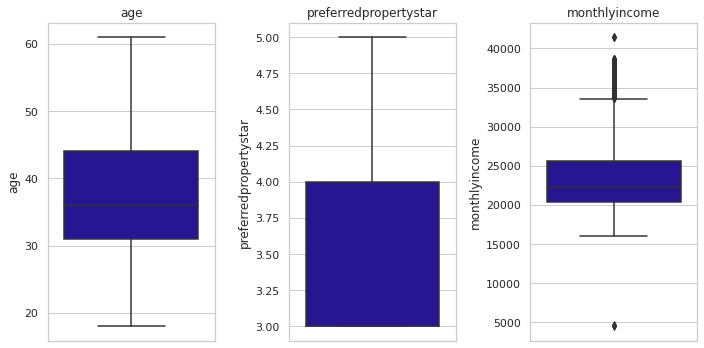

In [98]:
# Verifying outlier treatment status
numerical_col = X_train.select_dtypes(exclude='category').columns.tolist()
plt.figure(figsize=(20,5))

for i, variable in enumerate(numerical_col):
    plt.subplot(1,6,i+1)
    sns.boxplot(y=X_train[variable], orient='h')
    plt.tight_layout()
    plt.title(variable)

plt.show()

Sekarang data kita sebenarnya masih terdapat outlier pada variabel `monthlyincome` setelah dilakukan capping, namun berkurang dari sebelumnya. Saya asumsikan ini adalah natural outlier, karena bisa saja orang yang mempunyai pendapatan tinggi itu yang berasal dari tingkat kota yang tinggi juga.

## Memisahkan antara kolom Numerikal dan kolom Kategorikal

In [99]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(exclude='category').columns.tolist()
cat_columns = X_train.select_dtypes(include='category').columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['age', 'preferredpropertystar', 'monthlyincome']
Cat Columns :  ['citytier', 'occupation', 'maritalstatus', 'passport', 'designation']


In [100]:
# Split Train-Set based on Categorical Column Types
X_train_cat = X_train[cat_columns]

# Get Categorical column (1) and (2)
cat_col1 = X_train_cat[['occupation', 'maritalstatus', 'passport']].columns.tolist()
cat_col2 = X_train_cat[['citytier', 'designation']].columns.tolist()
print('cat_col1 : ', cat_col1)
print('cat_col2 : ', cat_col2)

cat_col1 :  ['occupation', 'maritalstatus', 'passport']
cat_col2 :  ['citytier', 'designation']


## Handling Missing Values

In [101]:
# Check Missing Values in `X_train`

X_train.isnull().sum()

age                      158
citytier                   0
occupation                 0
preferredpropertystar     19
maritalstatus              0
passport                   0
designation                0
monthlyincome            149
dtype: int64

In [102]:
# Check Missing Values in `X_test`

X_test.isnull().sum()

age                      67
citytier                  0
occupation                0
preferredpropertystar     7
maritalstatus             0
passport                  0
designation               0
monthlyincome            83
dtype: int64

In [103]:
# Check Missing Values in `y_train`
mv_y_train = y_train.isnull().sum()
print('Jumlah Missing Value di y_train : ', mv_y_train)

# Check Missing Values in `y_test`
mv_y_test = y_test.isnull().sum()
print('Jumlah Missing Value di y_test : ', mv_y_test)

Jumlah Missing Value di y_train :  0
Jumlah Missing Value di y_test :  0


Berdasarkan informasi di atas menunjukkan bahwa terdapat missing value pada X_train dan X_test pada variabel `'age', 'preferredpropertystar', 'monthlyincome'`.<br>

Sedangkan pada y_train dan y_test tidak ada missing value. Sehingga, tidak ada proses handling missing value pada kedua data tersebut.


Sehingga pada X_train dan X_test di variabel `'age', 'preferredpropertystar', 'monthlyincome'`, Saya akan melakukan imputasi missing value dengan `median` karena beberapa data berdistribusi tidak normal `(skewed)`. Namun, Saya akan mendefinisikan proses imputasi ini menggunakan `SimpleImputer` di proses `bundle preprocessing` kedepannya.

## Feature Scaling

Saya akan melakukan feature scaling untuk kolom numerikal. Proses ini dibutuhkan karena skala dari data numerik yang kita punya itu berbeda-beda. <br>

Tujuan feature scaling disini adalah untuk membuat data kita mempunyai skala yang sama agar algoritma machine learning memperlakukan semua fitur dengan adil dan tentunya hal ini akan mempercepat pembelajaran dari suatu model terhadap datanya.<br>

Dalam proses feature scaling disini, Saya akan treat scalling variabel `'age', 'preferredpropertystar', 'monthlyincome'` menggunakan **`Normalization/MinMaxScaler`** karena beberapa variabelnya mempunyai data yang tidak berdistribusi normal/skewed.<br>

Namun, Saya akan mendefinisikan proses feature scaling ini menggunakan `MinMaxScaler` di proses `bundle preprocessing` kedepannya.

## Feature Encoding

Feature Encoding adalah proses untuk mengubah data kategorikal menjadi numerik. Proses ini perlu dilakukan karena model machine learning tidak dapat memproses data dengan tipe data kategorik.<br>

Sebelumnya, Saya akan melakukan `mapping values` terhadap data kategorik yang awalnya sudah dalam bentuk numerik, agar mempermudah proses kedepannya dalam mendefinisikan fitur yang akan di encode di proses `bundle preprocessing` kedepannya.

In [104]:
# Mapping values to the expected output
X_train['citytier']=X_train['citytier'].map({1: 'Tier 1', 2: 'Tier 2', 3: 'Tier 3'})
X_train['passport']=X_train['passport'].map({0: 'No', 1: 'Yes'})
X_test['citytier']=X_test['citytier'].map({1: 'Tier 1', 2: 'Tier 2', 3: 'Tier 3'})
X_test['passport']=X_test['passport'].map({0: 'No', 1: 'Yes'})
X_train.head()

age citytier      occupation  preferredpropertystar maritalstatus  \
0  60.0   Tier 2  Small Business                    3.0      Divorced   
1  45.0   Tier 3        Salaried                    5.0       Married   
2  37.0   Tier 3  Small Business                    3.0       Married   
3  39.0   Tier 3  Small Business                    5.0       Married   
4  31.0   Tier 1  Large Business                    3.0        Single   

  passport designation  monthlyincome  
0       No   Executive        20945.0  
1      Yes     Manager        20006.0  
2       No     Manager        24525.0  
3      Yes     Manager        24283.0  
4      Yes   Executive        20963.0

Sekarang kita mempunyai 5 variabel kategorik yang akan kita ubah ke numerik. Perhatikan bahwa 2 variabel yang value-nya mempunyai urutan/tingkatan yang berarti, seperti `citytier` dan `designation`. Sehingga, Saya akan melakukan proses encode dengan metode **`OrdinalEncoder`** pada kedua variabel tersebut.<br>

Sementara pada variabel `occupation`, `maritalstatus`, dan `passport` itu value-nya tidak menunjukkan urutan/tingkatan yang berarti. Sehingga, Saya akan melakukan proses encode dengan metode **`OneHotEncoder`** pada ketiga variabel tersebut.<br>

Namun, Saya akan mendefinisikan proses feature encoding ini pada proses `bundle preprocessing` kedepannya.

## Melakukan `bundle preprocessing` untuk data numerikal dan kategorikal menggunakan `ColumnTransformer`

In [105]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
                        ('imputer', SimpleImputer(missing_values = np.nan, strategy='median')),
                        ('scaler', MinMaxScaler())
                        ])

In [106]:
# Preprocessing for categorical data (1)
categorical_transformer1 = Pipeline(steps=[
                          ('onehot', OneHotEncoder(handle_unknown='ignore'))
                          ])

In [107]:
# Preprocessing for categorical data (2)
categorical_transformer2 = Pipeline(steps=[
                          ('ordinal', OrdinalEncoder())
                          ])

In [108]:
# Bundle preprocessing for numerical and categorical data (1) and (2)
preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numerical_transformer, num_columns),
                    ('cat1', categorical_transformer1, cat_col1),
                    ('cat2', categorical_transformer2, cat_col2),
                ])

# vi. Model Definition

>Bagian ini berisi cell untuk mendefinisikan model seperti alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai.

 1. Algoritma `Supervised learning` yang dipakai adalah:<br>
   - `Logistic Regression`. Algoritma ini baik digunakan untuk kasus klasifikasi ketika data kita memiliki hubungan linear antara variabel independen dengan target. Namun, jika data kita tidak linear, model ini tidak cukup bagus untuk memprediksi karena kesalahan dalam memilih variabel untuk dimasukkan ke dalam model.<br>
   - `Decision Tree`, `Random Forest`, `AdaBoostClassifier`, `Gradient Boosting`, `XGBoost` merupakan Algoritma yang berbasis tree. Baik digunakan juga untuk data yang non-linear tanpa harus menangani outlier dan scaling karena model ini tidak terpengaruh oleh besaran fitur. Namun kelemahannya jika menangani kasus yang kompleks, maka akan lebih banyak dan lebih dalam lagi tree yang dibuat, dan itu akan membutuhkan waktu yang training yang lebih lama dan storage yang besar.<br>

2. Hyperparameter yang dipakai adalah:
  - Pertama yang digunakan dalam kasus ini adalah baseline setiap model dengan `default parameter`.<br>
  - Setelah itu dilakukan `cross validation` setiap modelnya, dan dipilih model yang terbaik.<br>
  - Didapatkan model yang terbaik adalah `Logistic Regression`. Kemudian dilakukan hyperparameter tuning dengan `Grid Search`.<br>
  - `Grid Search` menghasilkan hyperparameter terbaik: `{'model__C': 0.01, 'model__max_iter': 100, 'model__multi_class': 'auto', 'model__penalty': 'l2', 'model__solver': 'lbfgs'}`.<br>

3. Metrics yang dapat digunakan seperti `Accuracy`, `Precision`, `Recall`, `F1-score`. Tapi untuk kasus ini, metrics yang akan dipakai adalah `Precision-score`. Saya tidak menggunakan `accuracy` dalam kasus ini karena kita mempunyai data yang tidak seimbang (imbalanced data). Data yang tidak seimbang lebih cocok dilakukan evaluasi modelnya menggunakan metrics `Precision`, `Recall`, dan `F1-score`. Namun, karena tujuan kita di awal adalah 
ingin membuat biaya pemasaran yang lebih efisien untuk memperkenalkan paket perjalanan yang baru, maka Saya lebih fokus untuk meningkatkan `Precision-score` untuk meminimalkan kesalahan model dalam memprediksi seseorang `membeli paket perjalanan` padahal aktualnya `tidak membeli paket perjalanan`. Sehingga, kita tidak mengeluarkan biaya pemasaran secara cuma-cuma untuk orang yang tidak akan membeli paket perjalanan. Jika model salah memprediksi bahwa seseorang `tidak membeli paket perjalanan` padahal `aktualnya membeli`, itu berarti cukup bagus dan dampaknya tidak terlalu mempengaruhi biaya yang kita keluarkan. Meskipun kita melewati kesempatan untuk memasarkan produk kita ke orang yang tepat, tapi itu tidak menjadi masalah yang besar dibandingkan kita harus mengeluarkan biaya pemasaran untuk orang yang aktualnya tidak tertarik dengan produk kita.

# vii. Model Training

>Bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

Disini, Saya akan membuat *baseline model*. *Baseline model* adalah model yang ditraining menggunakan default parameter.

In [109]:
# define models:
base_models = [("LR_model", LogisticRegression(random_state=42)),
               ("DT_model", DecisionTreeClassifier(random_state=42)),
               ("RF_model", RandomForestClassifier(random_state=42)),
               ("ABC_model", AdaBoostClassifier(random_state=42)),
               ("GB_model", GradientBoostingClassifier(random_state=42)),
               ("XGB_model", XGBClassifier(random_state=42))]

In [110]:
# Preprocessing, fitting, and cross validation: 
for name, model in base_models:
    print(f"{name}")
    # pack preprocessing of data and the model in a pipeline:
    model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', model)])
    
    # Preprocessing of training data, fit model 
    model_steps.fit(X_train, y_train)

    # get cross validation score for each model:
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    cv_results = cross_val_score(model_steps, 
                                 X_train,
                                 y_train, 
                                 cv=skf,
                                 scoring="precision",
                                 n_jobs=-1)
    
    # output:
    print('precision_score - All - Cross Validation  : ', cv_results)
    print('precision_score - Mean - Cross Validation : ', cv_results.mean())
    print('precision_score - Std - Cross Validation  : ', cv_results.std())
    print('precision_score - Range of Test-Set       : ', (cv_results.mean()-cv_results.std()) , '-', (cv_results.mean()+cv_results.std()))

    print('')

LR_model
precision_score - All - Cross Validation  :  [0.66666667 0.63636364 0.77419355 0.75       0.67272727]
precision_score - Mean - Cross Validation :  0.6999902248289345
precision_score - Std - Cross Validation  :  0.05274311648994928
precision_score - Range of Test-Set       :  0.6472471083389852 - 0.7527333413188837

DT_model
precision_score - All - Cross Validation  :  [0.5037037  0.57462687 0.50393701 0.68595041 0.55633803]
precision_score - Mean - Cross Validation :  0.5649112037283032
precision_score - Std - Cross Validation  :  0.0667571633319468
precision_score - Range of Test-Set       :  0.49815404039635636 - 0.63166836706025

RF_model
precision_score - All - Cross Validation  :  [0.72222222 0.71764706 0.72       0.75       0.76344086]
precision_score - Mean - Cross Validation :  0.7346620282521611
precision_score - Std - Cross Validation  :  0.018561829530910266
precision_score - Range of Test-Set       :  0.7161001987212509 - 0.7532238577830713

ABC_model
precision_sco

Berdasarkan hasil cross validation pada data training dengan menggunakan parameter default (baseline model) menunjukkan bahwa precision score yang konsisten terdapat pada model `Random Forest` yang juga mempunyai nilai `mean score tertinggi` yaitu `0.73` dan `standar deviasi score yang rendah` yaitu `0.01`.<br>

Selanjutnya, Saya akan membandingkannya dengan hasil prediksi y_train dan y_test pada proses evaluasi model. Jika memang model `Random Forest` yang terbaik, maka Saya akan melakukan `Hyperparameter Tuning` pada model **`Random Forest`**.

# viii. Model Evaluation

>Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. **Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.**

## Baseline model

### Logistic Regression

In [111]:
# define model
model_lr = LogisticRegression(random_state=42)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline_1 = Pipeline(steps=[("preprocessor", preprocessor),
                              ("model", model_lr)
                             ])

# Preprocessing of training data, fit model 
my_pipeline_1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age',
                                                   'preferredpropertystar',
                                                   'monthlyincome']),
                                                 ('cat1',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['occupation',
                                                   'maritalstatus',
                                                   'passport']),
                                                 ('cat2',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['citytier',
                                                   'designation'])])),
                ('model', LogisticRegression(random_state=42))])

In [112]:
# Preprocessing and get predictions
y_pred_train_1 = my_pipeline_1.predict(X_train)
y_pred_test_1 = my_pipeline_1.predict(X_test)

# Check Performance Model against Train-Set
print('precision_score - Train Set  : ', precision_score (y_train, y_pred_train_1), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_1), '\n')

# Check Performance Model against Test-Set
print('precision_score - Test Set  : ', precision_score(y_test, y_pred_test_1), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_1), '\n')

precision_score - Train Set  :  0.708994708994709 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.98      0.91      2774
           1       0.71      0.21      0.32       640

    accuracy                           0.84      3414
   macro avg       0.78      0.59      0.61      3414
weighted avg       0.82      0.84      0.80      3414
 

precision_score - Test Set  :  0.6923076923076923 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      1189
           1       0.69      0.23      0.34       275

    accuracy                           0.84      1464
   macro avg       0.77      0.60      0.63      1464
weighted avg       0.82      0.84      0.80      1464
 



Confusion Matrix      : 
Confusion Matrix      : 


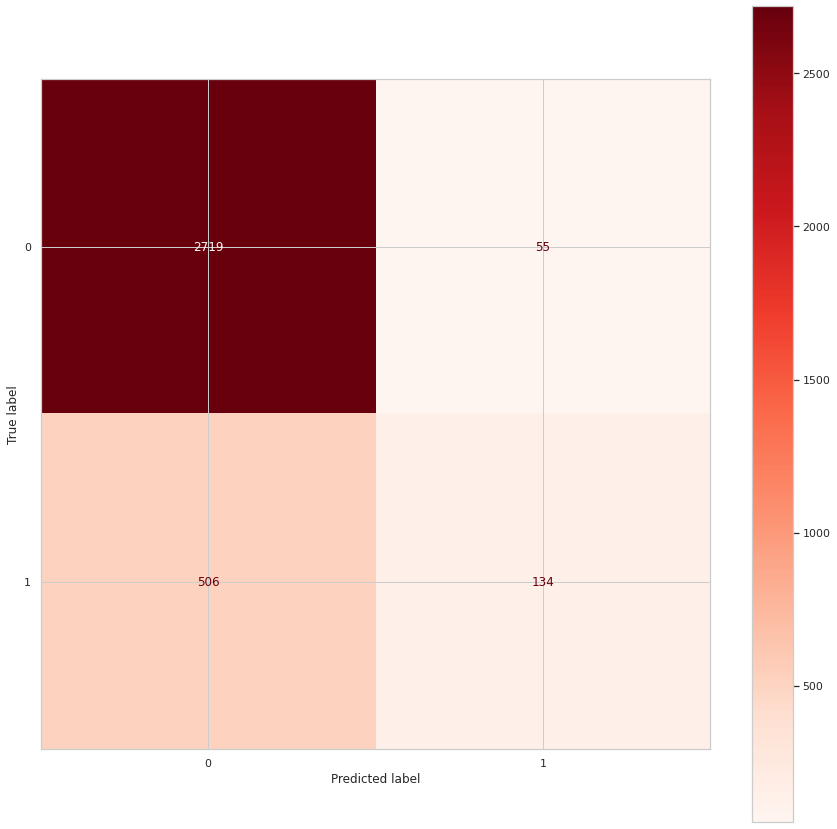

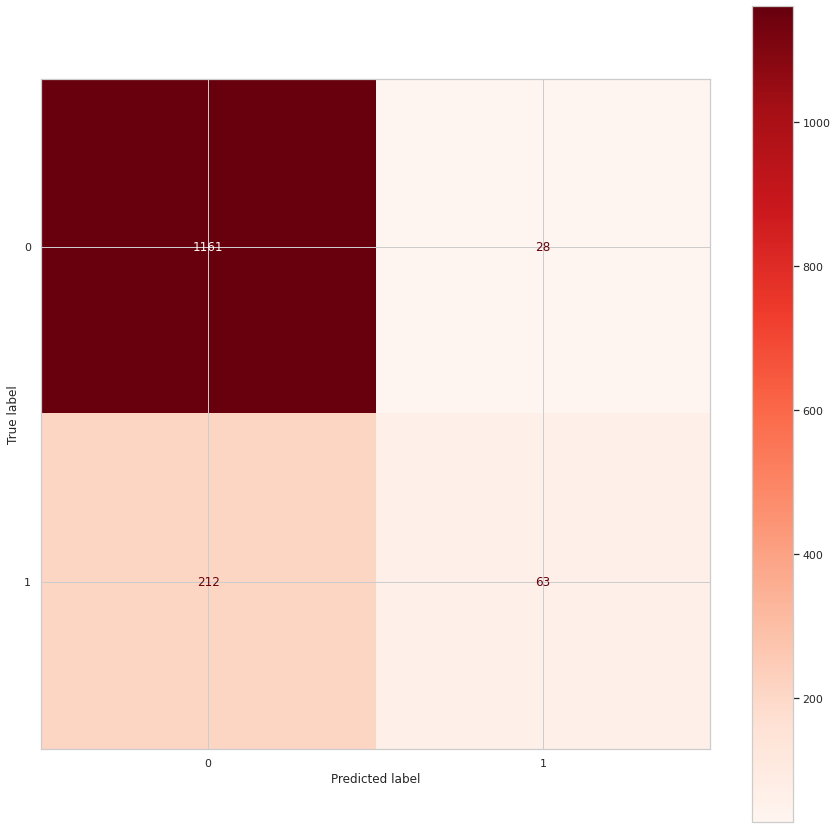

In [113]:
# confusion matrix of train and test
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(my_pipeline_1, X_train, y_train, cmap='Reds'))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(my_pipeline_1, X_test, y_test, cmap='Reds'))

Inference:
- Berdasarkan hasil evaluasi model `Logistic Regression` menggunakan `accuracy score` menunjukkan bahwa accuracy score train (0.84) dan accuracy score test  (0.84), artinya model ini dapat dikatakan `good fit` jika kita menangani kasus dengan `data yang balance`. Karena data yang kita punya tidak balance, maka tidak disarankan untuk melihat performansi model dari `accuracy score`.
- Dalam kasus ini Saya akan menggunakan metrics `Precision`. Disini, label kelas yang menjadi `interest` Saya adalah label 1 yang menyatakan seseorang itu akan mengambil paket perjalanan. Jadi Saya hanya fokus pada classification report pada label 1. 
Berdasarkan classification report data train, hasilnya menunjukkan bahwa score precision-score yang dimiliki oleh label 1 adalah `0.71` sedangkan pada classification report data test menunjukkan scorenya adalah `0.69`. Artinya, bahwa model `Logistic Regression` ini bisa dikatakan `goodfit` meskipun masih ada kesalahan prediksi.
- Hal ini dapat dibuktikan dengan `confusion matrix`. Misalnya pada data train. Dapat dilihat bahwa `False Negative` dan `False Positive` tinggi. 
  1. `False Negative` terjadi ketika model `memprediksikan` bahwa seseorang `tidak mengambil paket perjalanan`, padahal aktualnya orang ini mengambil paket perjalanan. Model ini sudah melakukan salah prediksi sebanyak 506 orang.
  2. `False Positive` terjadi ketika model `memprediksikan` bahwa seseorang `membeli paket perjalanan`, padahal aktualnya orang ini tidak membeli paket perjalanan. Model ini sudah melakukan salah prediksi sebanyak 55 orang.

### Decision Tree

In [114]:
# define model
model_dt = DecisionTreeClassifier(random_state=42)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline_2 = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_dt)
                             ])

# Preprocessing of training data, fit model 
my_pipeline_2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age',
                                                   'preferredpropertystar',
                                                   'monthlyincome']),
                                                 ('cat1',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['occupation',
                                                   'maritalstatus',
                                                   'passport']),
                                                 ('cat2',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['citytier',
                                                   'designation'])])),
                ('model', DecisionTreeClassifier(random_state=42))])

In [115]:
# Preprocessing and get predictions
y_pred_train_2 = my_pipeline_2.predict(X_train)
y_pred_test_2 = my_pipeline_2.predict(X_test)

# Check Performance Model against Train-Set
print('precision_score - Train Set  : ', precision_score (y_train, y_pred_train_2), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_2), '\n')

# Check Performance Model against Test-Set
print('precision_score - Test Set  : ', precision_score(y_test, y_pred_test_2), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_2), '\n')

precision_score - Train Set  :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2774
           1       1.00      0.99      1.00       640

    accuracy                           1.00      3414
   macro avg       1.00      1.00      1.00      3414
weighted avg       1.00      1.00      1.00      3414
 

precision_score - Test Set  :  0.6468401486988847 

Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1189
           1       0.65      0.63      0.64       275

    accuracy                           0.87      1464
   macro avg       0.78      0.78      0.78      1464
weighted avg       0.87      0.87      0.87      1464
 



Confusion Matrix      : 
Confusion Matrix      : 


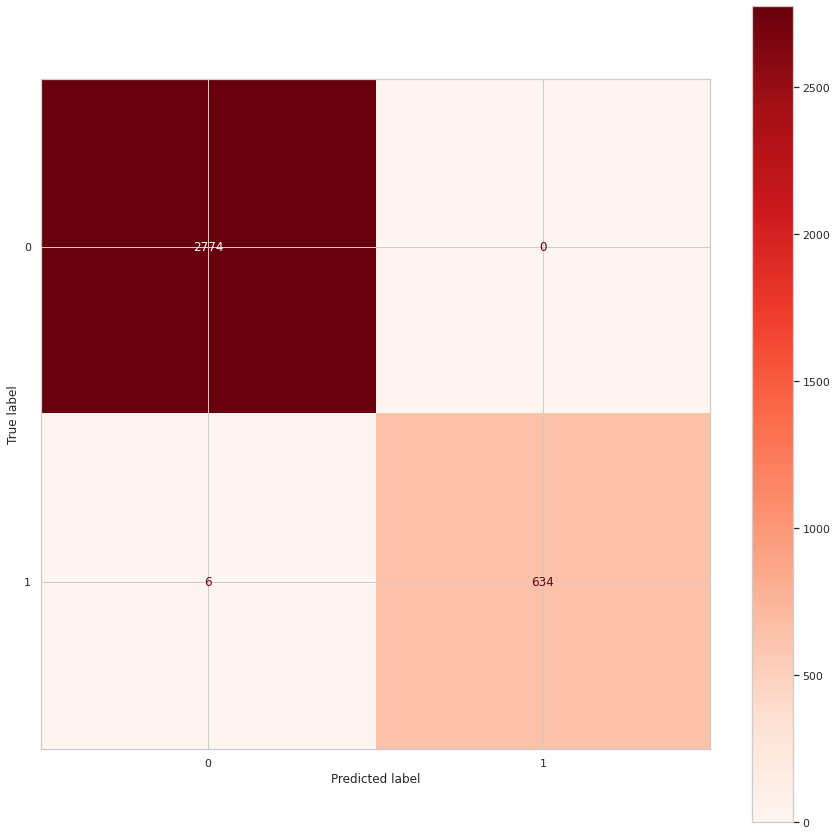

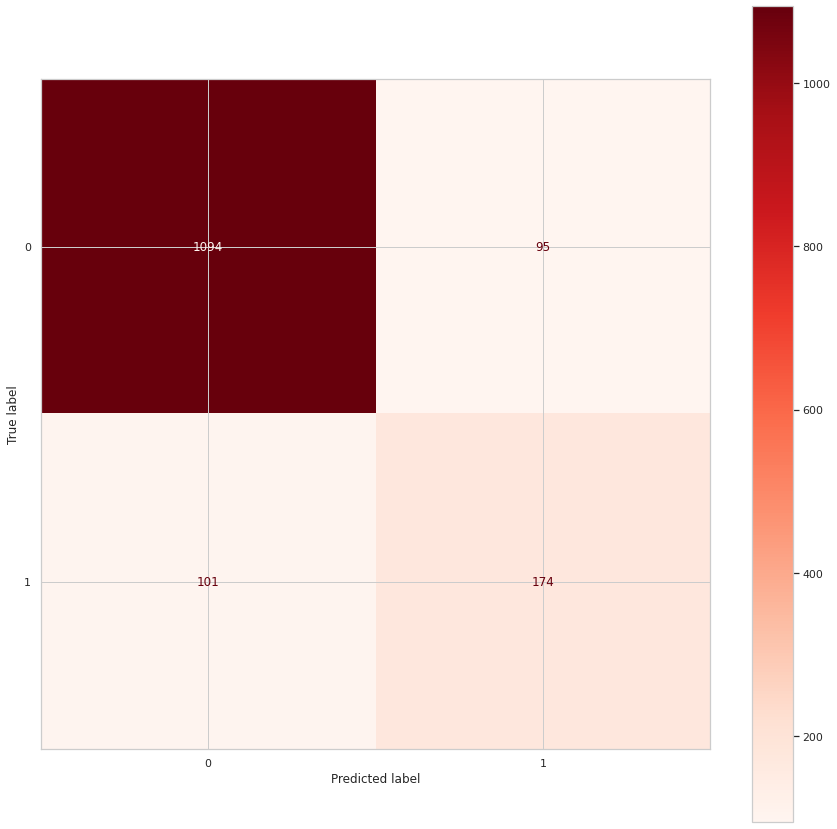

In [116]:
# confusion matrix of train and test
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(my_pipeline_2, X_train, y_train, cmap='Reds'))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(my_pipeline_2, X_test, y_test, cmap='Reds'))

Inference:
- Berdasarkan hasil evaluasi model `Decision Tree` menggunakan `accuracy score` menunjukkan bahwa accuracy score train (1.00) dan accuracy score test  (0.87), artinya model ini dapat dikatakan `overfit`. Namun karena data yang kita punya tidak balance, maka tidak disarankan untuk melihat performansi model dari `accuracy score`.
- Berdasarkan classification report data train, hasilnya menunjukkan bahwa score precision-score yang dimiliki oleh label 1 adalah `1.0` sedangkan pada classification report data test menunjukkan scorenya adalah `0.64`. Artinya, bahwa model `Decision Tree` ini bisa dikatakan `overfit` atau sederhananya model ini hanya baik untuk memprediksi label 1 pada data train saja.
- Hal ini dapat dibuktikan dengan `confusion matrix`. Misalnya pada data test. Dapat dilihat bahwa `False Negative` dan `False Positive` tinggi. 
  1. `False Negative` terjadi ketika model `memprediksikan` bahwa seseorang `tidak mengambil paket perjalanan`, padahal aktualnya orang ini mengambil paket perjalanan. Model ini sudah melakukan salah prediksi sebanyak 101 orang.
  2. `False Positive` terjadi ketika model `memprediksikan` bahwa seseorang `membeli paket perjalanan`, padahal aktualnya orang ini tidak membeli paket perjalanan. Model ini sudah melakukan salah prediksi sebanyak 95 orang.

### Random Forest

In [117]:
# define model
model_rf = RandomForestClassifier(random_state=42)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline_3 = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_rf)
                             ])

# Preprocessing of training data, fit model 
my_pipeline_3.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age',
                                                   'preferredpropertystar',
                                                   'monthlyincome']),
                                                 ('cat1',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['occupation',
                                                   'maritalstatus',
                                                   'passport']),
                                                 ('cat2',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['citytier',
                                                   'designation'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [118]:
# Preprocessing and get predictions
y_pred_train_3 = my_pipeline_3.predict(X_train)
y_pred_test_3 = my_pipeline_3.predict(X_test)

# Check Performance Model against Train-Set
print('precision_score - Train Set  : ', precision_score (y_train, y_pred_train_3), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_3), '\n')

# Check Performance Model against Test-Set
print('precision_score - Test Set  : ', precision_score(y_test, y_pred_test_3), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_3), '\n')

precision_score - Train Set  :  0.9984276729559748 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2774
           1       1.00      0.99      1.00       640

    accuracy                           1.00      3414
   macro avg       1.00      1.00      1.00      3414
weighted avg       1.00      1.00      1.00      3414
 

precision_score - Test Set  :  0.7948717948717948 

Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.97      0.93      1189
           1       0.79      0.56      0.66       275

    accuracy                           0.89      1464
   macro avg       0.85      0.76      0.80      1464
weighted avg       0.88      0.89      0.88      1464
 



Confusion Matrix      : 
Confusion Matrix      : 


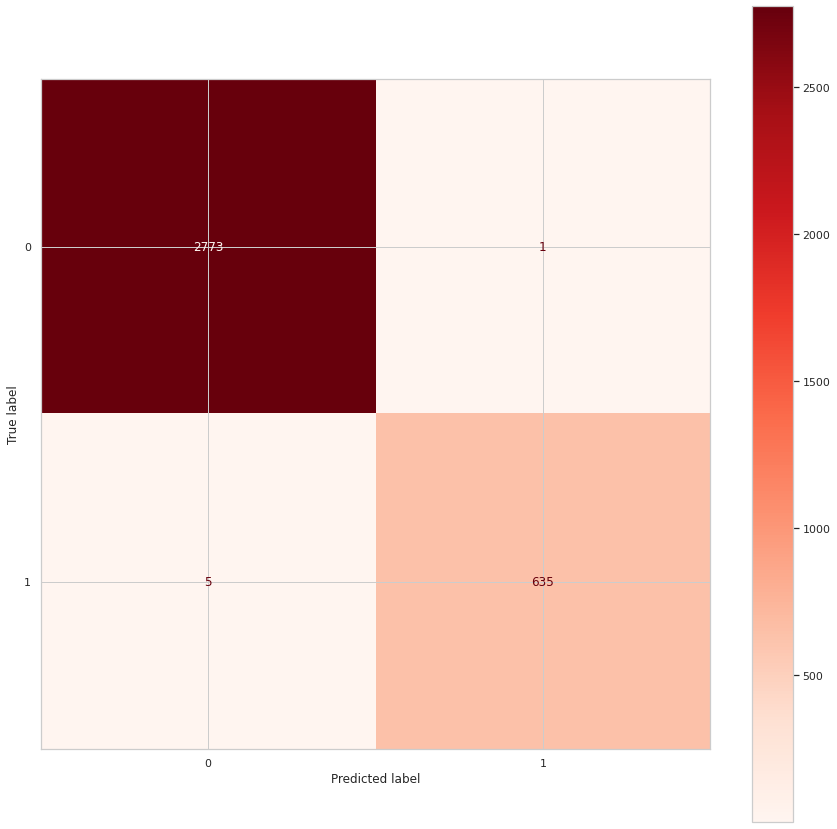

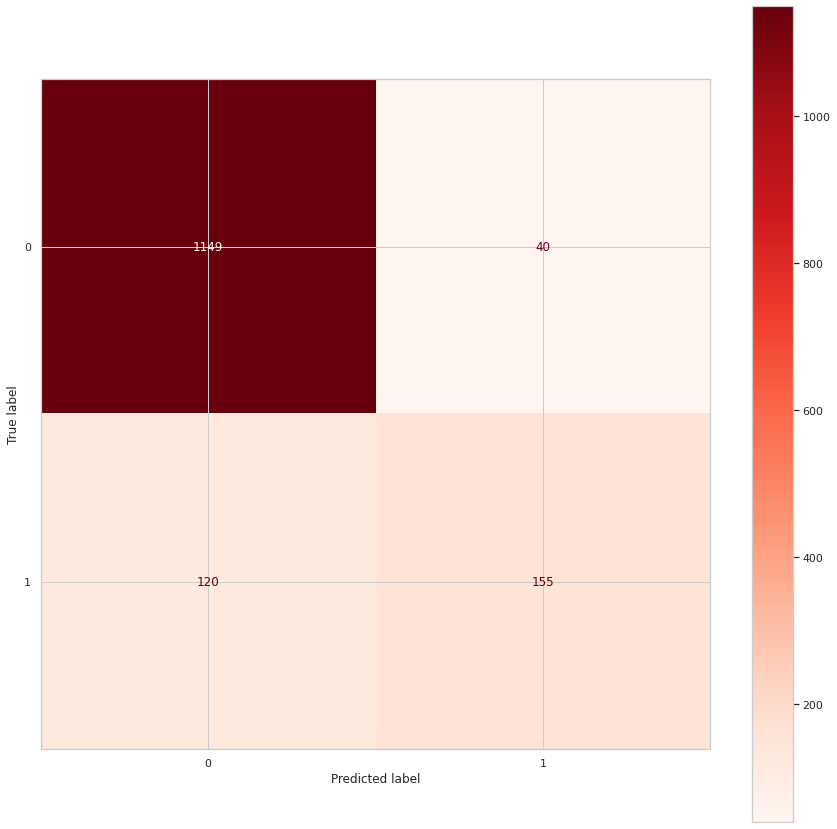

In [119]:
# confusion matrix of train and test
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(my_pipeline_3, X_train, y_train, cmap='Reds'))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(my_pipeline_3, X_test, y_test, cmap='Reds'))

Inference:
- Berdasarkan hasil evaluasi model `Random Forest` menggunakan `accuracy score` menunjukkan bahwa accuracy score train (1.00) dan accuracy score test  (0.89), artinya model ini dapat dikatakan `overfit`. Namun karena data yang kita punya tidak balance, maka tidak disarankan untuk melihat performansi model dari `accuracy score`.
- Berdasarkan classification report data train, hasilnya menunjukkan bahwa score precision-score yang dimiliki oleh label 1 adalah `1.0` sedangkan pada classification report data test menunjukkan scorenya adalah `0.79`. Artinya, bahwa model `Random Forest` ini bisa dikatakan `overfit` atau sederhananya model ini hanya baik untuk memprediksi label 1 pada data train saja.
- Hal ini dapat dibuktikan dengan `confusion matrix`. Misalnya pada data test. Dapat dilihat bahwa `False Negative` dan `False Positive` tinggi. 
  1. `False Negative` terjadi ketika model `memprediksikan` bahwa seseorang `tidak mengambil paket perjalanan`, padahal aktualnya orang ini mengambil paket perjalanan. Model ini sudah melakukan salah prediksi sebanyak 120 orang.
  2. `False Positive` terjadi ketika model `memprediksikan` bahwa seseorang `membeli paket perjalanan`, padahal aktualnya orang ini tidak membeli paket perjalanan. Model ini sudah melakukan salah prediksi sebanyak 40 orang.

### AdaBoostClassifier

In [120]:
# define model
model_abc = AdaBoostClassifier(random_state=42)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline_4 = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_abc)
                             ])

# Preprocessing of training data, fit model 
my_pipeline_4.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age',
                                                   'preferredpropertystar',
                                                   'monthlyincome']),
                                                 ('cat1',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['occupation',
                                                   'maritalstatus',
                                                   'passport']),
                                                 ('cat2',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['citytier',
                                                   'designation'])])),
                ('model', AdaBoostClassifier(random_state=42))])

In [121]:
# Preprocessing and get predictions
y_pred_train_4 = my_pipeline_4.predict(X_train)
y_pred_test_4 = my_pipeline_4.predict(X_test)

# Check Performance Model against Train-Set
print('precision_score - Train Set  : ', precision_score (y_train, y_pred_train_4), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_4), '\n')

# Check Performance Model against Test-Set
print('precision_score - Test Set  : ', precision_score(y_test, y_pred_test_4), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_4), '\n')

precision_score - Train Set  :  0.7578125 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.98      0.91      2774
           1       0.76      0.30      0.43       640

    accuracy                           0.85      3414
   macro avg       0.81      0.64      0.67      3414
weighted avg       0.84      0.85      0.82      3414
 

precision_score - Test Set  :  0.6814159292035398 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.97      0.91      1189
           1       0.68      0.28      0.40       275

    accuracy                           0.84      1464
   macro avg       0.77      0.62      0.65      1464
weighted avg       0.82      0.84      0.81      1464
 



Confusion Matrix      : 
Confusion Matrix      : 


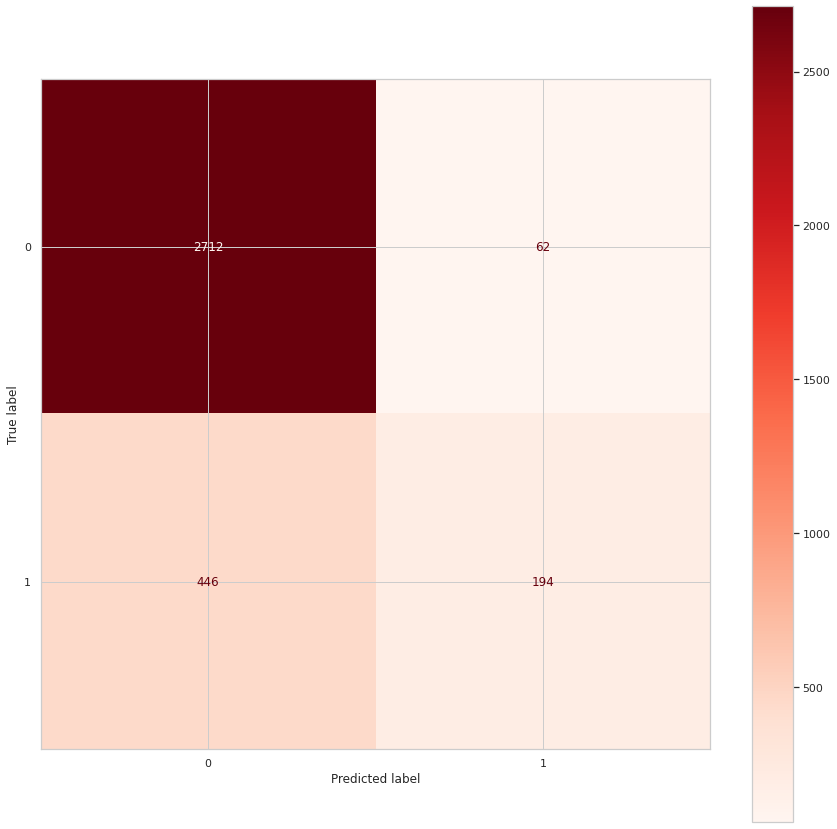

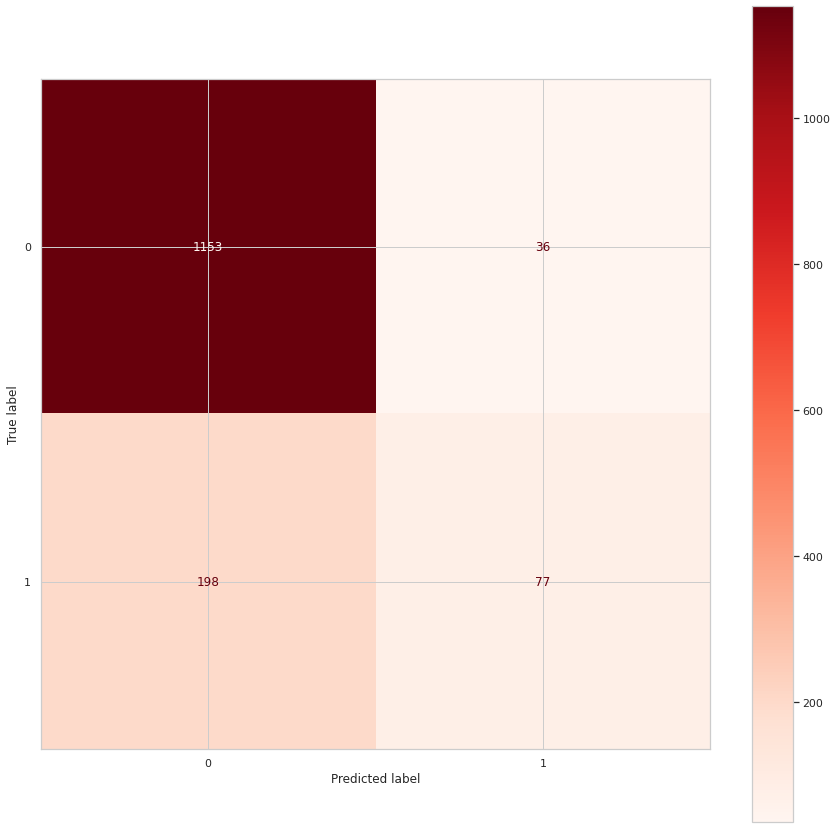

In [122]:
# confusion matrix of train and test
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(my_pipeline_4, X_train, y_train, cmap='Reds'))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(my_pipeline_4, X_test, y_test, cmap='Reds'))

Inference:
- Berdasarkan hasil evaluasi model `AdaBoostClassifier` menggunakan `accuracy score` menunjukkan bahwa accuracy score train (0.85) dan accuracy score test  (0.84), artinya model ini dapat dikatakan `goodfit`. Namun karena data yang kita punya tidak balance, maka tidak disarankan untuk melihat performansi model dari `accuracy score`.
- Berdasarkan classification report data train, hasilnya menunjukkan bahwa score precision-score yang dimiliki oleh label 1 adalah `0.75` sedangkan pada classification report data test menunjukkan scorenya adalah `0.68`. Artinya, bahwa model `AdaBoostClassifier` ini bisa dikatakan `overfit` atau sederhananya model ini hanya baik untuk memprediksi label 1 pada data train saja.
- Hal ini dapat dibuktikan dengan `confusion matrix`. Misalnya pada data test. Dapat dilihat bahwa `False Negative` dan `False Positive` tinggi. 
  1. `False Negative` terjadi ketika model `memprediksikan` bahwa seseorang `tidak mengambil paket perjalanan`, padahal aktualnya orang ini mengambil paket perjalanan. Model ini sudah melakukan salah prediksi sebanyak 198 orang.
  2. `False Positive` terjadi ketika model `memprediksikan` bahwa seseorang `membeli paket perjalanan`, padahal aktualnya orang ini tidak membeli paket perjalanan. Model ini sudah melakukan salah prediksi sebanyak 36 orang.

### Gradient Boosting

In [123]:
# define model
model_gb = GradientBoostingClassifier(random_state=42)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline_5 = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_gb)
                             ])

# Preprocessing of training data, fit model 
my_pipeline_5.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age',
                                                   'preferredpropertystar',
                                                   'monthlyincome']),
                                                 ('cat1',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['occupation',
                                                   'maritalstatus',
                                                   'passport']),
                                                 ('cat2',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['citytier',
                                                   'designation'])])),
                ('model', GradientBoostingClassifier(random_state=42))])

In [124]:
# Preprocessing and get predictions
y_pred_train_5 = my_pipeline_5.predict(X_train)
y_pred_test_5 = my_pipeline_5.predict(X_test)

# Check Performance Model against Train-Set
print('precision_score - Train Set  : ', precision_score (y_train, y_pred_train_5), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_5), '\n')

# Check Performance Model against Test-Set
print('precision_score - Test Set  : ', precision_score(y_test, y_pred_test_5), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_5), '\n')

precision_score - Train Set  :  0.8506493506493507 

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      2774
           1       0.85      0.41      0.55       640

    accuracy                           0.88      3414
   macro avg       0.86      0.70      0.74      3414
weighted avg       0.87      0.88      0.86      3414
 

precision_score - Test Set  :  0.744 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.97      0.92      1189
           1       0.74      0.34      0.47       275

    accuracy                           0.85      1464
   macro avg       0.80      0.66      0.69      1464
weighted avg       0.84      0.85      0.83      1464
 



Confusion Matrix      : 
Confusion Matrix      : 


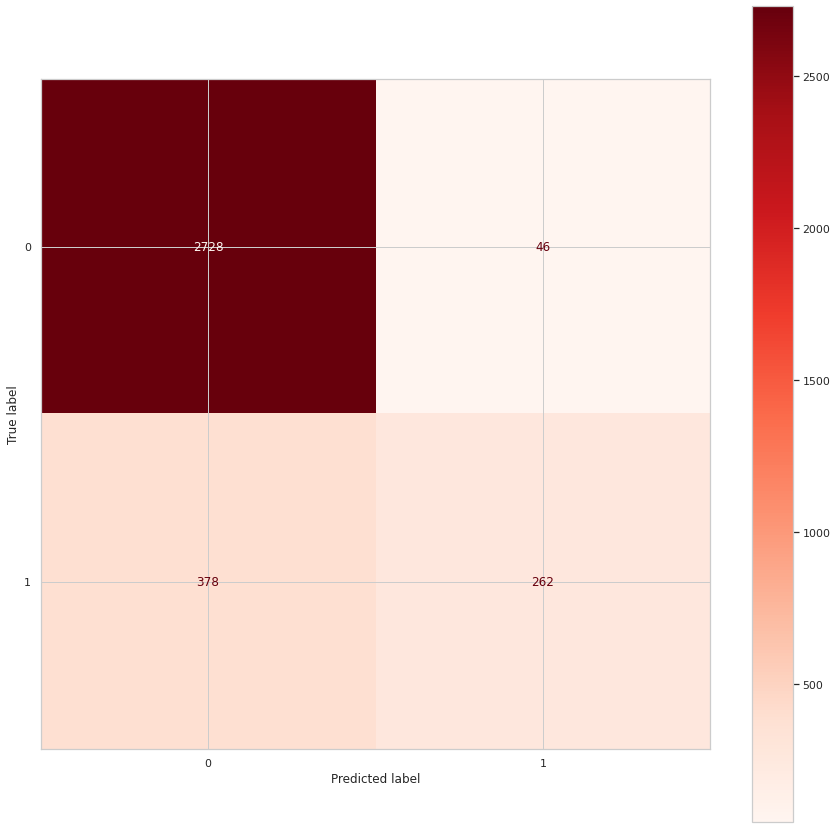

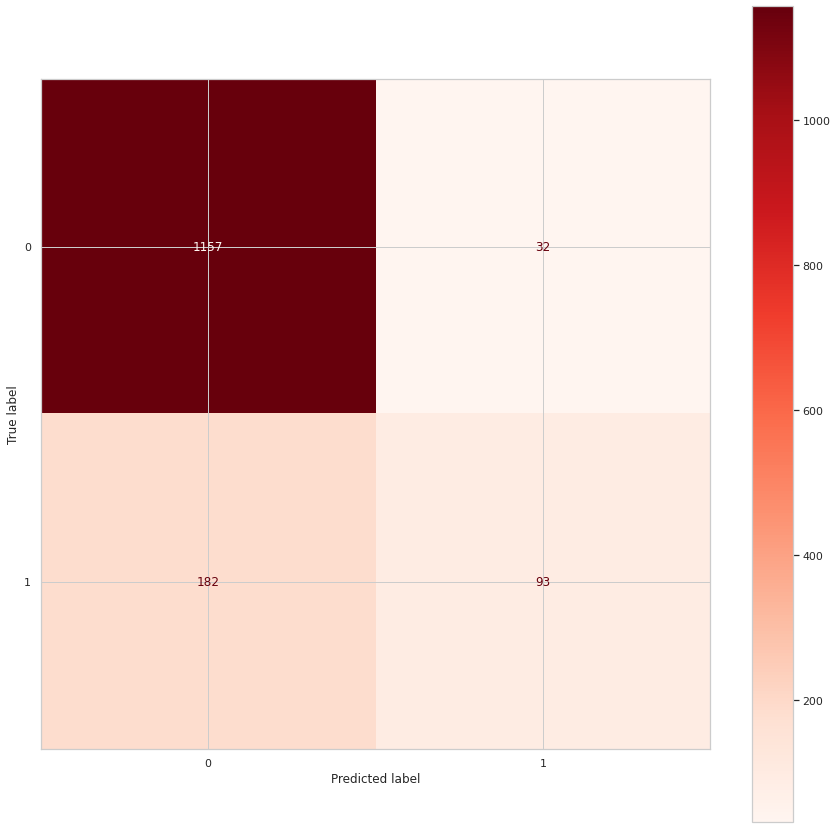

In [125]:
# confusion matrix of train and test
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(my_pipeline_5, X_train, y_train, cmap='Reds'))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(my_pipeline_5, X_test, y_test, cmap='Reds'))

Inference:
- Berdasarkan hasil evaluasi model `Gradient Boosting` menggunakan `accuracy score` menunjukkan bahwa accuracy score train (0.88) dan accuracy score test  (0.85), artinya model ini dapat dikatakan `goodfit`. Namun karena data yang kita punya tidak balance, maka tidak disarankan untuk melihat performansi model dari `accuracy score`.
- Berdasarkan classification report data train, hasilnya menunjukkan bahwa score precision-score yang dimiliki oleh label 1 adalah `0.85` sedangkan pada classification report data test menunjukkan scorenya adalah `0.74`. Artinya, bahwa model `Gradient Boosting` ini bisa dikatakan `overfit` atau sederhananya model ini hanya baik untuk memprediksi label 1 pada data train saja.
- Hal ini dapat dibuktikan dengan `confusion matrix`. Misalnya pada data test. Dapat dilihat bahwa `False Negative` dan `False Positive` tinggi. 
  1. `False Negative` terjadi ketika model `memprediksikan` bahwa seseorang `tidak mengambil paket perjalanan`, padahal aktualnya orang ini mengambil paket perjalanan. Model ini sudah melakukan salah prediksi sebanyak 182 orang.
  2. `False Positive` terjadi ketika model `memprediksikan` bahwa seseorang `membeli paket perjalanan`, padahal aktualnya orang ini tidak membeli paket perjalanan. Model ini sudah melakukan salah prediksi sebanyak 32 orang.

### XGBoost

In [126]:
# define model
model_xgb = XGBClassifier(random_state=42)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline_6 = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_xgb)
                             ])

# Preprocessing of training data, fit model 
my_pipeline_6.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age',
                                                   'preferredpropertystar',
                                                   'monthlyincome']),
                                                 ('cat1',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['occupation',
                                                   'maritalstatus',
                                                   'passport']),
                                                 ('cat2',
                                                  Pipeline(steps...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=42, ...))])

In [127]:
# Preprocessing and get predictions
y_pred_train_6 = my_pipeline_6.predict(X_train)
y_pred_test_6 = my_pipeline_6.predict(X_test)

# Check Performance Model against Train-Set
print('precision_score - Train Set  : ', precision_score (y_train, y_pred_train_6), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_6), '\n')

# Check Performance Model against Test-Set
print('precision_score - Test Set  : ', precision_score(y_test, y_pred_test_6), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_6), '\n')

precision_score - Train Set  :  0.9880749574105622 

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2774
           1       0.99      0.91      0.95       640

    accuracy                           0.98      3414
   macro avg       0.98      0.95      0.97      3414
weighted avg       0.98      0.98      0.98      3414
 

precision_score - Test Set  :  0.8089887640449438 

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1189
           1       0.81      0.52      0.64       275

    accuracy                           0.89      1464
   macro avg       0.85      0.75      0.78      1464
weighted avg       0.88      0.89      0.88      1464
 



Confusion Matrix      : 
Confusion Matrix      : 


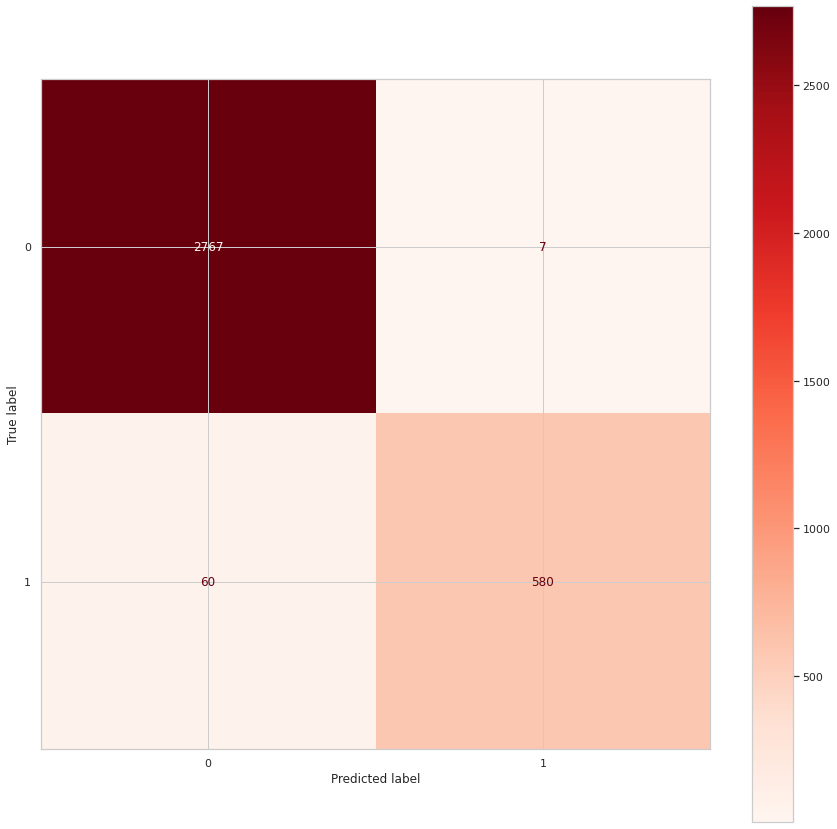

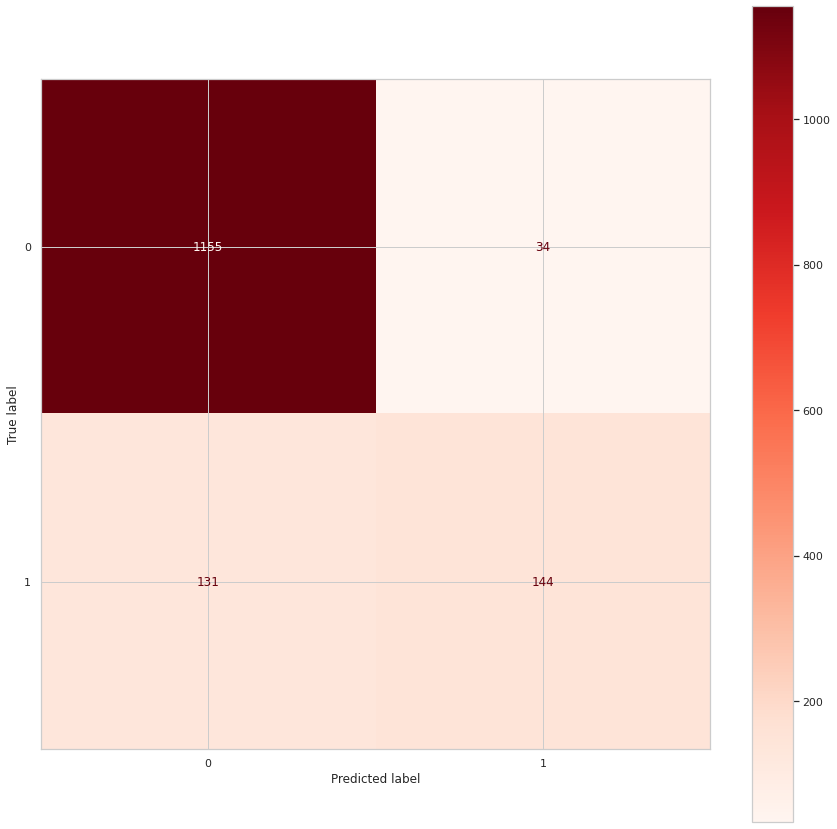

In [128]:
# confusion matrix of train and test
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(my_pipeline_6, X_train, y_train, cmap='Reds'))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(my_pipeline_6, X_test, y_test, cmap='Reds'))

Inference:
- Berdasarkan hasil evaluasi model `XGBoost` menggunakan `accuracy score` menunjukkan bahwa accuracy score train (0.98) dan accuracy score test  (0.89), artinya model ini dapat dikatakan `goodfit`. Namun karena data yang kita punya tidak balance, maka tidak disarankan untuk melihat performansi model dari `accuracy score`.
- Berdasarkan classification report data train, hasilnya menunjukkan bahwa score precision-score yang dimiliki oleh label 1 adalah `0.98` sedangkan pada classification report data test menunjukkan scorenya adalah `0.81`. Artinya, bahwa model `XGBoost` ini bisa dikatakan `overfit` atau sederhananya model ini hanya baik untuk memprediksi label 1 pada data train saja.
- Hal ini dapat dibuktikan dengan `confusion matrix`. Misalnya pada data test. Dapat dilihat bahwa `False Negative` dan `False Positive` tinggi. 
  1. `False Negative` terjadi ketika model `memprediksikan` bahwa seseorang `tidak mengambil paket perjalanan`, padahal aktualnya orang ini mengambil paket perjalanan. Model ini sudah melakukan salah prediksi sebanyak 131 orang.
  2. `False Positive` terjadi ketika model `memprediksikan` bahwa seseorang `membeli paket perjalanan`, padahal aktualnya orang ini tidak membeli paket perjalanan. Model ini sudah melakukan salah prediksi sebanyak 34 orang.

## Hyperparameter Tuning

Berdasarkan hasil evaluasi model di atas, didapatkan bahwa model terbaik adalah `Logistic Regression`. Model ini memiliki precision-score yang `goodfit` untuk data train dan data test. Kemudian, jika dilihat pada cross validation score yang sebelumnya, dapat disimpulkan bahwa model ini konsisten. Sehingga disini yang akan Saya lakukan `Hyperparameter Tuning` dengan `GridSearchCV`adalah model `Logistic Regression`.

In [129]:
# declare parameters for hyperparameter tuning
param_grid = {'model__C': [0.01, 0.1, 1, 10, 100],
              'model__penalty': ['l1', 'l2', 'elasticnet', None],
              'model__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
              'model__max_iter': [100, 150, 200, 250, 300],
              'model__multi_class': ['auto', 'ovr', 'multinomial']}
param_grid

{'model__C': [0.01, 0.1, 1, 10, 100],
 'model__penalty': ['l1', 'l2', 'elasticnet', None],
 'model__solver': ['lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga'],
 'model__max_iter': [100, 150, 200, 250, 300],
 'model__multi_class': ['auto', 'ovr', 'multinomial']}

In [130]:
# Train with GridSearhCV from pipeline
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

grid = GridSearchCV(my_pipeline_1, param_grid, cv=skf, scoring='precision')
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['age',
                                                                          'preferredpropertystar',
                                                                          'monthlyincome']),
                                                                        ('cat1',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unkn...
                                                                         ['citytier',
                                                                          'designation'])])),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             param_grid={'model__C': [0.01, 0.1, 1, 10, 100],
                         'model__max_iter': [100, 150, 200, 250, 300],
                         'model__multi_class': ['auto', 'ovr', 'multinomial'],
                         'model__penalty': ['l1', 'l2', 'elasticnet', None],
                         'model__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                           'newton-cholesky', 'sag', 'saga']},
             scoring='precision')

In [131]:
# Get Best Accuracy on Cross Validation
logreg_best_accuracy = grid.best_score_
print('Accuracy on Cross Validation set :', logreg_best_accuracy)

Accuracy on Cross Validation set : 0.96


In [132]:
# Get Best Hyperparameters
logreg_best_hyperparameter = grid.best_params_
print('Best Hyperparameter :', logreg_best_hyperparameter)

Best Hyperparameter : {'model__C': 0.01, 'model__max_iter': 100, 'model__multi_class': 'auto', 'model__penalty': 'l2', 'model__solver': 'lbfgs'}


In [133]:
# Get Best Estimator
logreg_best_estimator = grid.best_estimator_
print('Best Estimator :', logreg_best_estimator)

Best Estimator : Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age',
                                                   'preferredpropertystar',
                                                   'monthlyincome']),
                                                 ('cat1',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['occupation',
                                    

In [134]:
# Cross Validation using `cross_val_score`
%%time

precision_score_train_cross_val = cross_val_score(logreg_best_estimator, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=skf, 
                                                  scoring='precision')

print('precision Score - All - Cross Validation  : ', precision_score_train_cross_val)
print('precision Score - Mean - Cross Validation : ', precision_score_train_cross_val.mean())
print('precision Score - Std - Cross Validation  : ', precision_score_train_cross_val.std())
print('precision Score - Range of Test-Set       : ', (precision_score_train_cross_val.mean()-precision_score_train_cross_val.std()) , '-', (precision_score_train_cross_val.mean()+precision_score_train_cross_val.std()))

precision Score - All - Cross Validation  :  [1.  1.  1.  1.  0.8]
precision Score - Mean - Cross Validation :  0.96
precision Score - Std - Cross Validation  :  0.07999999999999999
precision Score - Range of Test-Set       :  0.88 - 1.04
CPU times: user 273 ms, sys: 187 ms, total: 461 ms
Wall time: 246 ms


Precision Score - Train Set  :  0.9642857142857143 

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90      2774
           1       0.96      0.04      0.08       640

    accuracy                           0.82      3414
   macro avg       0.89      0.52      0.49      3414
weighted avg       0.85      0.82      0.75      3414
 

Confusion Matrix      : 


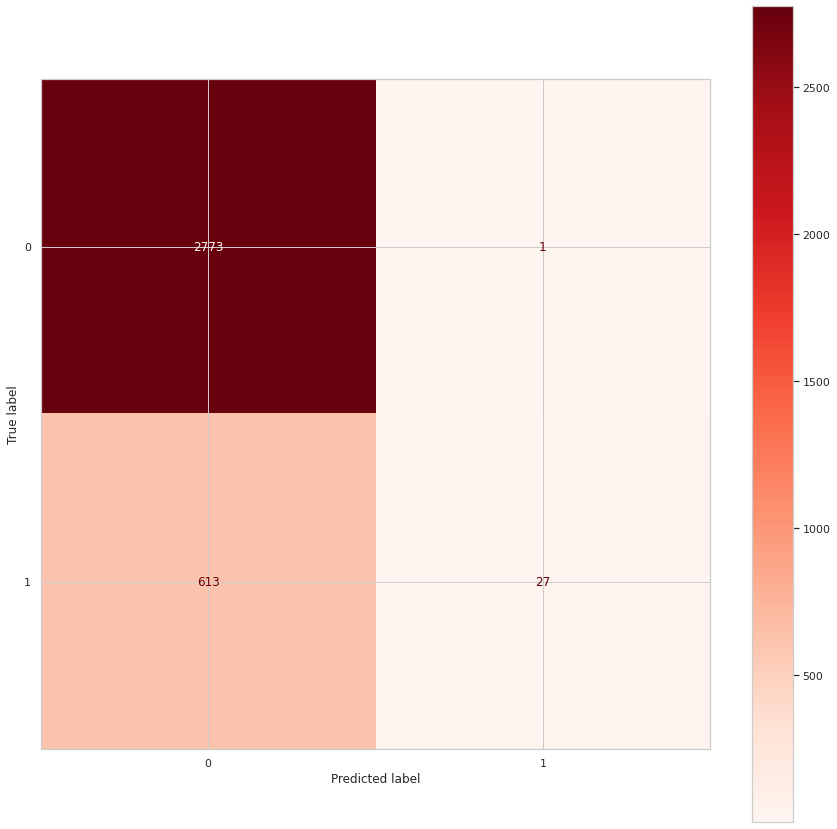

In [135]:
# Check Performance Model against Train-Set

y_pred_train = logreg_best_estimator.predict(X_train)

print('Precision Score - Train Set  : ', precision_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(logreg_best_estimator, X_train, y_train, cmap='Reds'))

Precision Score- Test Set   :  0.9 

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90      1189
           1       0.90      0.07      0.12       275

    accuracy                           0.82      1464
   macro avg       0.86      0.53      0.51      1464
weighted avg       0.84      0.82      0.76      1464
 

Confusion Matrix      : 


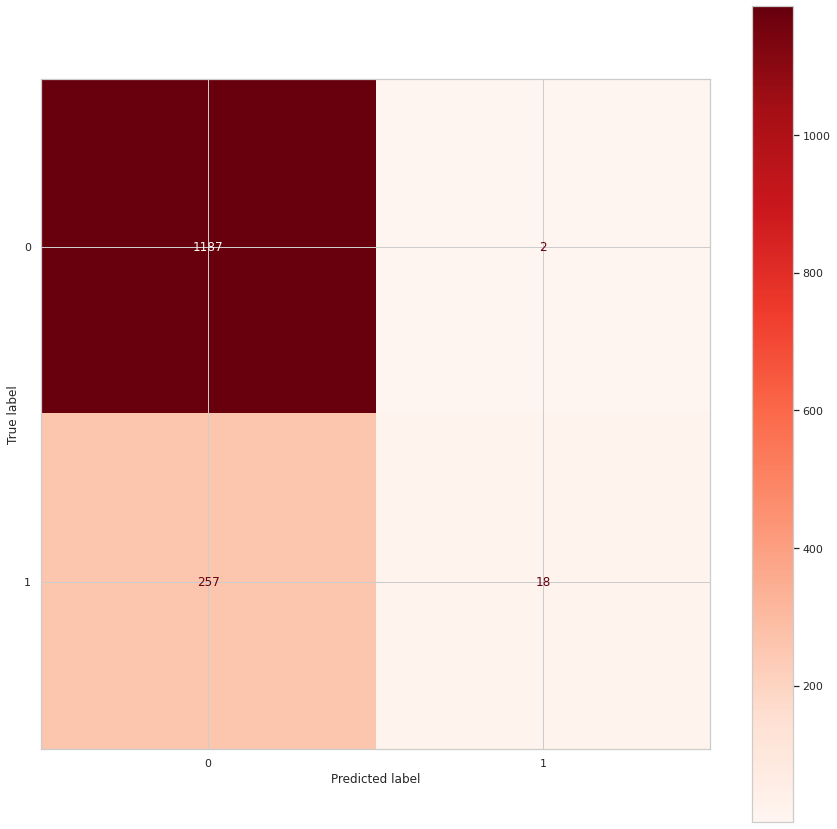

In [136]:
# Check Performance Model against Test-Set

y_pred_test = logreg_best_estimator.predict(X_test)

print('Precision Score- Test Set   : ', precision_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(logreg_best_estimator, X_test, y_test, cmap='Reds'))

Berdasarkan hasil evaluasi model `Logistic Regression` setelah dilakukan `Hyperparameter Tuning` dengan `GridSearcCV`, kita dapat melihat bahwa model ini `goodfit` ketika menggunakan best hyperparameter `{'model__C': 0.01, 'model__max_iter': 100, 'model__multi_class': 'auto', 'model__penalty': 'l2', 'model__solver': 'lbfgs'}`. <br>

Dibuktikan dengan hasil Precision-score pada data train yaitu `0.96` dan data test yaitu `0.90`. Terlihat bahwa setelah dilakukan hyperparameter tuning, Precision-score mengalami kenaikan jika dibandingkan dengan Precision-score sebelum dilakukan hyperparameter tuning (baseline model Logistic Regression) yang tadinya pada data train menunjukkan Precision-score yaitu `0.71` dan data test yaitu `0.69`.<br>

Sekilas kita melihat bahwa performansi model ini masih `overfit`. Namun ketika dilakukan cross validation, model ini memiliki nilai rata-rata/mean Precision-score `0.96` dan standar deviasinya juga kecil `0.07`. Sehingga sebenarnya model ini konsisten bagusnya.<br>

Hal ini dapat dibuktikan dengan `confusion matrix`. Misalnya pada data train. Dapat dilihat bahwa `False Negative`-nya tinggi namun `False Positive`-nya rendah. <br>
  1. `False Negative` terjadi ketika model `memprediksikan` bahwa seseorang `tidak mengambil paket perjalanan`, padahal aktualnya orang ini mengambil paket perjalanan. Model ini sudah melakukan salah prediksi sebanyak 613 orang.
  2. `False Positive` terjadi ketika model `memprediksikan` bahwa seseorang `membeli paket perjalanan`, padahal aktualnya orang ini tidak membeli paket perjalanan. Model ini sudah melakukan salah prediksi sebanyak 1 orang.<br>

Sama kondisinya dengan `confusion matrix` pada data test. Dapat dilihat bahwa `False Negative`-nya tinggi dan `False Positive`-nya rendah. <br>
  1. `False Negative` terjadi ketika model `memprediksikan` bahwa seseorang `tidak mengambil paket perjalanan`, padahal aktualnya orang ini mengambil paket perjalanan. Model ini sudah melakukan salah prediksi sebanyak 257 orang.
  2. `False Positive` terjadi ketika model `memprediksikan` bahwa seseorang `membeli paket perjalanan`, padahal aktualnya orang ini tidak membeli paket perjalanan. Model ini sudah melakukan salah prediksi sebanyak 2 orang.

### ROC-AUC

In [137]:
# Get FPR, TPR, and AUC Score from Logistic Regression

y_pred_proba_logreg = logreg_best_estimator.predict_proba(X_test)[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_logreg)
auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)

print('AUC Score : ', auc_logreg)

AUC Score :  0.7459668170349416


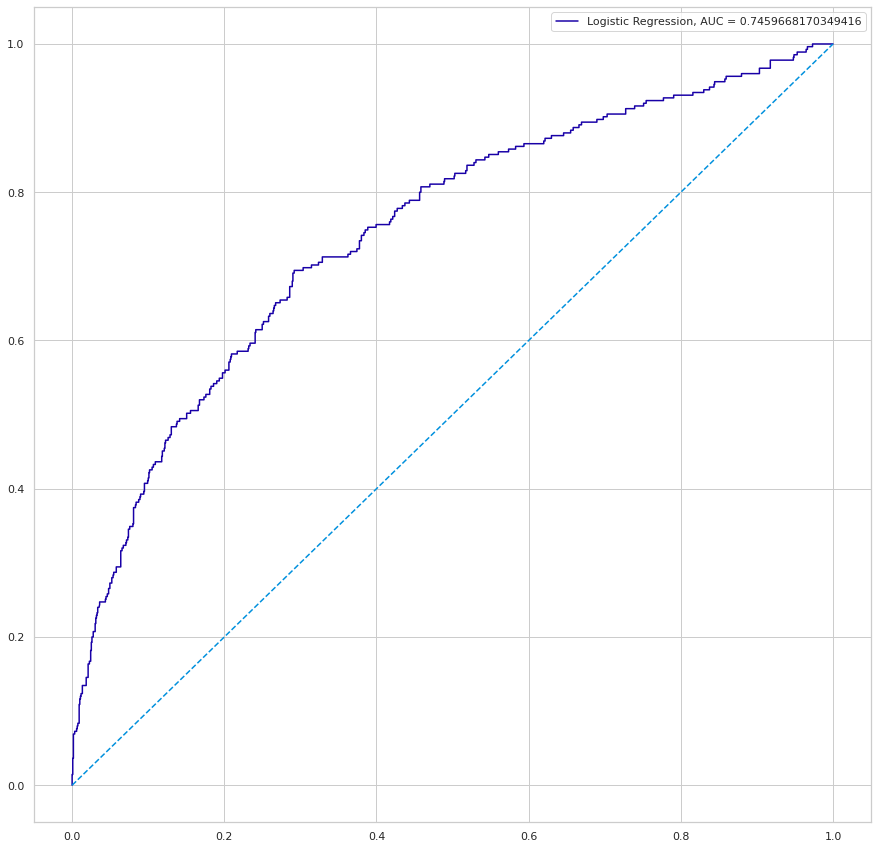

In [138]:
# Plot ROC-AUC Curve

plt.figure(0).clf()
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression, AUC = ' + str(auc_logreg))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=0)

# ix. Model Saving

>Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model. **Dengan melihat hasil Model Evaluation, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan Model Inference dan Model Deployment.**

In [139]:
# Save the Files of Logistic Regression after hyperparameter tuning

with open('logreg_best_estimator.pkl', 'wb') as file_1:
  pickle.dump(logreg_best_estimator, file_1)

# x. Model Inference (`notebook terpisah`)

>Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled. Gunakan model terbaik berdasarkan hasil Model Evaluation.

Pada bagian ini akan dilakukan proses model inference dengan menggunakan data `inference set` dan melakukan preprocessing yang sama seperti yang dilakukan sebelumnya **(tanpa proses handling outlier)** serta melakukan prediksi terhadap data `inference-set`.

# xi. Pengambilan Kesimpulan

>Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

## EDA, Model, and Overall Analysis

Berdasarkan proses **EDA** yang sudah dilakukan, kita memperoleh insight bahwa:
- Dari Univariate analysis: <br>
  A. Observasi data numerik<br>
  1. Kebanyakan customer berusia `31-44 tahun`
  2. Kebanyakan durasi promosi dari sales ke customer sekitar 9-20 menit
  3. Kebanyakan jumlah total orang yang berencana melakukan perjalanan bersama pelanggan sekitar `3 orang`
  4. Kebanyakan jumlah tindak lanjut yang telah dilakukan oleh sales setelah promosi penjualan adalah `4 follow-ups`
  5. Sebagian besar pelanggan lebih memilih akomodasi hotel `bintang 3`
  6. Sebagian besar pelanggan telah melakukan `3 perjalanan` dalam setahun, sementara ada nilai yang ekstrim seperti `22 perjalanan` dalam setahun
  7. Sebagian besar pelanggan memberikan `3 bintang` sebagai skor kepuasan promosi penjualan
  8. Sebagian besar pelanggan memiliki `1 anak` dengan usia kurang dari 5 tahun yang berencana melakukan perjalanan bersama pelanggan
  9. Sebagian besar pelanggan memiliki pendapatan dalam rentang `~20K sampai ~25k`<br>

  B. Observasi data kategorik<br>
  1. `~39%` berada di kelompok usia `31-40`. Hanya `~11%` pelanggan berusia `50+`.
  2. `70,5%` pelanggan atau sebanyak `3.444` pelanggan `bertanya sendiri` mengenai paket perjalanan.
  3. `~65%` pelanggan atau sebanyak `3.190` pelanggan `berasal dari kota Tier 1`.
  4. `~49%` pelanggan atau sebanyak `2.368` pelanggan itu pekerjaannya `salaried` atau menerima gaji.
  5. `60%` pelanggan atau sebanyak `2.916` pelanggan adalah `laki-laki`.
  6. `Paket perjalanan Basic` ditawarkan kepada `~38%` pelanggan atau `1.842` pelanggan dan `35%` atau `1.732` pelanggan ditawarkan `Paket Deluxe`.
  7. `~48% `pelanggan `sudah menikah`.
  8. `~71%` pelanggan `tidak memiliki paspor`, sementara `~29%` pelanggan `memiliki paspor`.
  9. `~62%` atau sebanyak `3.032` pelanggan `memiliki mobil`.
  10. `~38%` atau `1.842` pelanggan adalah `Eksekutif`, diikuti oleh `35%` atau `1.732` pelanggan sebagai `Manajer`.
  11. `~67%` atau `3.295` pelanggan memiliki pendapatan bulanan pelanggan berkisar antara `10K+ hingga 25K`.
  12. `~19%` atau `920` pelanggan `membeli dan menerima paket perjalanan` yang ditawarkan. Sementara `~81%` atau `3.968` pelanggan tidak `membeli paket perjalanan`.<br>

- Dari Bivariate analysis:<br>
  1. Orang yang `lebih muda` tampaknya lebih memilih paket perjalanan daripada orang yang `lebih tua`. Kelompok pelanggan yang berusia `18-30 tahun` memiliki kecenderungan untuk `membeli paket perjalanan` dibandingkan dengan kelompok usia lainnya.
  2. Orang yang sudah mempunyai `follow up lebih banyak`, cenderung membeli paket.
  3. Orang yang menyukai `properti dengan rating tinggi`, cenderung membeli paket perjalanan.
  4. Orang dengan `durasi promosi yang lama` tampaknya lebih memilih paket perjalanan.
  5. Orang dengan kisaran pendapatan `18K hingga 24K` per bulan tampaknya lebih cenderung banyak membeli paket perjalanan. Sebaliknya, Pelanggan berpenghasilan `<10K atau >50K` per bulan, lebih cenderung `tidak membeli paket perjalanan`.
  6. Sebagian besar pelanggan melakukan `penyelidikan sendiri` untuk paket perjalanannya. Namun, keputusan pelanggan memilih untuk mengambil paket atau tidak itu tampaknya tidak bergantung pada `typeofcontact`.
  7. Sebagian besar pelanggan `berasal dari Kota Tier 1`. Namun pelanggan yang `berasal dari Kota Tier 2 dan 3` tampaknya sedikit lebih tertarik untuk membeli paket perjalanan.
  8. Sebagian besar pelanggan memiliki pekerjaan yang `digaji` atau menjalankan `bisnis kecil`. Hanya ada 2 pekerja lepas atau `freelancers` yang benar-benar membeli paket perjalanan. Selain itu, orang yang menjalankan `bisnis besar` atau `large business` yang lebih banyak cenderung memilih untuk membeli paket daripada orang yang menjalankan `bisnis kecil` maupun orang yang pekerjaannya `digaji`.
  9. Hampir `60%` pelanggan adalah pria. Namun kecenderungan membeli paket perjalanan tampaknya tidak dipengaruhi oleh jenis kelamin pelanggan.
  10. `Basic` dan `Deluxe` adalah dua paket yang ditawarkan kepada sebagian besar pelanggan. Namun, orang-orang cenderung lebih banyak membeli paket perjalanan ketika ditawarkan dengan `paket Basic` dan `paket Standard`.
  11. Sebagian besar pelanggan `sudah menikah`. Namun, orang yang `Single` dan `Unmarried` cenderung lebih banyak membeli paket perjalanan dari kategori lainnya.
  12. Sebagian besar pelanggan `tidak memiliki paspor`. Namun, orang yang `memiliki paspor` cenderung lebih banyak membeli paket perjalanan daripada orang yang `tidak memiliki paspor`.
  13. Sebagian besar pelanggan `memiliki mobil pribadi`. Kepemilikan mobil tampaknya tidak berdampak pada kecenderungan pembelian paket perjalanan.
  14. Sebagian besar pelanggan adalah `Eksekutif` dan `Manajer`. Pelanggan yang posisinya `Eksekutif` tampaknya memiliki kecenderungan yang lebih tinggi untuk membeli paket perjalanan.
  15. Variabel penting yang mungkin mempengaruhi kecenderungan pembelian paket perjalanan, adalah:<br>
      - Age/Age bin
      - Number of follow-ups
      - Preferred property rating
      - Income/Income bin
      - City Tier
      - Occupation
      - Product Pitched
      - Marital Status
      - Passport
      - Designation
<br>

- Dari Multivariate analysis:<br>
  1. Monthly Income vs (categorical variable) by prodtaken:<br>
    - Secara keseluruhan, pelanggan dengan kisaran pendapatan `15K hingga 40K` memiliki kecenderungan lebih tinggi untuk membeli paket perjalanan
    - Pelanggan dengan kisaran pendapatan yang lebih tinggi memiliki kecenderungan yang lebih tinggi untuk membeli paket perjalanan `paket King dan Super Deluxe` 
    - Pelanggan dengan posisi `VP` memiliki kisaran pendapatan yang lebih tinggi dan kecenderungan yang lebih tinggi untuk membeli paket perjalanan<br>
  2. Age vs (categorical variable) by prodtaken:<br>
    - Secara keseluruhan, `semakin rendah usia pelanggan` maka `semakin besar kecenderungan untuk membeli paket perjalanan` tersebut
    - `Pelanggan yang lebih tua` yang ditawarkan `Paket King` memiliki kecenderungan yang lebih tinggi untuk membeli paket perjalanan
    - `VP, Manager dan Senior Manager` memiliki kecenderungan yang lebih tinggi untuk membeli paket perjalanan ketika usianya lebih tinggi. Ini karena usia sedikit berkorelasi dengan posisi saat ini
    - `Pelanggan yang lebih tua` dengan `kisaran gaji 25K+ hingga 50K` memiliki kecenderungan lebih tinggi untuk membeli paket perjalanan. Ini karena usia sedikit berkorelasi dengan pendapatan<br>
  3. Number of Followups vs (categorical variable) by prodtaken:<br>
    - Secara keseluruhan, `semakin tinggi jumlah follow-ups`, maka `semakin besar kecenderungan untuk membeli paket perjalanan`
    - Pelanggan di `kota tier 2 dan 3` memiliki kecenderungan lebih tinggi untuk membeli paket perjalanan dimana jumlah follow up lebih tinggi
    - Pelanggan yang merupakan `freelancers`, `salaried`, atau menjalankan `bisnis kecil/small business` memiliki kecenderungan lebih tinggi untuk membeli paket perjalanan yang jumlah follow-ups-nya lebih tinggi
    - Pelanggan yang ditawarkan `paket Basic, Deluxe dan King` memiliki kecenderungan yang lebih tinggi untuk membeli paket travel dimana jumlah follow-ups lebih tinggi
    - Pelanggan dengan posisi `Executive, Manager dan VP` memiliki kecenderungan yang lebih tinggi untuk membeli paket perjalanan dimana jumlah follow-ups-nya lebih tinggi
    - Pelanggan dengan kisaran gaji `10K+ hingga 50K `memiliki kecenderungan lebih tinggi untuk membeli paket perjalanan yang jumlah follow-ups-nya lebih tinggi<br>
  4. Preferred Property Rating vs (categorical variable) by prodtaken:<br>
    - Secara keseluruhan, `semakin tinggi peringkat properti`, maka `semakin besar kecenderungan untuk membeli produk tersebut`
    - Pelanggan di `kota tier 1 dan 2` memiliki kecenderungan yang lebih tinggi untuk membeli paket perjalanan di mana properti berperingkat lebih tinggi
    - Pelanggan yang pekerjaannya `salaried` atau `menjalankan bisnis besar/large business` memiliki kecenderungan lebih tinggi untuk membeli paket perjalanan di mana properti berperingkat lebih tinggi
    - Pelanggan `Pria` memiliki kecenderungan lebih tinggi untuk membeli paket perjalanan di mana properti berperingkat lebih tinggi
    - Pelanggan yang ditawarkan `paket Standard, Deluxe, dan Basic` memiliki kecenderungan yang lebih tinggi untuk membeli paket perjalanan di mana properti tersebut berperingkat lebih tinggi
    - Pelanggan `tanpa paspor` memiliki kecenderungan yang lebih tinggi untuk membeli paket perjalanan di mana properti dinilai lebih tinggi
    - Pelanggan dengan posisi sebagai `Eksekutif, Manajer dan Manajer Senior` memiliki kecenderungan yang lebih tinggi untuk membeli paket perjalanan di mana properti berperingkat lebih tinggi
    - Pelanggan yang `lebih muda (18-40 tahun)` memiliki kecenderungan lebih tinggi untuk membeli paket perjalanan di mana properti berperingkat lebih tinggi
    - Pelanggan dengan rentang `gaji 10K+ hingga 50K` memiliki kecenderungan yang lebih tinggi untuk membeli paket perjalanan di mana properti tersebut dinilai lebih tinggi.<br>

- Customer Profiling for Purchased Products:<br>
  **Observasi CUSTOMER PROFILE** <br>
  1. Trend untuk sebagian besar pelanggan yang membeli `paket Basic`:<br>
    - `Age Group`: 25 - 35
    - `Contacted by`: Self
    - `Gender`: Male
    - `City Tier`: 1
    - `Occupation`: Salaried
    - `Number of Persons Visiting`: 2 - 3
    - `Marital Status`: Single
    - `Designation`: Executives
    - `Monthly Income Mean`: ~20K (<25K)
    - `Passport`: Yes
    - `Own car`: Yes <br>
  2. Trend untuk sebagian besar pelanggan yang membeli `paket Standard`:<br>
    - `Age Group`: 33 - 49
    - `Contacted by`: Self
    - `Gender`: Male
    - `City Tier`: 3
    - `Occupation`: Small Business
    - `Number of Persons Visiting`: 2 - 3
    - `Marital Status`: Married
    - `Designation`: Senior Managers
    - `Monthly Income Mean`: ~26K (<30K)
    - `Passport`: No
    - `Own car`: Yes <br>
  3. Trend untuk sebagian besar pelanggan yang membeli `paket Deluxe`:<br>
    - `Age Group`: 21 - 44
    - `Contacted by`: Self
    - `Gender`: Male
    - `City Tier`: 3
    - `Occupation`: Small Business
    - `Number of Persons Visiting`: 2 - 3
    - `Marital Status`: Married
    - `Designation`: Manager
    - `Monthly Income Mean`: ~23K (<25K)
    - `Passport`: No
    - `Own car`: Yes <br>
  4. Trend untuk sebagian besar pelanggan yang membeli `paket Super Deluxe`:<br>
    - `Age Group`: 39 - 45
    - `Contacted by`: Company
    - `Gender`: Male
    - `City Tier`: 3
    - `Occupation`: Salaried
    - `Number of Persons Visiting`: 2 - 3
    - `Marital Status`: Single
    - `Designation`: AVP
    - `Monthly Income Mean`: ~30K (<30K)
    - `Passport`: Yes
    - `Own car`: Yes <br>
  5. Trend untuk sebagian besar pelanggan yang membeli `paket King`:<br>
    - `Age Group`: 42 - 56
    - `Contacted by`: Self
    - `Gender`: Female
    - `City Tier`: 1
    - `Occupation`: Small business
    - `Number of Persons Visiting`: 2 - 3
    - `Marital Status`: Single
    - `Designation`: VP
    - `Monthly Income Mean`: ~35K (<35K)
    - `Passport`: Yes
    - `Own car`: Yes <br>

- Overall observations on patterns:<br>
  1. Pelanggan dari `usia 18 - 30` membeli paket perjalanan, yang diikuti oleh pelanggan yang berusia `31 - 40 tahun`.
  2. Pelanggan yang memiliki `Monthly Income` sekitar `15K - 25K` membeli paket perjalanan, diikuti pelanggan dengan kisaran pendapatan `25K - 50K`.
  3. Sebagian besar pelanggan dengan kunjungan  sekitar `2 - 4` yang membeli beberapa paket perjalanan.
  4. Sebagian besar pelanggan yang membeli paket perjalanan adalah pelanggan dengan posisi `Executive` dan `Senior Manager`.
  5. Pelanggan yang ditindaklanjuti `6 kali` yang membeli paket perjalanan.
  6. `Pelanggan yang diundang perusahaan` itu sebagian besar membeli paket dan memilih `properti berperingkat 5` dan sebagian besar berasal dari `tingkat kota 2,3`.
  7. Pelanggan sebagian besar mengambil `basic package`, diikuti `standard`. Asumsinya disini karena biaya yang terlibat.
  8. Sebagian besar Pelanggan yang `memiliki paspor` membeli paket perjalanan.
  9. `FreeLancers` dan `Large Business` memiliki peluang lebih tinggi untuk membeli paket perjalanan. Namun, karena hanya ada 2 titik data untuk freelancer, hal ini dapat menimbulkan bias.
  10. Pelanggan yang `Single` dan `belum menikah(unmarried)` memiliki peluang lebih tinggi untuk membeli paket perjalanan.
  11. Pelanggan yang melakukan `7 - 8 perjalanan` memiliki peluang lebih tinggi untuk membeli paket perjalanan.
  12. Untuk variabel `'Gender', 'numberofchildrenvisiting', 'owncar'` sepertinya tidak mempunyaia hubungan yang signifikan terhadap keputusan pelanggan membeli paket perjalanan.
  13. Produk terjual saat `ditindaklanjuti berkali-kali`, dengan `durasi promosi produk yang lebih tinggi`, dan saat `Paket Basic` ditawarkan.<br>

Model yang dibuat akan menganalisis pelanggan baru. Maka data interaksi pelanggan dengan sales seperti `'durationofpitch', 'numberoffollowups', 'productpitched', 'pitchsatisfactionscore'` itu tidak dimasukkan ke dalam model. Kemudian `typeofcontact` juga dapat dihapus karena semua pelanggan baru akan dihubungi oleh perusahaan. Kolom `income_bin` dan `age_bin` akan dihapus juga karena ini digunakan untuk membantu proses EDA saja.<br> Untuk variabel yang tidak signifikan dengan target seperti `'numberoftrips', 'gender', 'numberofpersonvisiting',
'owncar' dan 'numberofchildrenvisiting'` juga tidak digunakan dalam model.<br>

Jadi, yang digunakan dalam model yaitu:<br>
- passport
- age
- maritalstatus
- designation
- occupation
- monthlyincome
- preferredpropertystar
- citytier <br>

Algoritma `Supervised learning` yang dipakai adalah:<br>
   - `Logistic Regression`. Algoritma ini baik digunakan untuk kasus klasifikasi ketika data kita memiliki hubungan linear antara variabel independen dengan target. Namun, jika data kita tidak linear, model ini tidak cukup bagus untuk memprediksi karena kesalahan dalam memilih variabel untuk dimasukkan ke dalam model.<br>
   - `Decision Tree`, `Random Forest`, `AdaBoostClassifier`, `Gradient Boosting`, `XGBoost` merupakan Algoritma yang berbasis tree. Baik digunakan juga untuk data yang non-linear tanpa harus menangani outlier dan scaling karena model ini tidak terpengaruh oleh besaran fitur. Namun kelemahannya jika menangani kasus yang kompleks, maka akan lebih banyak dan lebih dalam lagi tree yang dibuat, dan itu akan membutuhkan waktu yang training yang lebih lama dan storage yang besar.<br>

Hyperparameter yang dipakai adalah:
  - Pertama yang digunakan dalam kasus ini adalah baseline setiap model dengan `default parameter`.<br>
  - Setelah itu dilakukan `cross validation` setiap modelnya, dan dipilih model yang terbaik.<br>
  - Didapatkan model yang terbaik adalah `Logistic Regression`. Kemudian dilakukan hyperparameter tuning dengan `Grid Search`.<br>
  - `Grid Search` menghasilkan hyperparameter terbaik: `{'model__C': 0.01, 'model__max_iter': 100, 'model__multi_class': 'auto', 'model__penalty': 'l2', 'model__solver': 'lbfgs'}`.<br>

Metrics yang dapat digunakan seperti `Accuracy`, `Precision`, `Recall`, `F1-score`. Tapi untuk kasus ini, metrics yang akan dipakai adalah `Precision-score`. Saya tidak menggunakan `accuracy` dalam kasus ini karena kita mempunyai data yang tidak seimbang (imbalanced data). Data yang tidak seimbang lebih cocok dilakukan evaluasi modelnya menggunakan metrics `Precision`, `Recall`, dan `F1-score`. Namun, karena tujuan kita di awal adalah 
ingin membuat biaya pemasaran yang lebih efisien untuk memperkenalkan paket perjalanan yang baru, maka Saya lebih fokus untuk meningkatkan `Precision-score` untuk meminimalkan kesalahan model dalam memprediksi seseorang `membeli paket perjalanan` padahal aktualnya `tidak membeli paket perjalanan`. Sehingga, kita tidak mengeluarkan biaya pemasaran secara cuma-cuma untuk orang yang tidak akan membeli paket perjalanan. Jika model salah memprediksi bahwa seseorang `tidak membeli paket perjalanan` padahal `aktualnya membeli`, itu berarti cukup bagus dan dampaknya tidak terlalu mempengaruhi biaya yang kita keluarkan. Meskipun kita melewati kesempatan untuk memasarkan produk kita ke orang yang tepat, tapi itu tidak menjadi masalah yang besar dibandingkan kita harus mengeluarkan biaya pemasaran untuk orang yang aktualnya tidak tertarik dengan produk kita.



Berdasarkan **hasil evaluasi model** `Logistic Regression` setelah dilakukan `Hyperparameter Tuning` dengan `GridSearcCV`, kita dapat melihat bahwa model ini `goodfit` ketika menggunakan best hyperparameter `{'model__C': 0.01, 'model__max_iter': 100, 'model__multi_class': 'auto', 'model__penalty': 'l2', 'model__solver': 'lbfgs'}`. <br>

Dibuktikan dengan hasil Precision-score pada data train yaitu `0.96` dan data test yaitu `0.90`. Terlihat bahwa setelah dilakukan hyperparameter tuning, Precision-score mengalami kenaikan jika dibandingkan dengan Precision-score sebelum dilakukan hyperparameter tuning (baseline model Logistic Regression) yang tadinya pada data train menunjukkan Precision-score yaitu `0.71` dan data test yaitu `0.69`.<br>

Sekilas kita melihat bahwa performansi model ini masih `overfit`. Namun ketika dilakukan cross validation, model ini memiliki nilai rata-rata/mean Precision-score `0.96` dan standar deviasinya juga kecil `0.07`. Sehingga sebenarnya model ini konsisten bagusnya.<br>

Hal ini dapat dibuktikan dengan `confusion matrix`. Misalnya pada data train. Dapat dilihat bahwa `False Negative`-nya tinggi namun `False Positive`-nya rendah. <br>
  1. `False Negative` terjadi ketika model `memprediksikan` bahwa seseorang `tidak mengambil paket perjalanan`, padahal aktualnya orang ini mengambil paket perjalanan. Model ini sudah melakukan salah prediksi sebanyak 613 orang.<br>
  2. `False Positive` terjadi ketika model `memprediksikan` bahwa seseorang `membeli paket perjalanan`, padahal aktualnya orang ini tidak membeli paket perjalanan. Model ini sudah melakukan salah prediksi sebanyak 1 orang.<br>

Sama kondisinya dengan `confusion matrix` pada data test. Dapat dilihat bahwa `False Negative`-nya tinggi dan `False Positive`-nya rendah. <br>
  1. `False Negative` terjadi ketika model `memprediksikan` bahwa seseorang `tidak mengambil paket perjalanan`, padahal aktualnya orang ini mengambil paket perjalanan. Model ini sudah melakukan salah prediksi sebanyak 257 orang.<br>
  2. `False Positive` terjadi ketika model `memprediksikan` bahwa seseorang `membeli paket perjalanan`, padahal aktualnya orang ini tidak membeli paket perjalanan. Model ini sudah melakukan salah prediksi sebanyak 2 orang.<br>

Melalui **percobaan model di data inference**, kita dapat mengetahui bagaimana keakuratan setiap model memprediksi apakah seseorang akan membeli paket perjalanan atau tidak. Kita dapat melihat bahwa `ada 5 perbedaan` antara nilai aktual `prodtaken` dengan `prediksi prodtaken` menggunakan model Logistic Regression (dengan hyperparameter tuning). Interpretasinya yaitu model salah memprediksi bahwa seseorang `tidak membeli paket perjalanan`, padahal aktualnya orang ini `membeli paket perjalanan`.<br>
Pada proses evaluasi model sebelumnya, kita mendapatkan bahwa model yang memiliki performansi terbaik adalah `model Logistic Regression yang sudah dilakukan hyperparameter tuning`. Namun, karena tujuan kita di awal adalah 
ingin membuat biaya pemasaran yang lebih efisien untuk memperkenalkan paket perjalanan yang baru, maka Saya lebih fokus untuk meningkatkan `Precision-score` untuk meminimalkan kesalahan model dalam memprediksi seseorang `membeli paket perjalanan` padahal aktualnya `tidak membeli paket perjalanan`. Sehingga, kita tidak mengeluarkan biaya pemasaran secara cuma-cuma untuk orang yang tidak akan membeli paket perjalanan. Jika model salah memprediksi bahwa seseorang `tidak membeli paket perjalanan` padahal `aktualnya membeli`, itu berarti cukup bagus dan dampaknya tidak terlalu mempengaruhi biaya yang kita keluarkan. Meskipun kita melewati kesempatan untuk memasarkan produk kita ke orang yang tepat, tapi itu tidak menjadi masalah yang besar dibandingkan kita harus mengeluarkan biaya pemasaran untuk orang yang aktualnya tidak tertarik dengan produk kita.

## Business Recommendations

1. `'Designation', 'Passport', 'City Tier', 'Martial status', 'Occupation', 'Income', 'Age'` adalah fitur yang paling penting dalam model.<br>
2. `'Gender', 'number of children visiting', 'owning a car'` tampaknya tidak signifikan untuk menentukan pelanggan mengambil paket perjalanan atau tidak.<br>
3. Pelanggan dengan `'Designation'` sebagai `Eksekutif` harus menjadi target pelanggan bagi perusahaan.<br>
4. Pelanggan yang `memiliki paspor` dan `berasal dari kota tingkat 3` dan `masih lajang atau belum menikah`, `memiliki bisnis besar`, memiliki peluang lebih tinggi untuk mengambil paket baru.<br>
5. Penghasilan bulanan pelanggan berkisar antara `15.000-25.000`, dan rentang `usia 18-30 tahun`, lebih `memilih properti bintang 5` juga memiliki peluang lebih tinggi untuk mengambil paket baru berdasarkan EDA.
6. Berdasarkan EDA, bagian marketing/sales juga harus mempertimbangkan:<br>
   - Memiliki `durasi pitch` yang lebih tinggi oleh salesman kepada customer.
   - Mendapatkan `Pitch Satisfaction Score` 3 atau 5.
   - Banyak `follow ups` dengan pelanggan.<br>
Faktor-faktor ini diharapkan meningkatkan peluang penjualan paket perjalanan.